# Telecom Churn CaseStudy

## Problem Statement:
In the telecommunication industry, customers tend to change operators if not provided with attractive schemes and offers. It is very important for any telecom operator to prevent the present customers from churning to other operators. Aim of this case study is to build an ML model which can predict if the customer will churn or not in a particular month based on the past data.

In [1]:
#Importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt #visualization
%matplotlib inline
import seaborn as sns#visualization
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [2]:
# Import train.csv file using pandas
df = pd.read_csv('train.csv')

In [3]:
# Check first 5 records in dataset
df.head() 

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   0        109             0.0             0.0             0.0   
1   1        109             0.0             0.0             0.0   
2   2        109             0.0             0.0             0.0   
3   3        109             0.0             0.0             0.0   
4   4        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8   arpu_6  \
0            6/30/2014            7/31/2014            8/31/2014   31.277   
1            6/30/2014            7/31/2014            8/31/2014    0.000   
2            6/30/2014            7/31/2014            8/31/2014   60.806   
3            6/30/2014            7/31/2014            8/31/2014  156.362   
4            6/30/2014            7/31/2014            8/31/2014  240.708   

    arpu_7  ...  sachet_3g_7  sachet_3g_8  fb_user_6  fb_user_7  fb_user_8  \
0   87.009  ...            0            0        NaN        NaN        NaN   
1  122.787  ...            0            0        NaN        1.0        NaN   
2  103.176  ...            0            0        NaN        NaN        NaN   
3  205.260  ...            0            0        NaN        NaN        NaN   
4  128.191  ...            1            0        1.0        1.0        1.0   

    aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  churn_probability  
0  1958         0.0         0.0         0.0                  0  
1   710         0.0         0.0         0.0                  0  
2   882         0.0         0.0         0.0                  0  
3   982         0.0         0.0         0.0                  0  
4   647         0.0         0.0         0.0                  0  

[5 rows x 172 columns]

In [4]:
# Check number of rows and columns
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())

Rows     :  69999
Columns  :  172

Features : 
 ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_

In [5]:
# Getting insights of the features
df.describe()

id  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count  69999.000000    69999.0         69297.0         69297.0   
mean   34999.000000      109.0             0.0             0.0   
std    20207.115084        0.0             0.0             0.0   
min        0.000000      109.0             0.0             0.0   
25%    17499.500000      109.0             0.0             0.0   
50%    34999.000000      109.0             0.0             0.0   
75%    52498.500000      109.0             0.0             0.0   
max    69998.000000      109.0             0.0             0.0   

       loc_ic_t2o_mou        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count         69297.0  69999.000000  69999.000000  69999.000000  67231.000000   
mean              0.0    283.134365    278.185912    278.858826    133.153275   
std               0.0    334.213918    344.366927    351.924315    299.963093   
min               0.0  -2258.709000  -1289.715000   -945.808000      0.000000   
25%               0.0     93.581000     86.714000     84.095000      7.410000   
50%               0.0    197.484000    191.588000    192.234000     34.110000   
75%               0.0    370.791000    365.369500    369.909000    119.390000   
max               0.0  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7  ...   sachet_3g_7   sachet_3g_8     fb_user_6  \
count  67312.000000  ...  69999.000000  69999.000000  17568.000000   
mean     133.894438  ...      0.081444      0.085487      0.916325   
std      311.277193  ...      0.634547      0.680035      0.276907   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        6.675000  ...      0.000000      0.000000      1.000000   
50%       32.280000  ...      0.000000      0.000000      1.000000   
75%      115.837500  ...      0.000000      0.000000      1.000000   
max     8157.780000  ...     33.000000     41.000000      1.000000   

          fb_user_7     fb_user_8           aon    aug_vbc_3g    jul_vbc_3g  \
count  17865.000000  18417.000000  69999.000000  69999.000000  69999.000000   
mean       0.909544      0.890319   1220.639709     68.108597     65.935830   
std        0.286842      0.312501    952.426321    269.328659    267.899034   
min        0.000000      0.000000    180.000000      0.000000      0.000000   
25%        1.000000      1.000000    468.000000      0.000000      0.000000   
50%        1.000000      1.000000    868.000000      0.000000      0.000000   
75%        1.000000      1.000000   1813.000000      0.000000      0.000000   
max        1.000000      1.000000   4337.000000  12916.220000   9165.600000   

        jun_vbc_3g  churn_probability  
count  69999.00000       69999.000000  
mean      60.07674           0.101887  
std      257.22681           0.302502  
min        0.00000           0.000000  
25%        0.00000           0.000000  
50%        0.00000           0.000000  
75%        0.00000           0.000000  
max    11166.21000           1.000000  

[8 rows x 163 columns]

## Handle missing values

In [6]:
#Find columns having missing values greater than 70%
for i in df.columns:
    if (100 * df[i].isnull().mean()) > 70:
        print(i)

date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8
total_rech_data_6
total_rech_data_7
total_rech_data_8
max_rech_data_6
max_rech_data_7
max_rech_data_8
count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
av_rech_amt_data_6
av_rech_amt_data_7
av_rech_amt_data_8
arpu_3g_6
arpu_3g_7
arpu_3g_8
arpu_2g_6
arpu_2g_7
arpu_2g_8
night_pck_user_6
night_pck_user_7
night_pck_user_8
fb_user_6
fb_user_7
fb_user_8


In [7]:
# Filter date columns
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8', 'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']

In [8]:
# Remove date columns as they are not useful for analysis
df.drop(date_cols, axis=1, inplace=True)

In [9]:
# Remove id columns as it is not useful for analysis
df.drop('id', axis=1, inplace=True)

In [10]:
# Verify number of columns after deleting the unwanted columns
df.shape

(69999, 162)

In [11]:
# Filter few columns having missing values
related_cols = ['total_rech_data_6','total_rech_data_7','total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8']

In [12]:
# Find percentage of missing values in filtered columns
for i in related_cols:
    print("Feature ", i, "has ", 100 * df[i].isnull().mean(), " null values")

Feature  total_rech_data_6 has  74.90249860712296  null values
Feature  total_rech_data_7 has  74.47820683152617  null values
Feature  total_rech_data_8 has  73.68962413748767  null values
Feature  max_rech_data_6 has  74.90249860712296  null values
Feature  max_rech_data_7 has  74.47820683152617  null values
Feature  max_rech_data_8 has  73.68962413748767  null values
Feature  av_rech_amt_data_6 has  74.90249860712296  null values
Feature  av_rech_amt_data_7 has  74.47820683152617  null values
Feature  av_rech_amt_data_8 has  73.68962413748767  null values


In [13]:
# simultaneously all records have null values, this implies if the customer has not recharged data pack the 
# total data recharge, max reacharge and the amount will be zero
(df.loc[df.total_rech_data_6.isnull() & df.max_rech_data_6.isnull() & df.av_rech_amt_data_6.isnull(), ["total_rech_data_6", "max_rech_data_6", "av_rech_amt_data_6"]].shape[0]) / df.shape[0]

0.7490249860712296

In [14]:
# Impute the null values with 0
df[related_cols] = df[related_cols].apply(lambda x: x.fillna(0))

In [15]:
# Verify if null values are replaced
for i in related_cols:
    print("Feature ", i, "has ", 100 * df[i].isnull().mean(), " null values")

Feature  total_rech_data_6 has  0.0  null values
Feature  total_rech_data_7 has  0.0  null values
Feature  total_rech_data_8 has  0.0  null values
Feature  max_rech_data_6 has  0.0  null values
Feature  max_rech_data_7 has  0.0  null values
Feature  max_rech_data_8 has  0.0  null values
Feature  av_rech_amt_data_6 has  0.0  null values
Feature  av_rech_amt_data_7 has  0.0  null values
Feature  av_rech_amt_data_8 has  0.0  null values


In [16]:
#Find columns having missing values greater than 70%
for i in df.columns:
    if (100 * df[i].isnull().mean()) > 70:
        print(i)

count_rech_2g_6
count_rech_2g_7
count_rech_2g_8
count_rech_3g_6
count_rech_3g_7
count_rech_3g_8
arpu_3g_6
arpu_3g_7
arpu_3g_8
arpu_2g_6
arpu_2g_7
arpu_2g_8
night_pck_user_6
night_pck_user_7
night_pck_user_8
fb_user_6
fb_user_7
fb_user_8


In [17]:
# Filter categorical columns
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7','fb_user_8']

In [18]:
# Replace null values with another category i.e. -1
df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [19]:
#Find columns having missing values greater than 70%
missing_values_list = []
for i in df.columns:
    if (100 * df[i].isnull().mean()) > 70:
        missing_values_list.append(i)

In [20]:
missing_values_list

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8']

In [21]:
# Remove columns having null values more than 70%
df.drop(missing_values_list, axis=1, inplace=True)

In [22]:
# Check null values more than 0
missing_values_list = []
for i in df.columns:
    if (100 * df[i].isnull().mean()) > 0:
        missing_values_list.append(i)

In [23]:
# Check number of columns with missing values
len(missing_values_list)

90

In [24]:
# Filter columns having single value which are not important for analysis
singleval = ['circle_id','loc_og_t2o_mou','std_og_t2o_mou', 'loc_ic_t2o_mou','std_og_t2c_mou_6','std_og_t2c_mou_7','std_og_t2c_mou_8','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8']

In [25]:
# Verify the columns have single value
for i in singleval:
    print(df[i].value_counts())

circle_id
109    69999
Name: count, dtype: int64
loc_og_t2o_mou
0.0    69297
Name: count, dtype: int64
std_og_t2o_mou
0.0    69297
Name: count, dtype: int64
loc_ic_t2o_mou
0.0    69297
Name: count, dtype: int64
std_og_t2c_mou_6
0.0    67231
Name: count, dtype: int64
std_og_t2c_mou_7
0.0    67312
Name: count, dtype: int64
std_og_t2c_mou_8
0.0    66296
Name: count, dtype: int64
std_ic_t2o_mou_6
0.0    67231
Name: count, dtype: int64
std_ic_t2o_mou_7
0.0    67312
Name: count, dtype: int64
std_ic_t2o_mou_8
0.0    66296
Name: count, dtype: int64


In [26]:
# Drop columns with single value as they are not important for analysis
df.drop(singleval, axis=1, inplace=True)

In [27]:
# Check missing values on remaining columns
missing_values_list = []
for i in df.columns:
    if (100 * df[i].isnull().mean()) > 0:
        missing_values_list.append(i)

In [28]:
# Check number of columns with missing values
len(missing_values_list)

81

In [29]:
# Replace null values with median as there are outliers & missing values are less than 5%
for i in missing_values_list:
    df[[i]]=df[[i]].fillna(df[[i]].median())

In [30]:
#Find columns having missing values greater than 0, verify there are no missing values now
for i in df.columns:
    if (100 * df[i].isnull().mean()) > 0:
        print(i)

## Filter high value customers

In [31]:
# calculate the total data recharge amount = number of recharges * average recharge amount
df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [32]:
# calculate total recharge amount = call recharge amount + data recharge amount
df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7


In [33]:
# calculate average recharge by customer
df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2
# Find the 70th percentile recharge amount
print("Recharge amount at 70th percentile: {0}".format(df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 477.5


In [34]:
# Filter only those customers who have recharged with more than or equal to 70th percentile recharge amount
df = df.loc[df.av_amt_data_6_7 >= df.av_amt_data_6_7.quantile(0.7), :]
df = df.reset_index(drop=True)
df.shape

(21013, 145)

In [35]:
# delete variables created to filter high value customers
df = df.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
df.shape

(21013, 140)

## Outlier Treatment

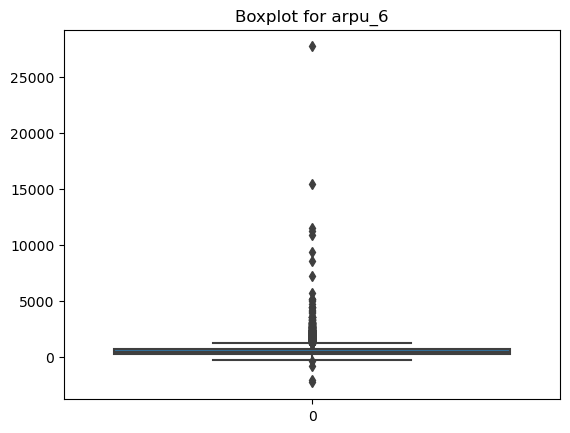

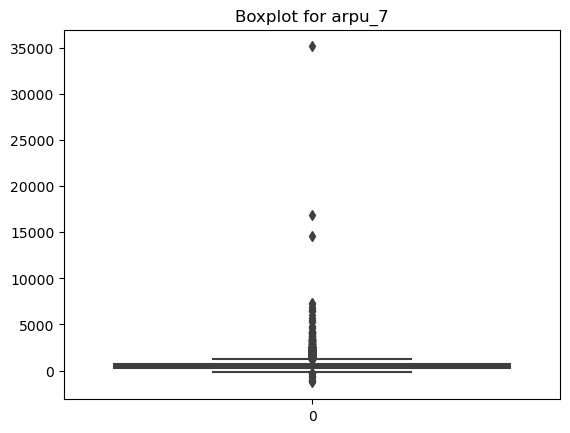

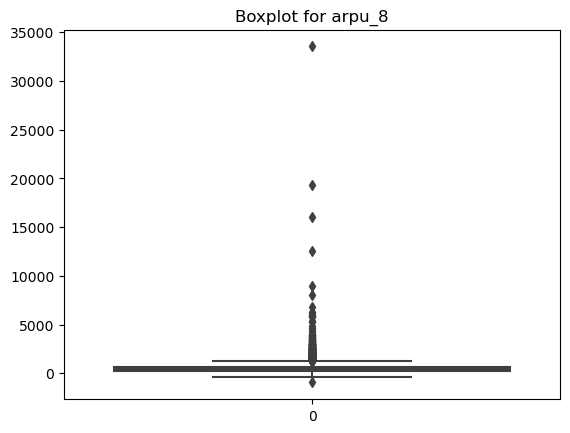

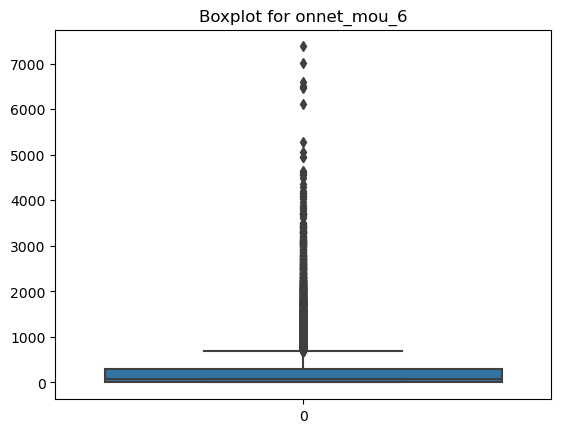

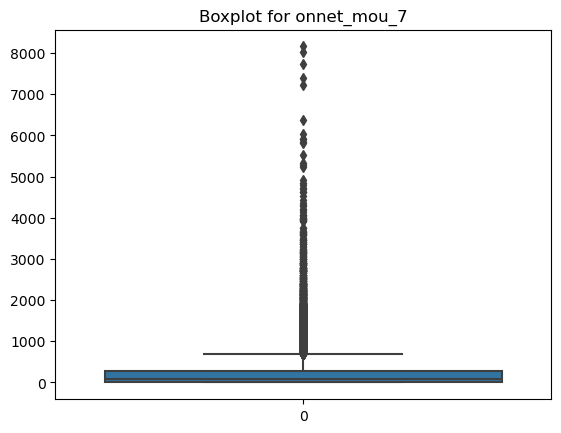

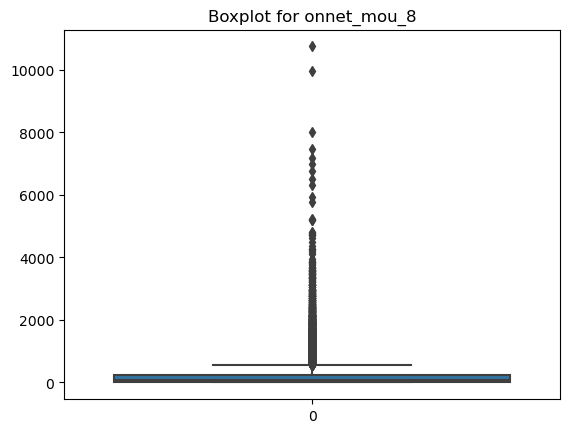

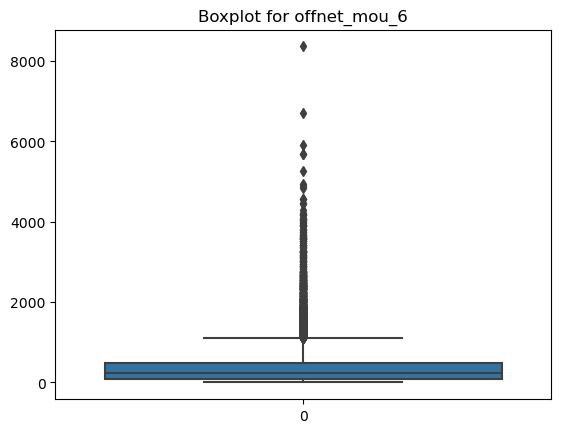

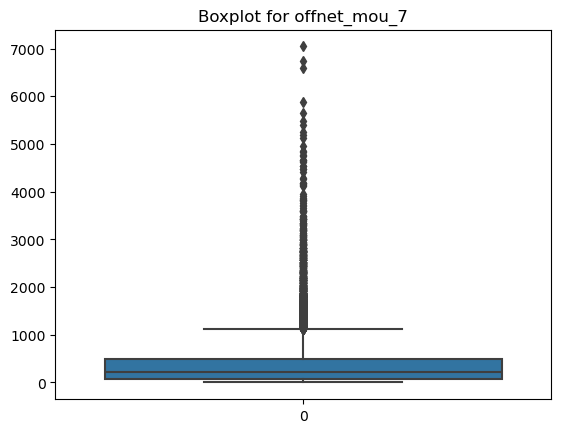

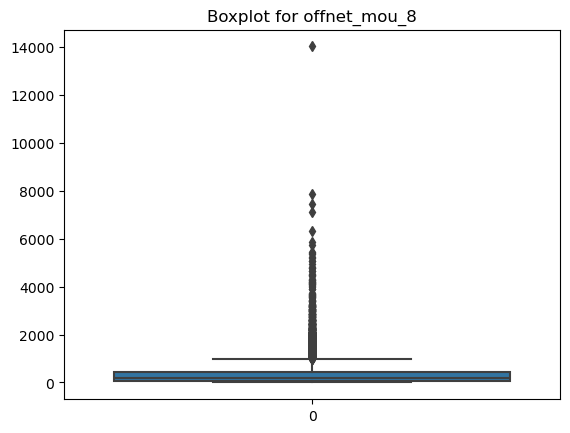

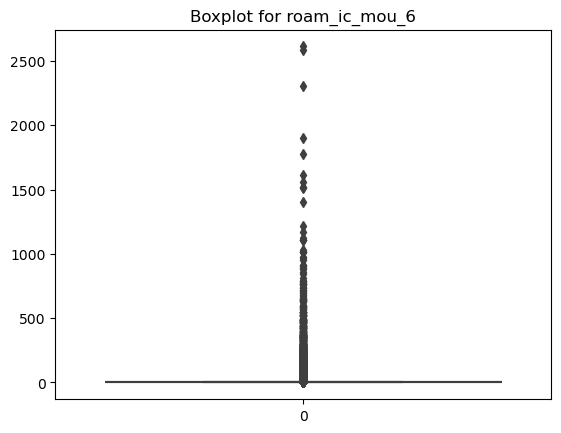

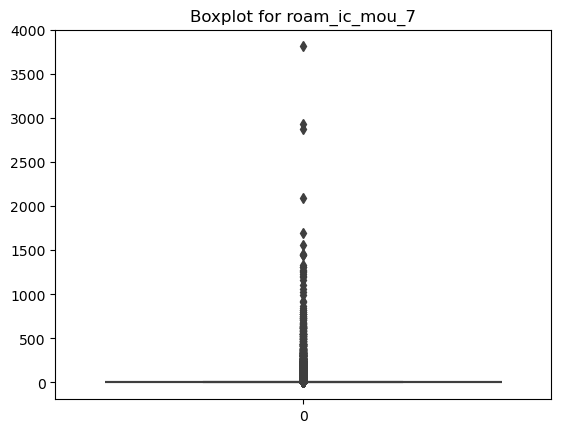

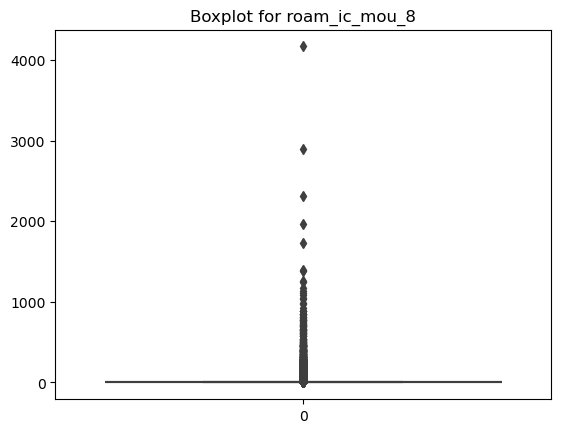

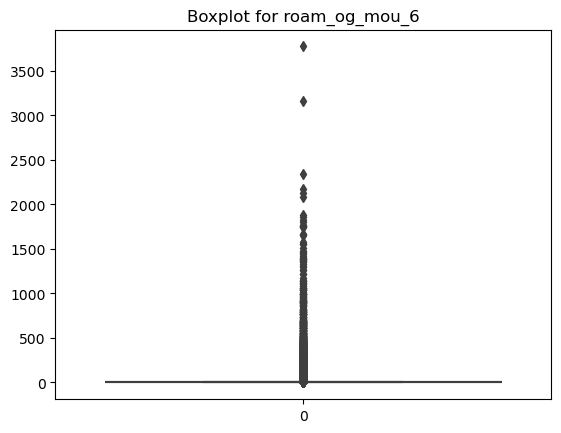

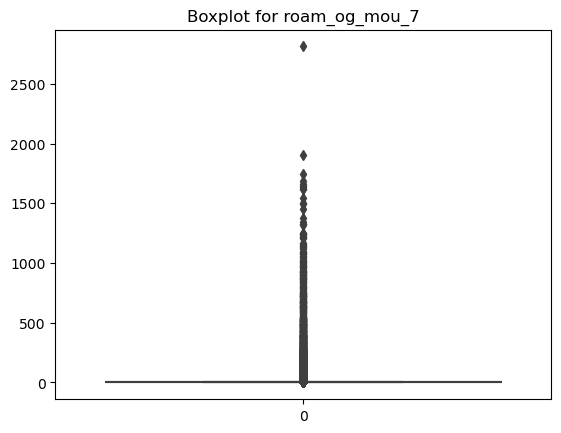

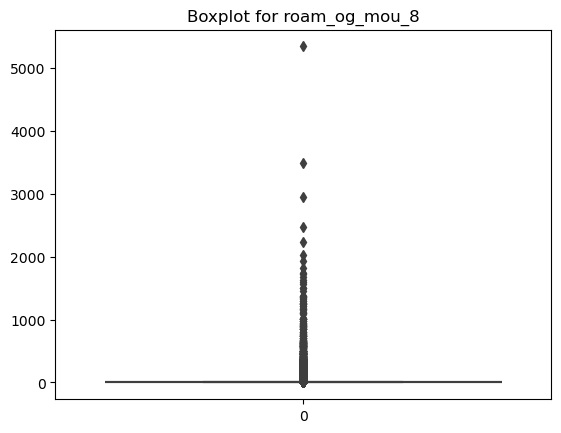

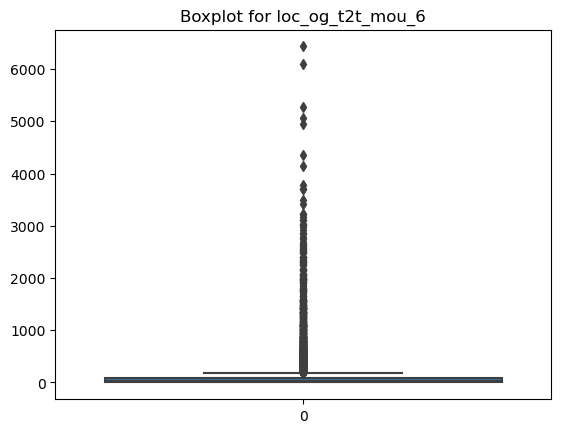

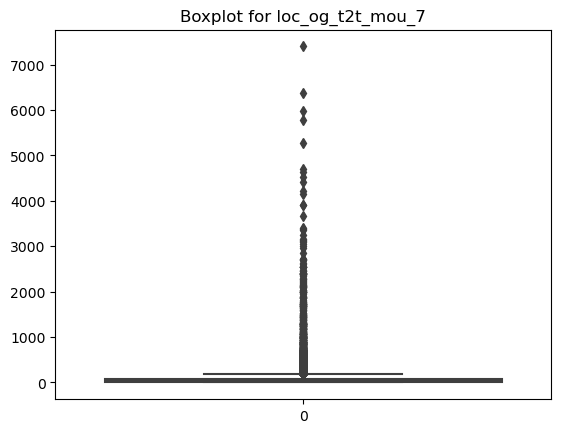

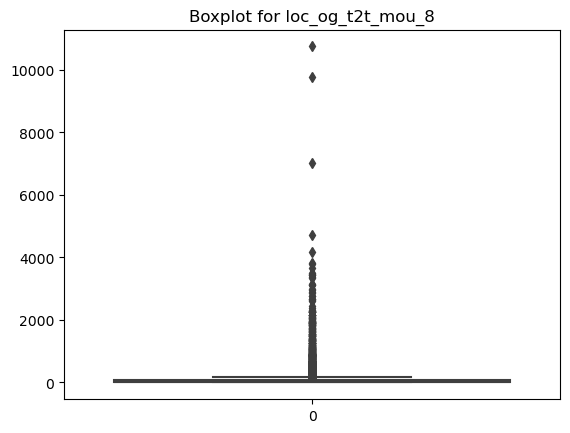

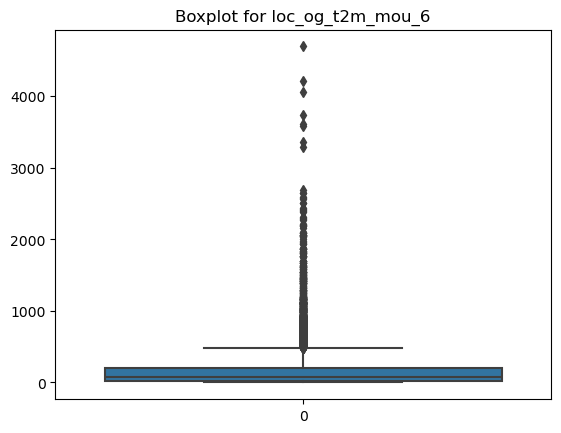

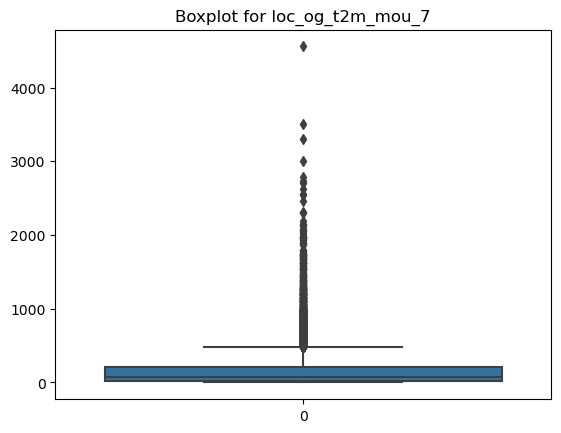

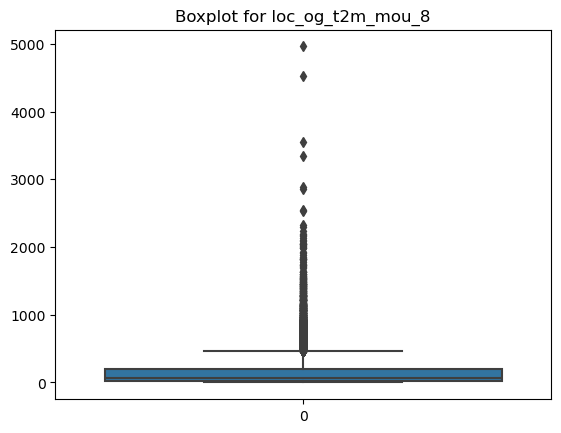

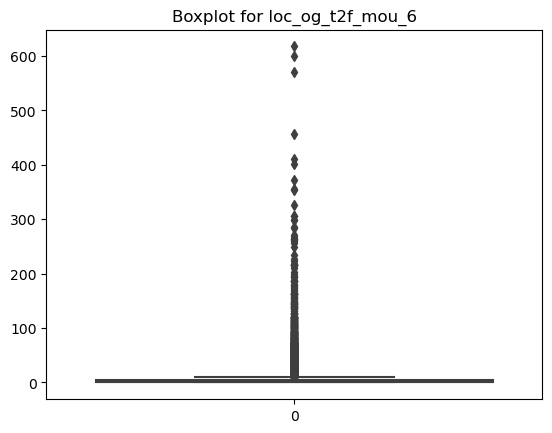

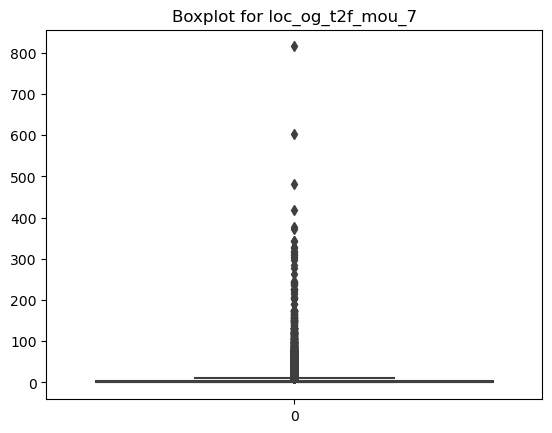

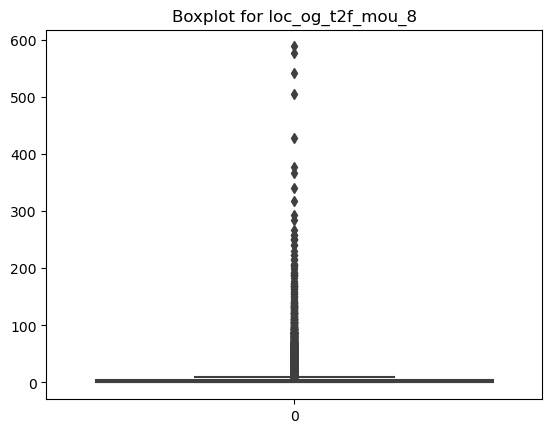

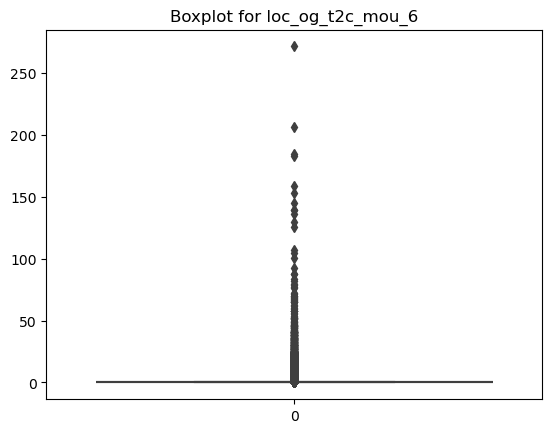

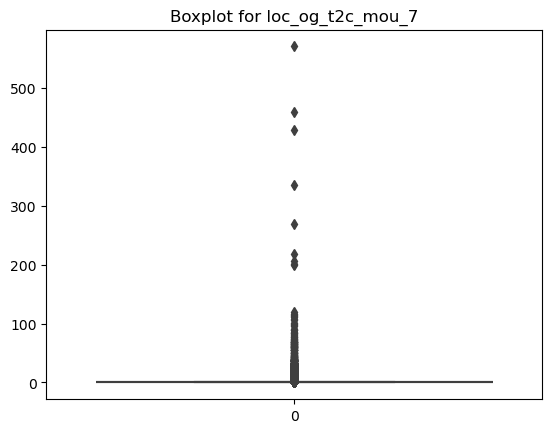

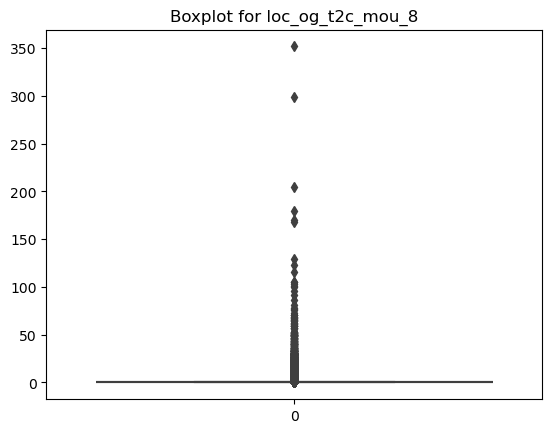

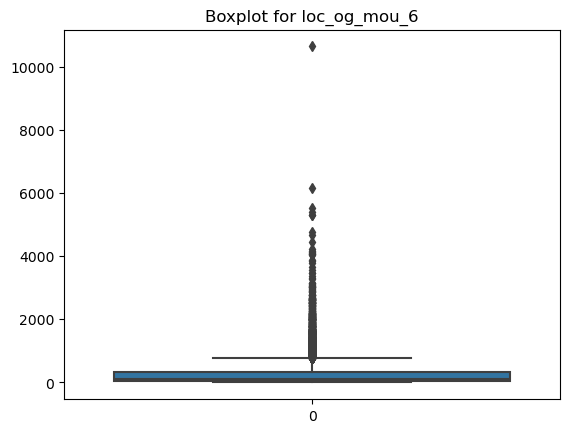

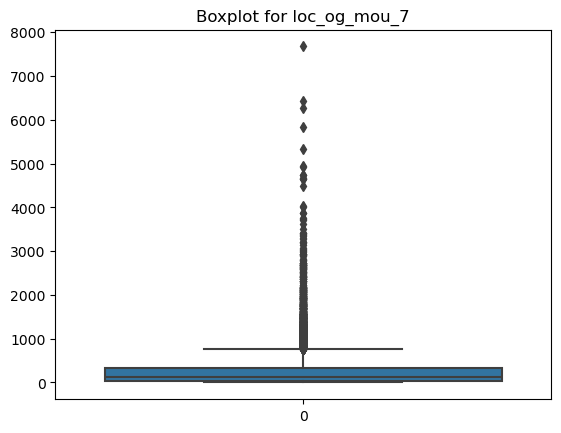

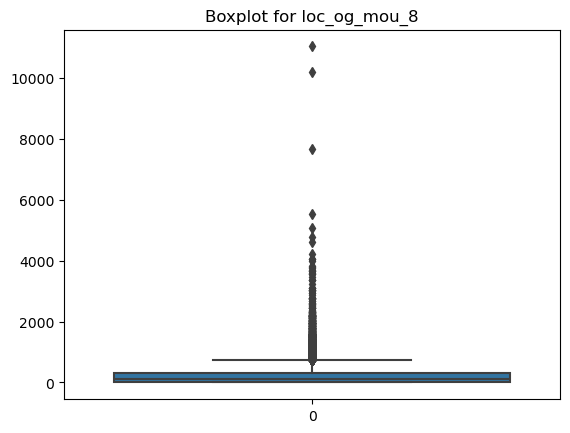

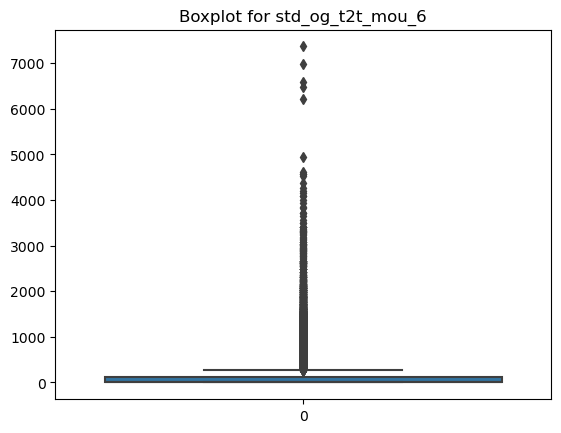

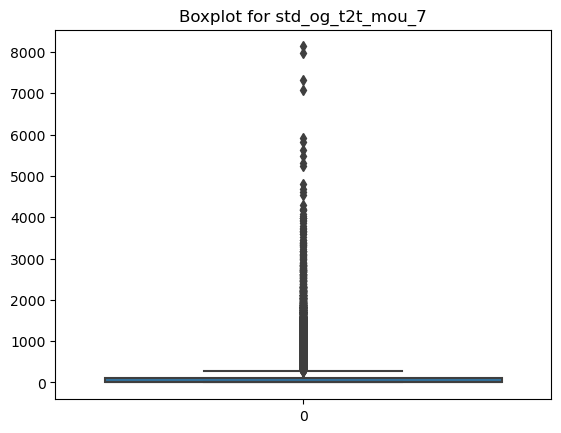

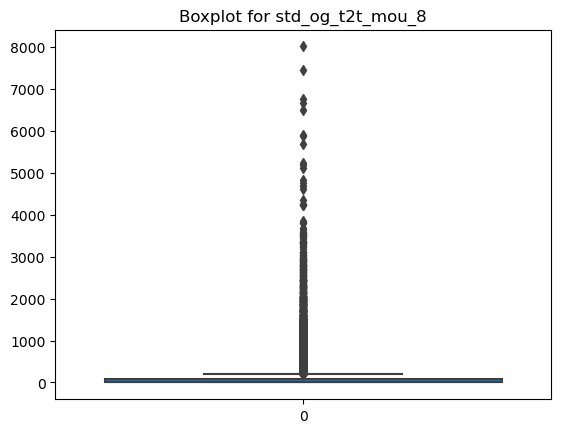

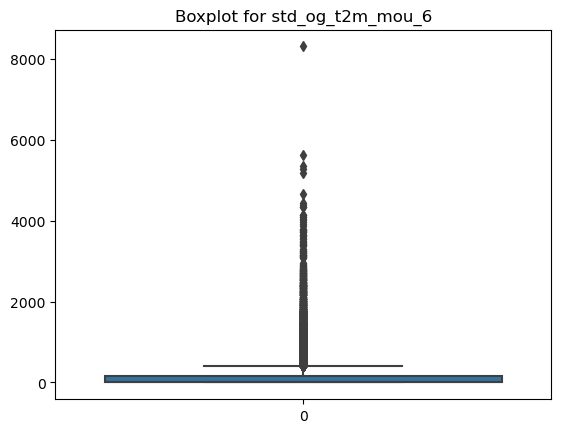

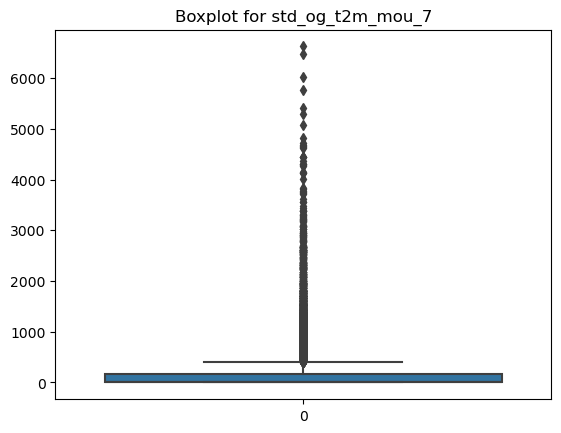

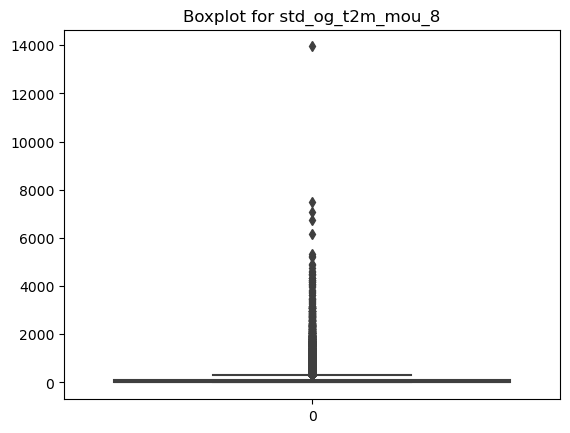

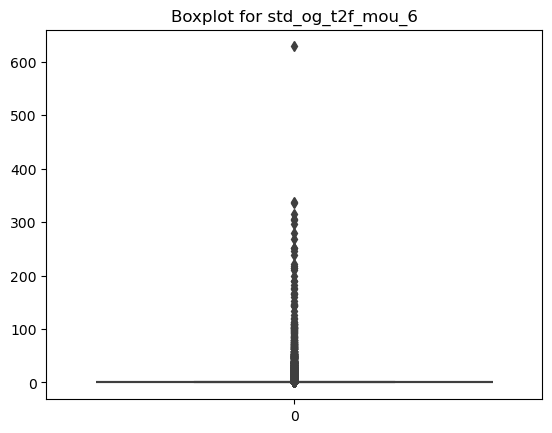

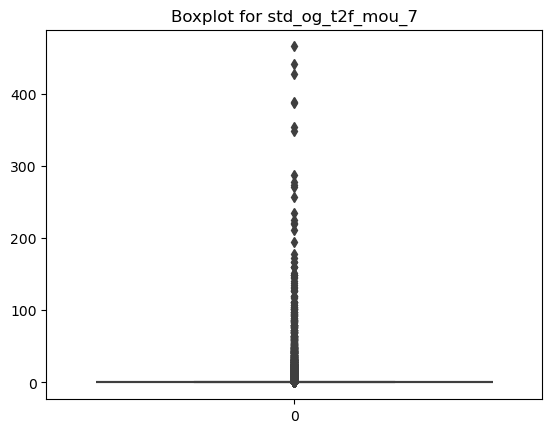

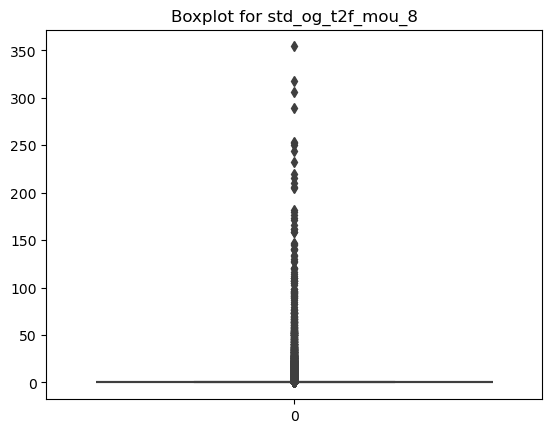

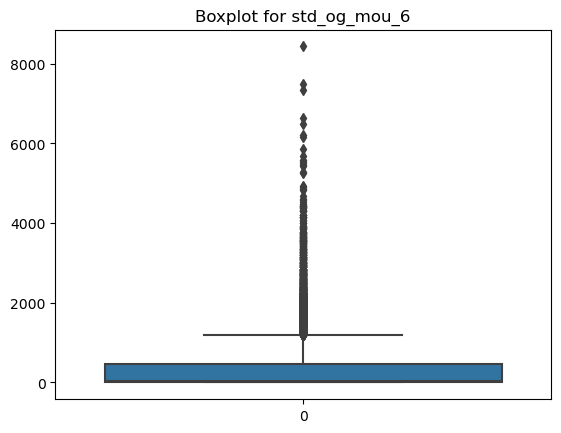

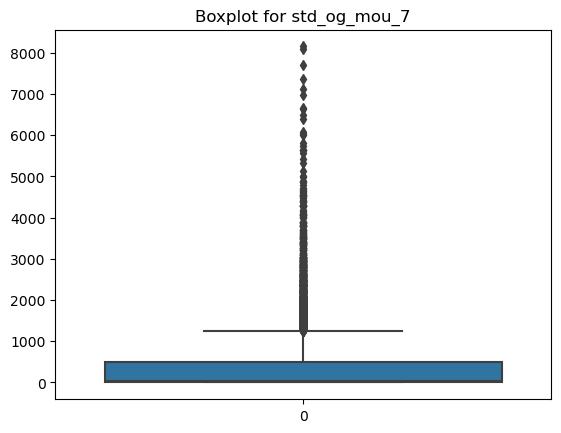

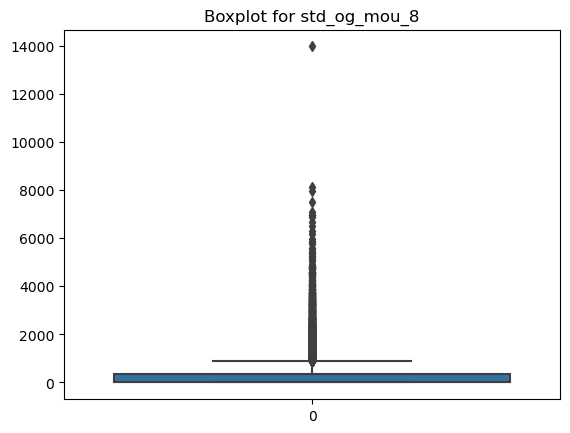

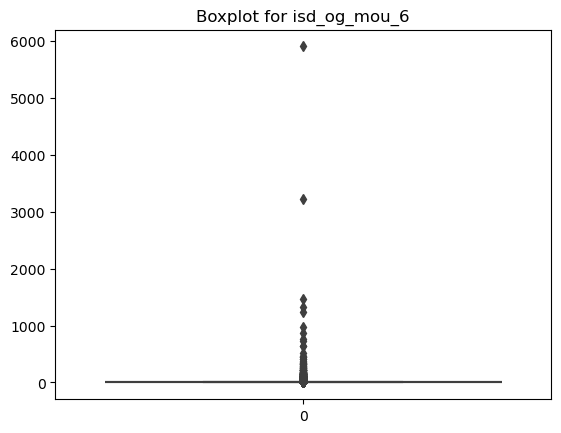

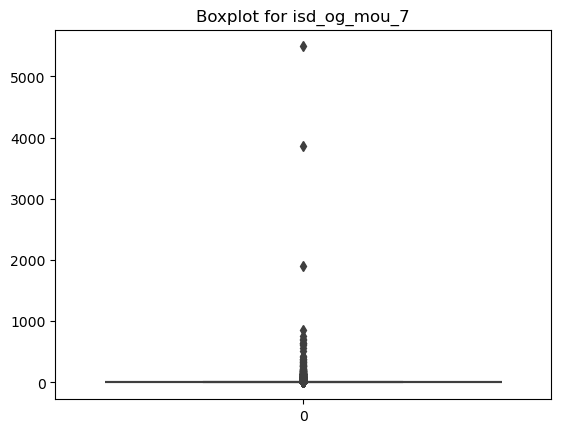

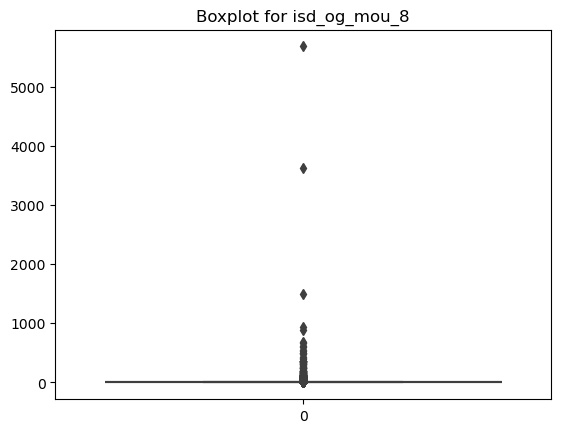

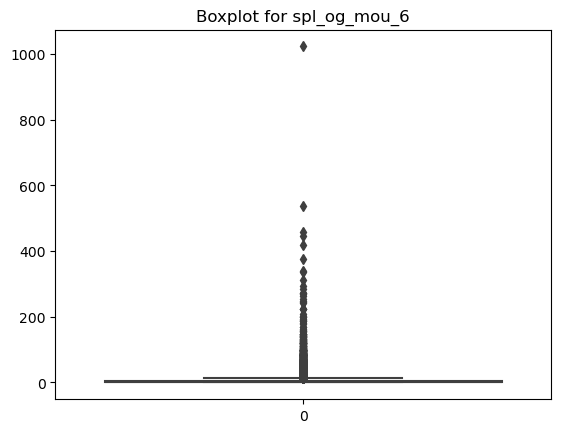

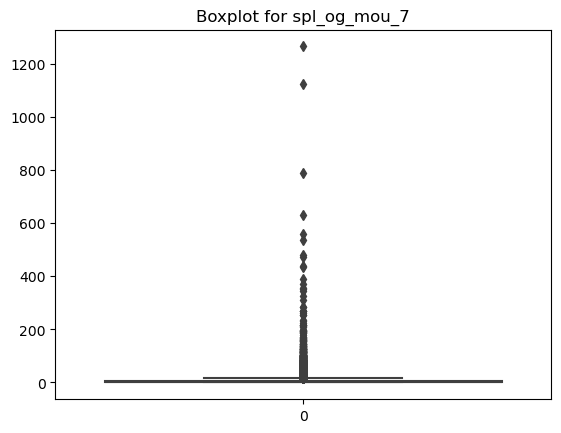

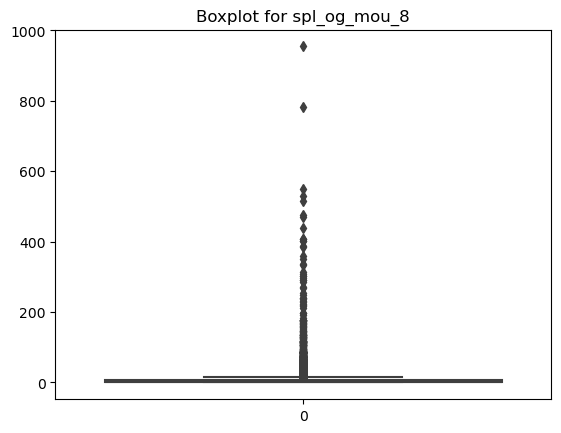

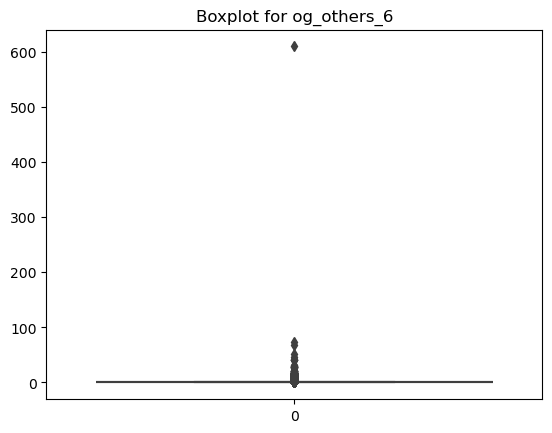

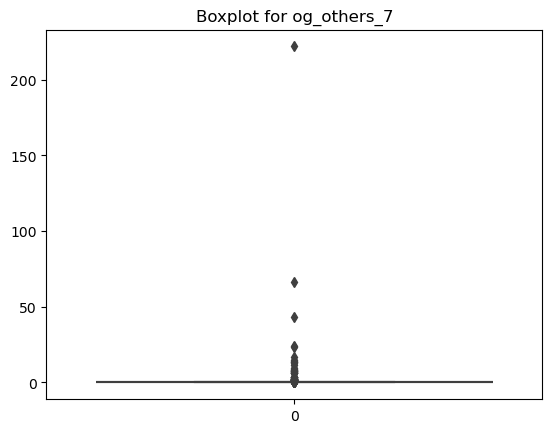

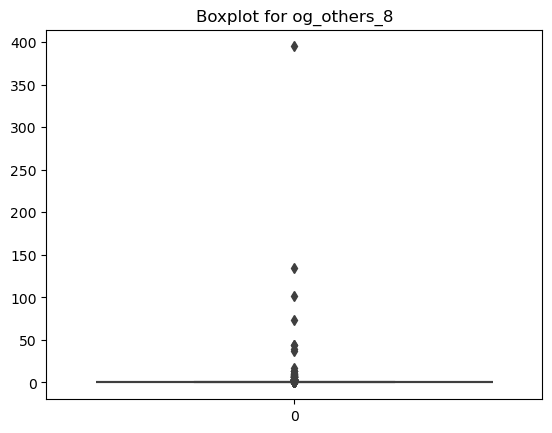

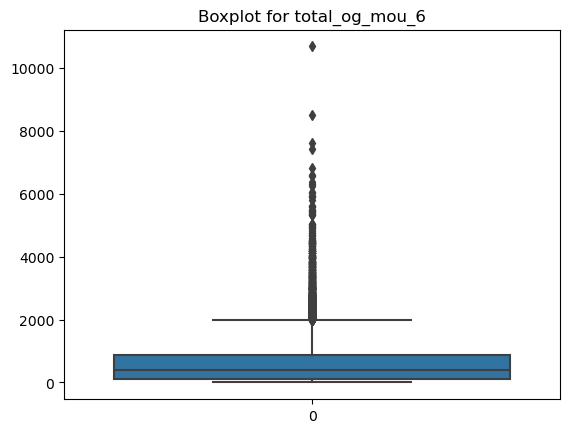

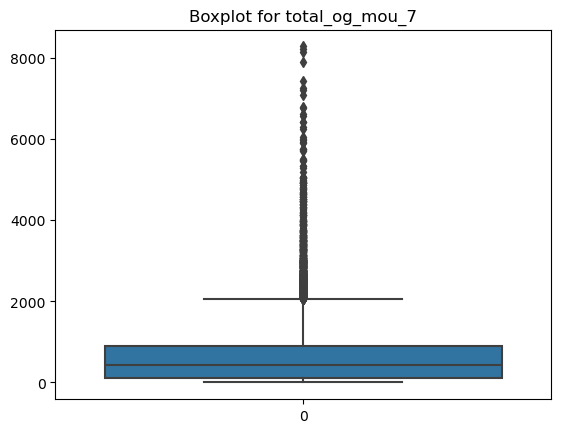

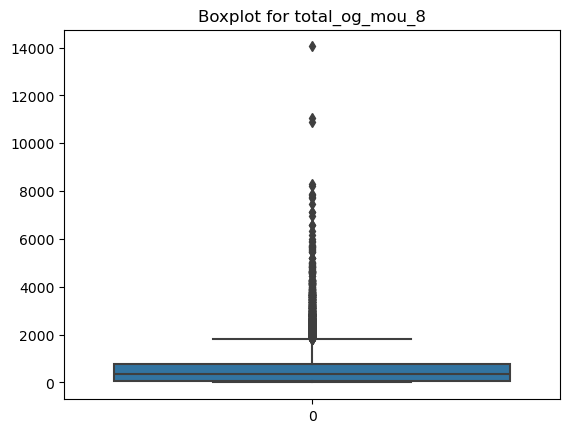

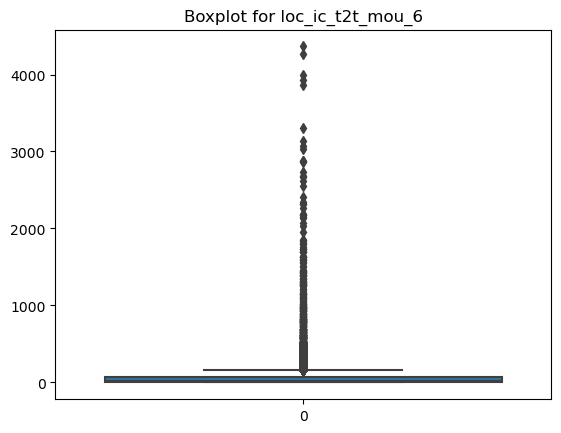

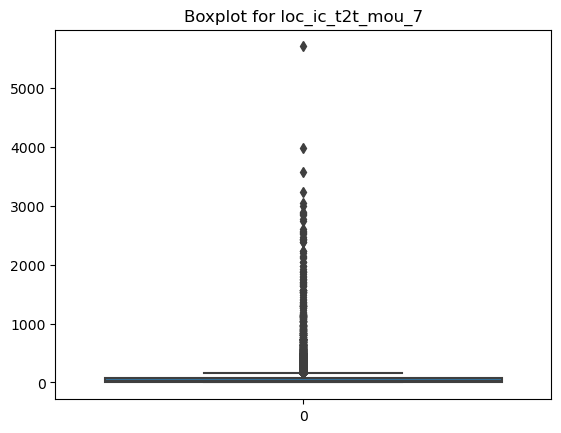

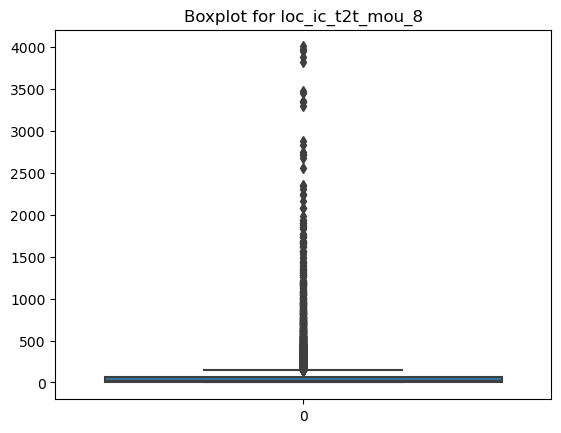

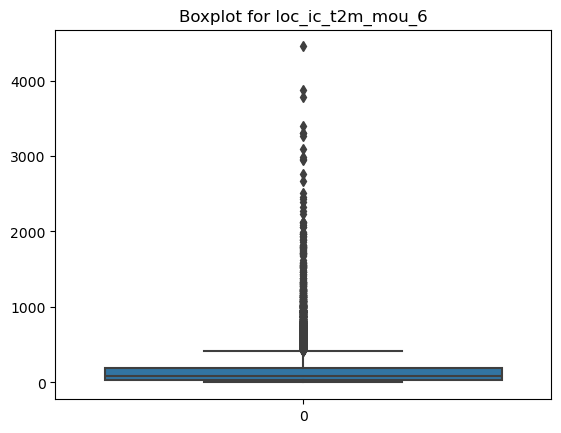

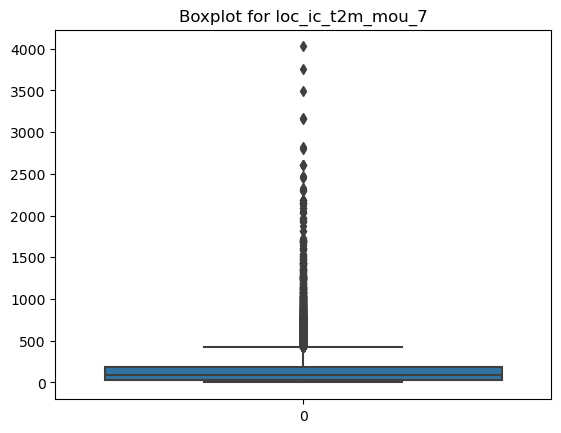

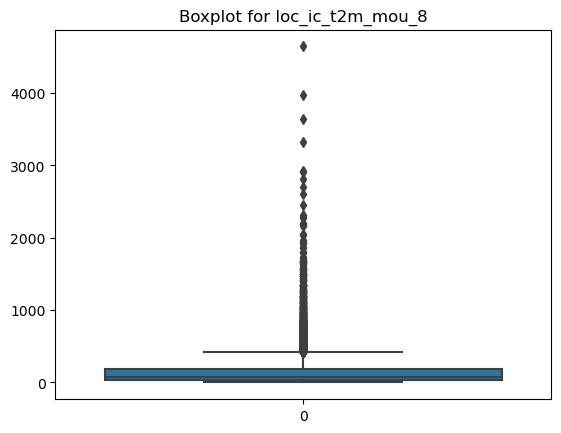

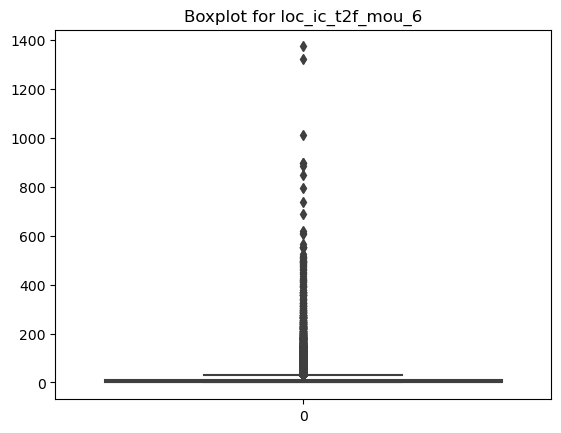

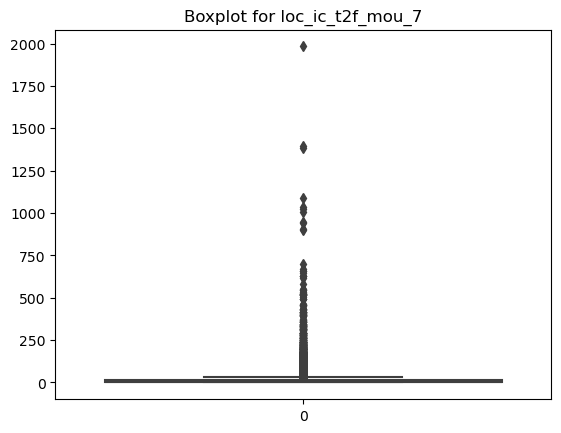

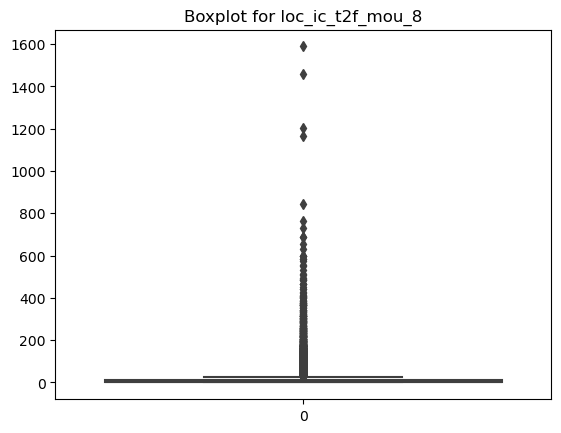

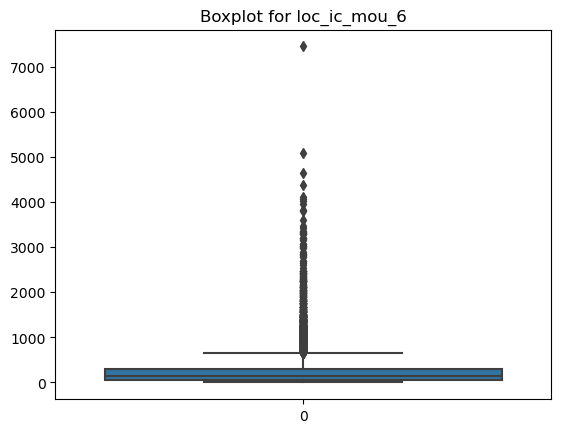

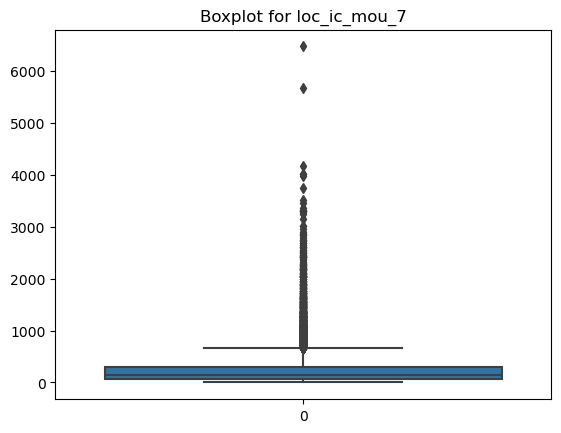

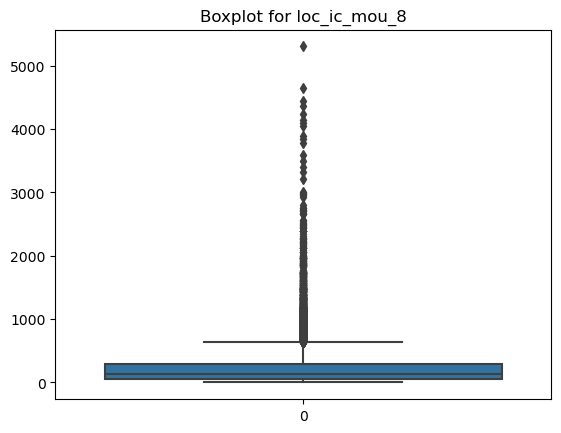

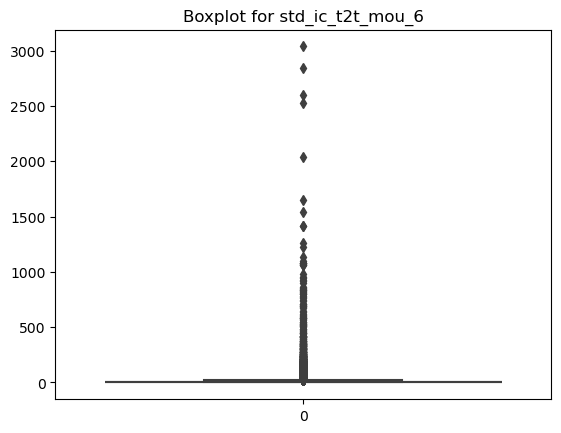

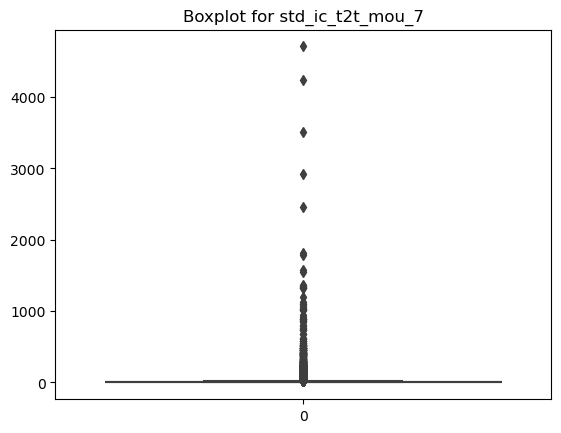

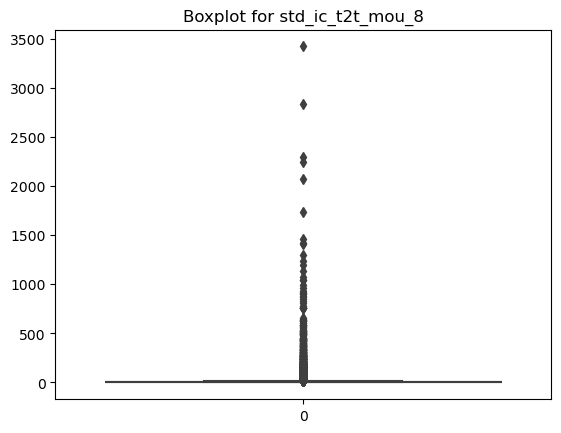

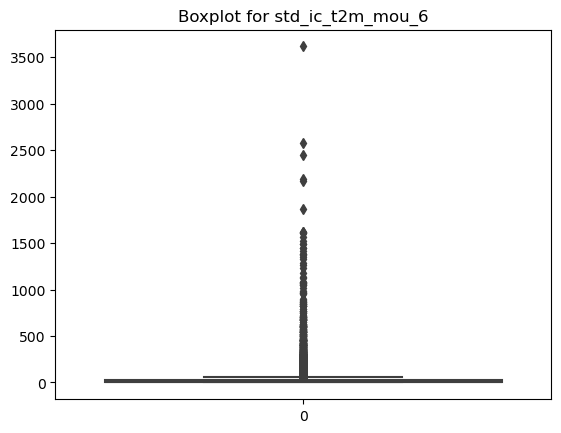

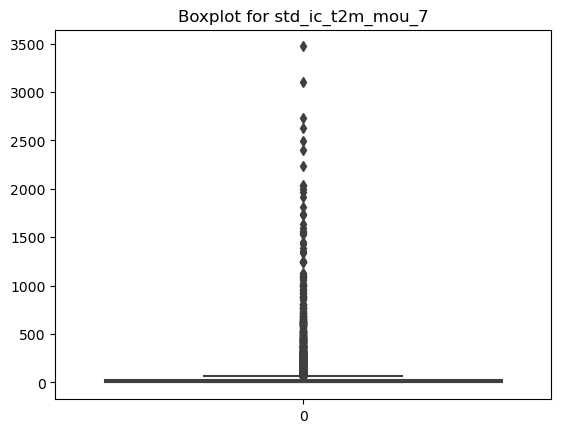

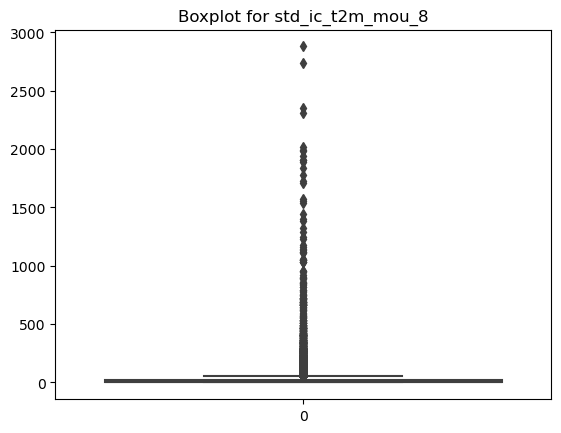

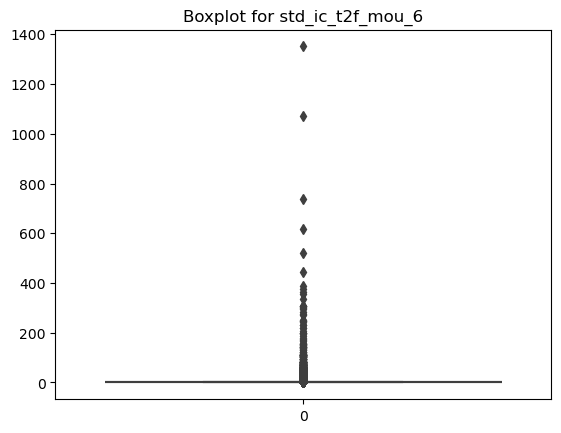

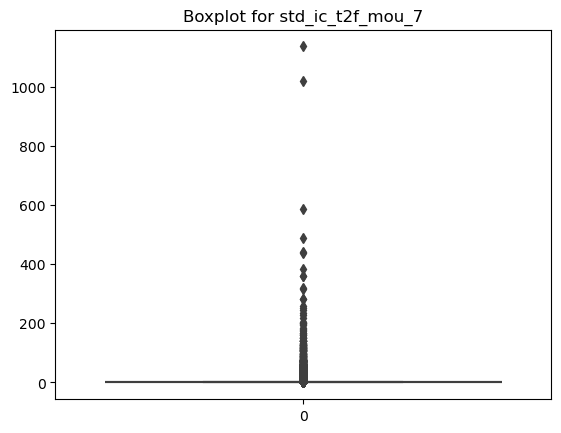

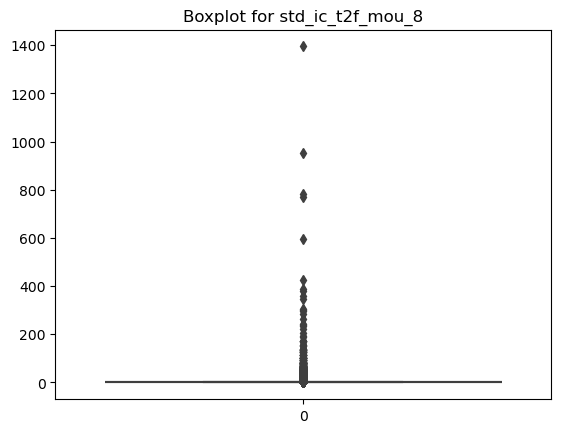

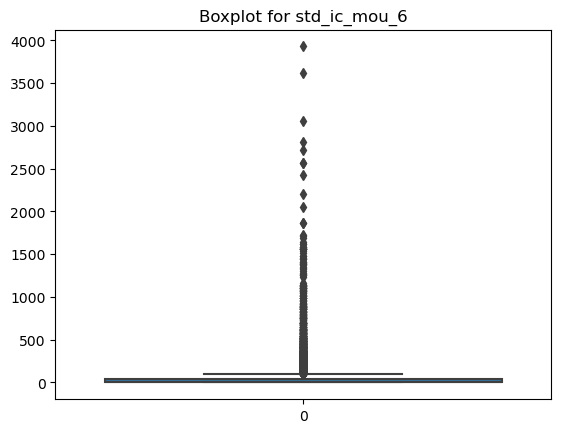

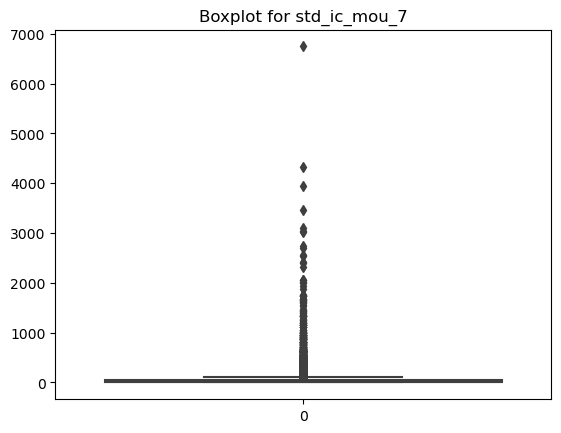

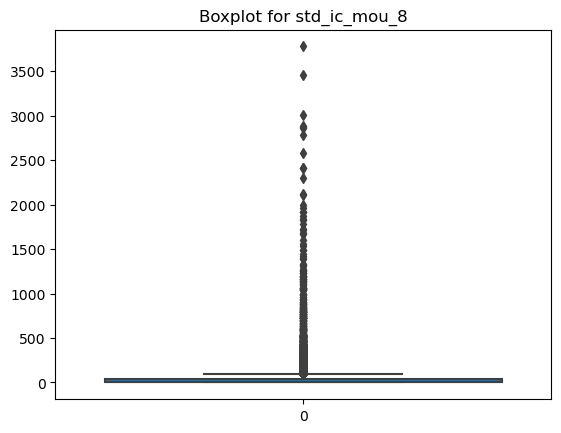

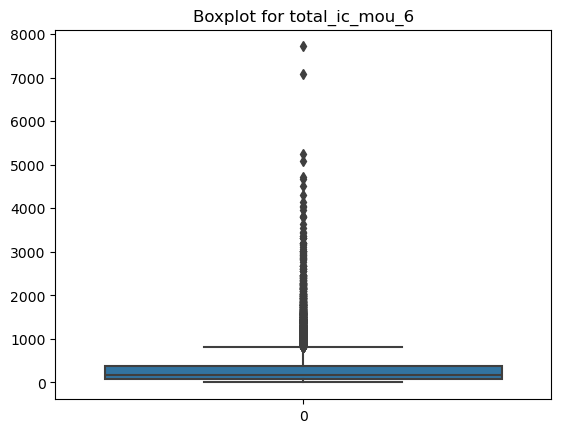

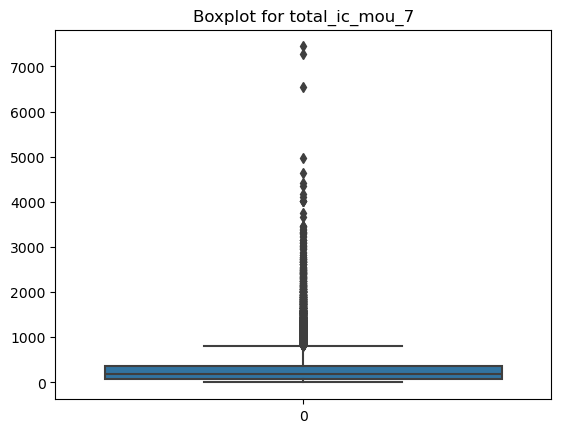

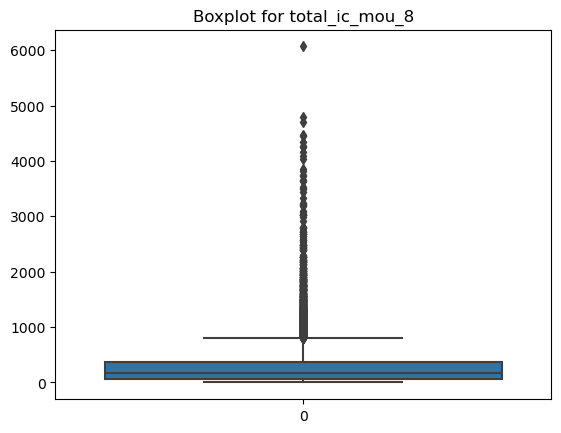

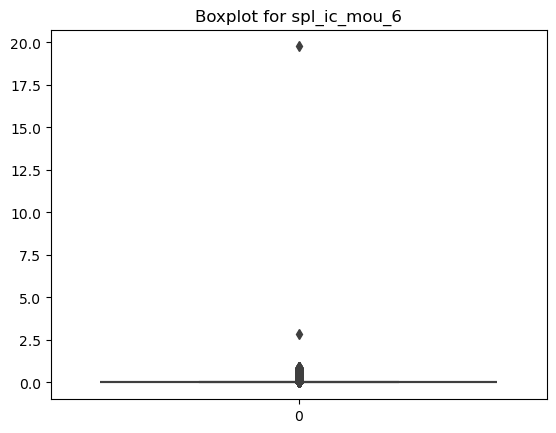

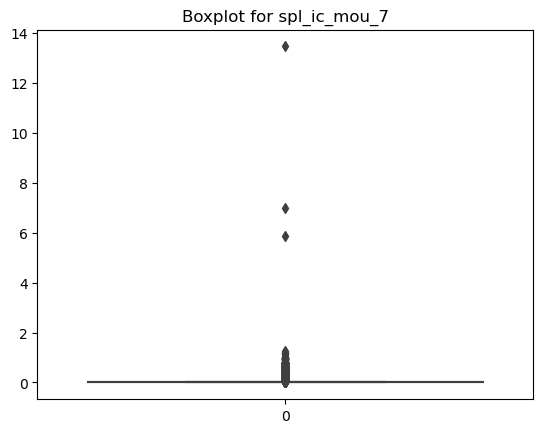

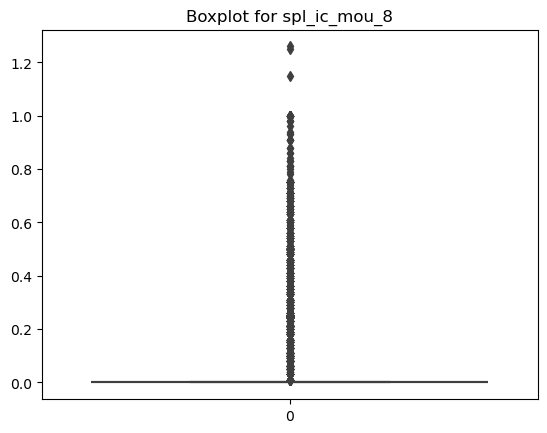

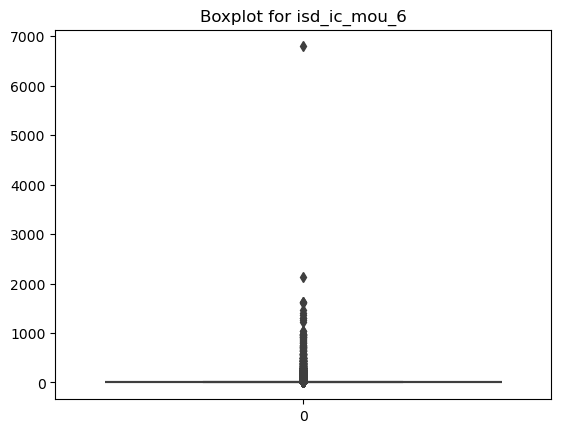

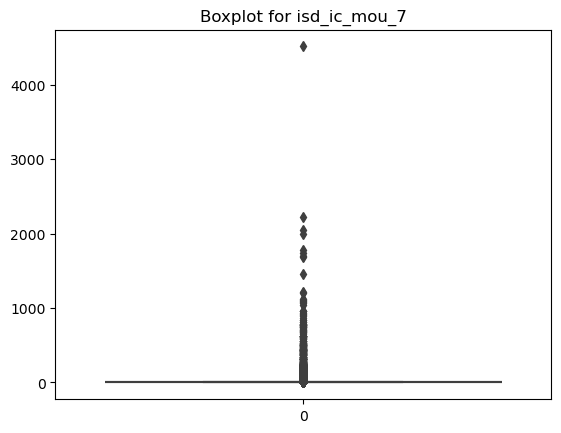

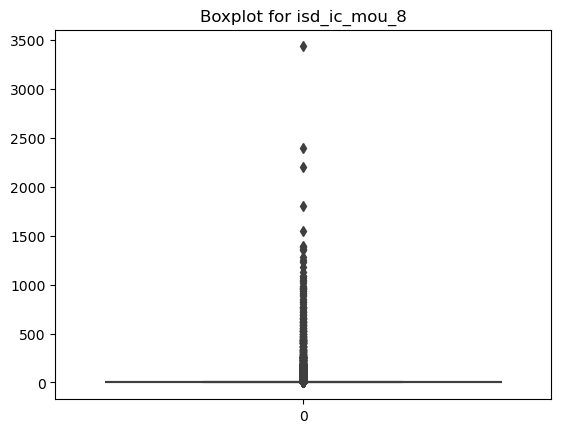

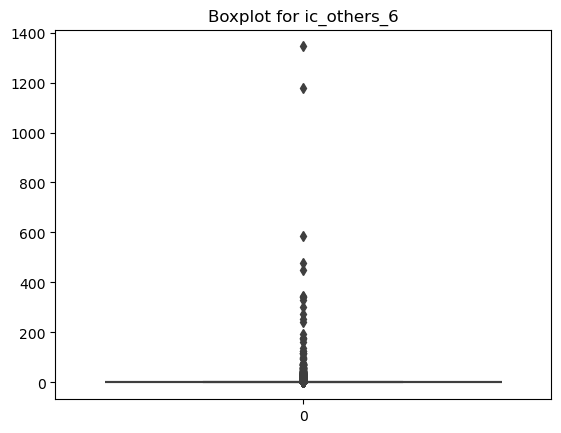

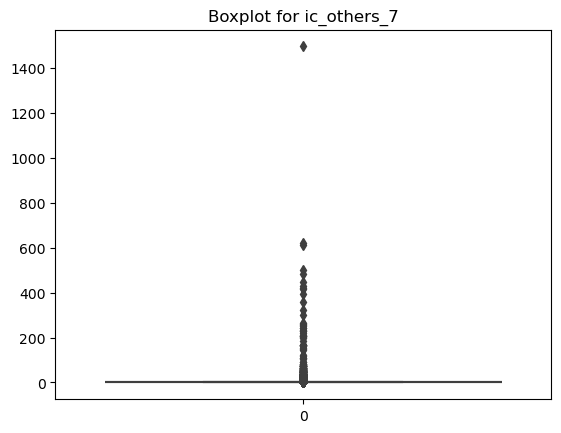

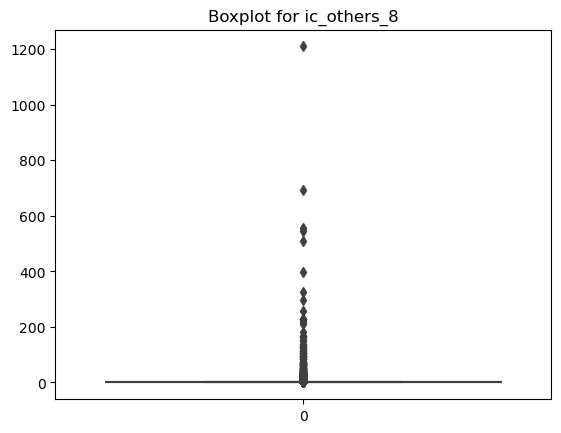

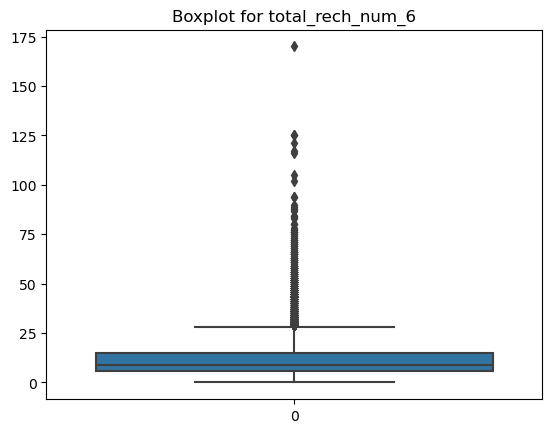

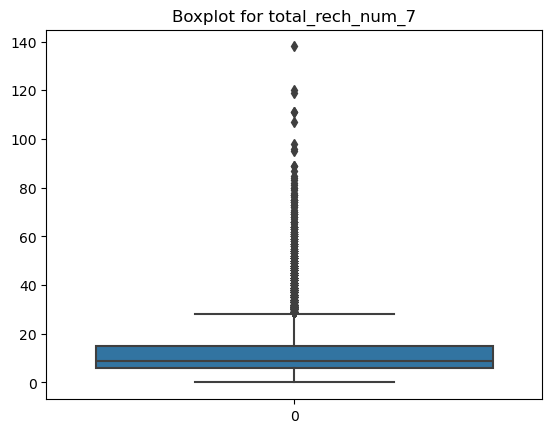

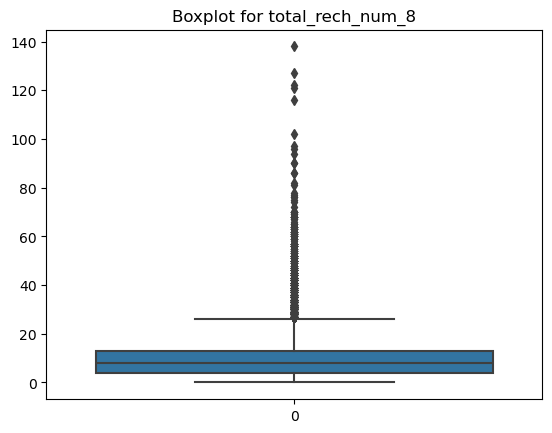

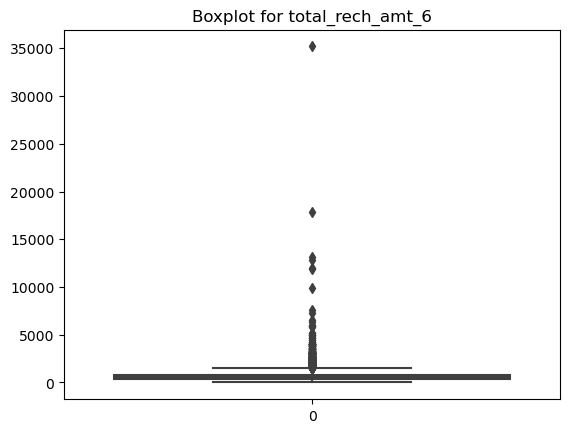

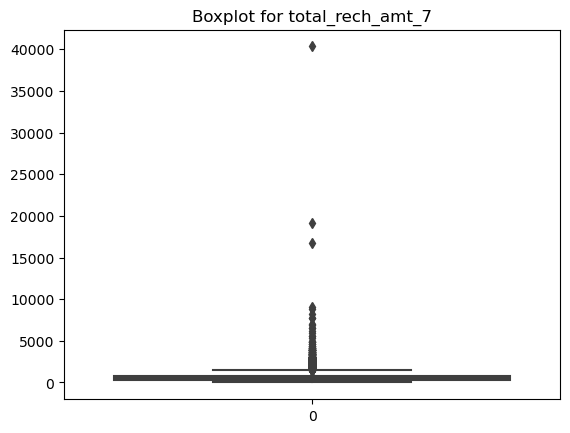

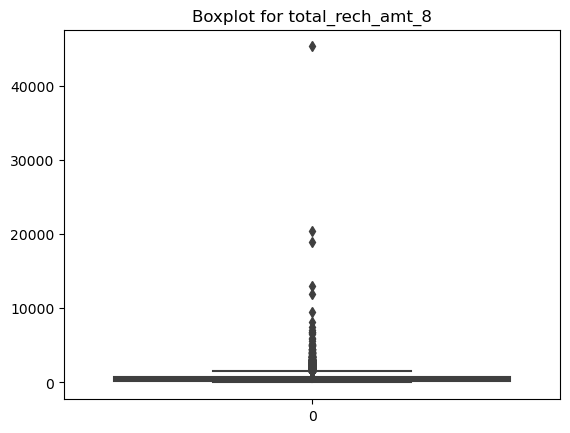

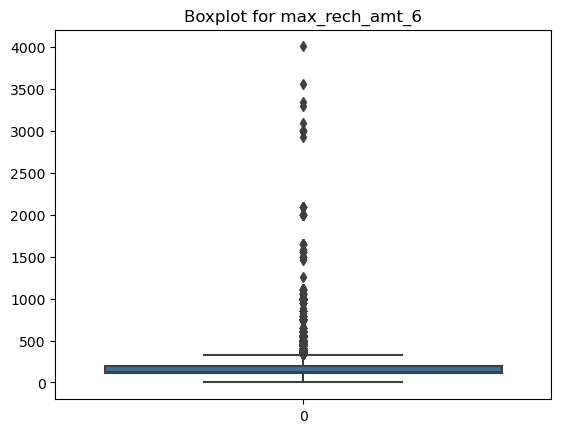

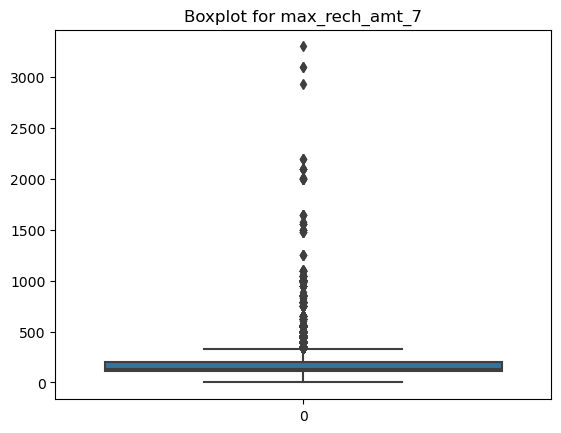

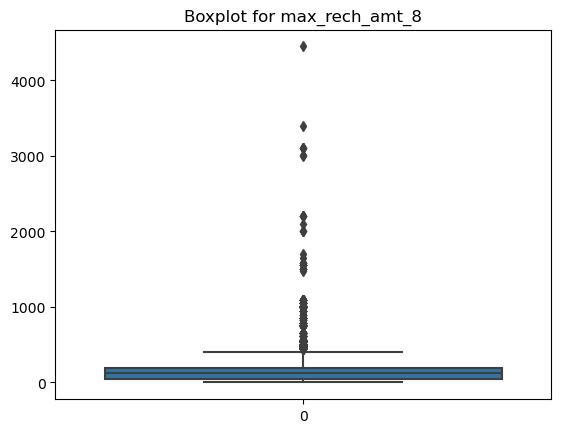

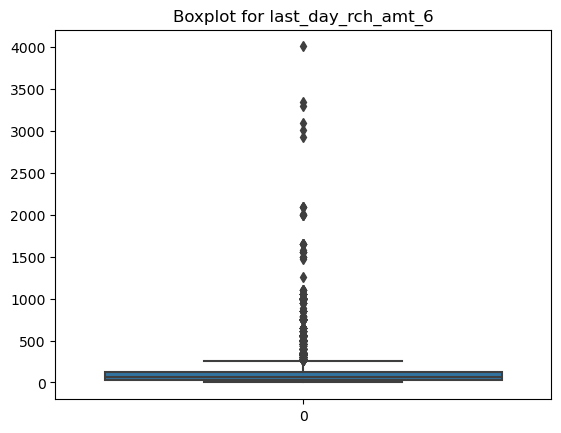

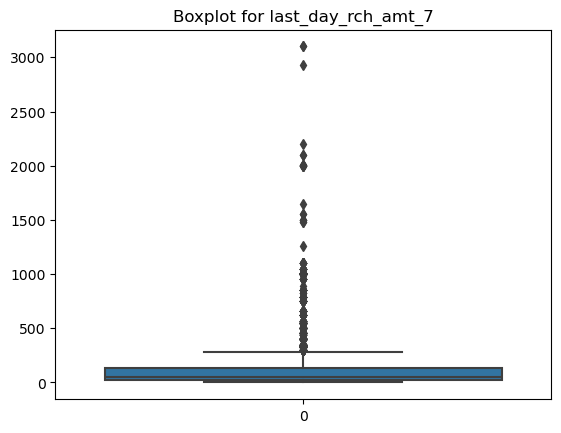

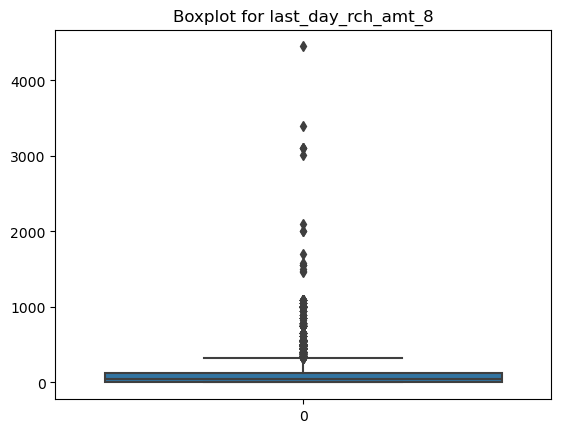

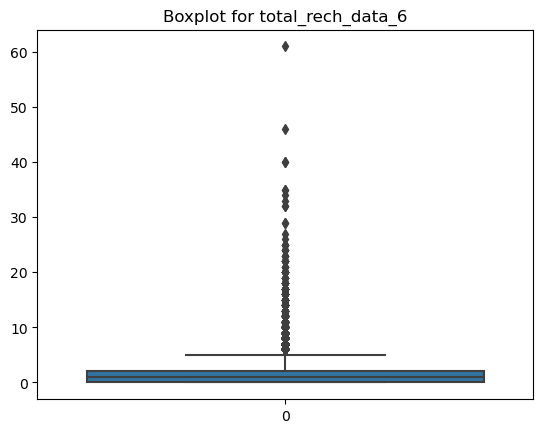

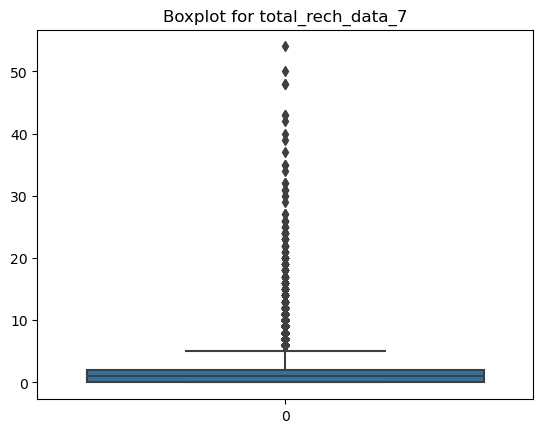

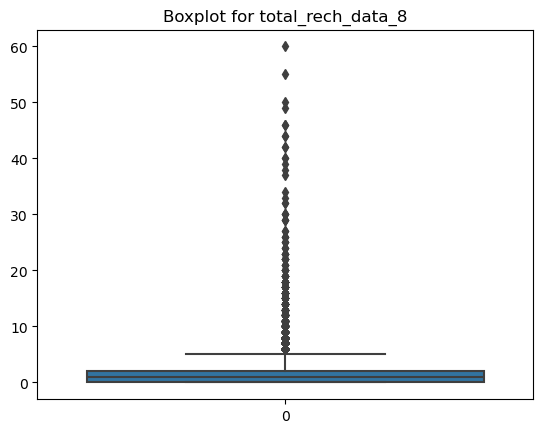

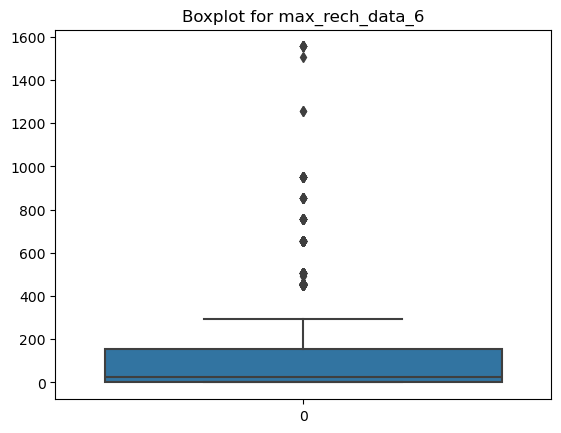

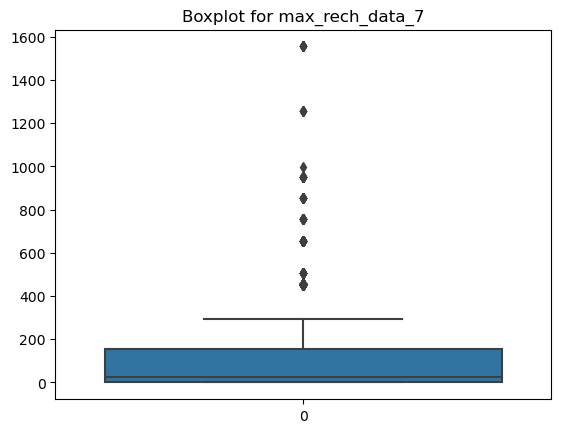

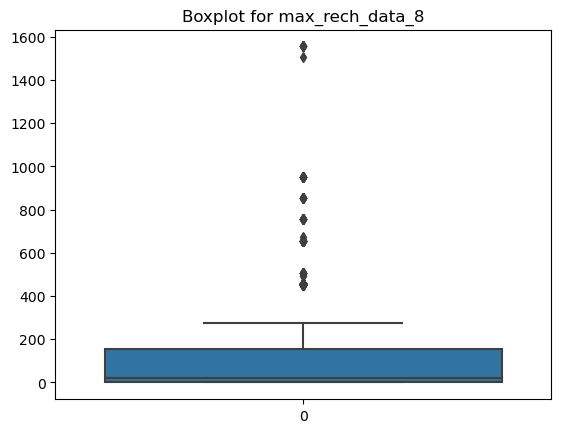

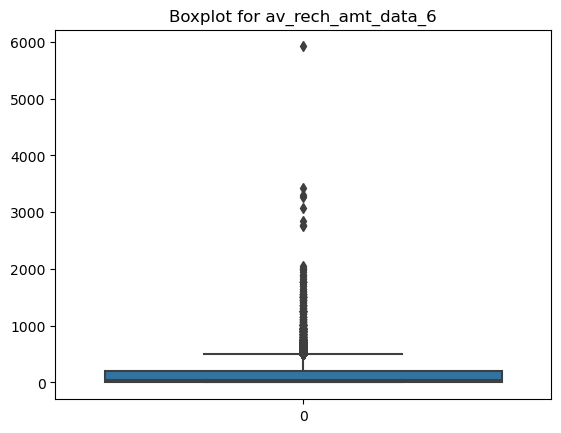

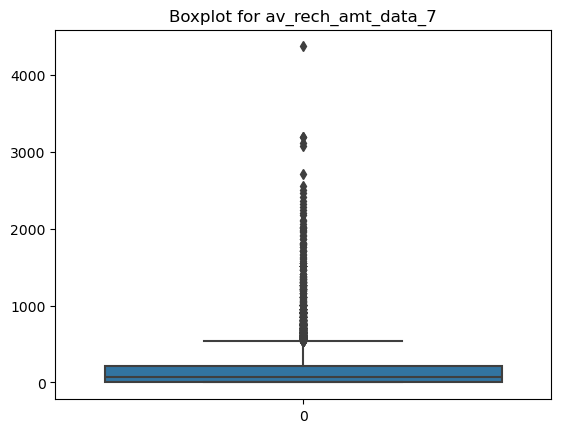

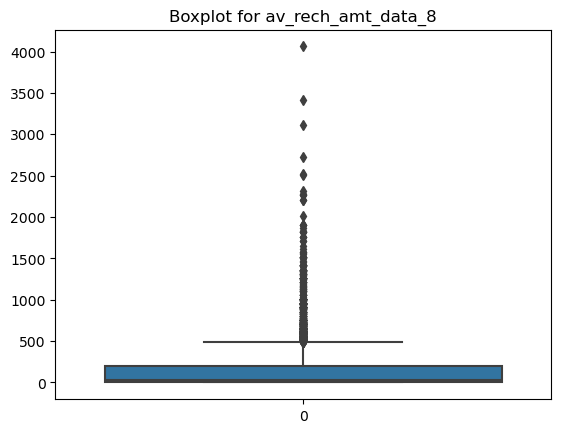

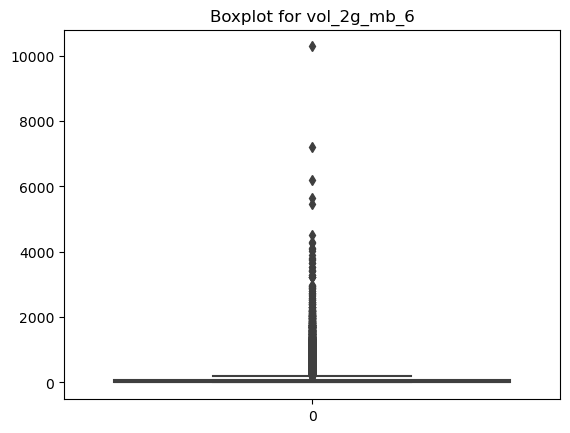

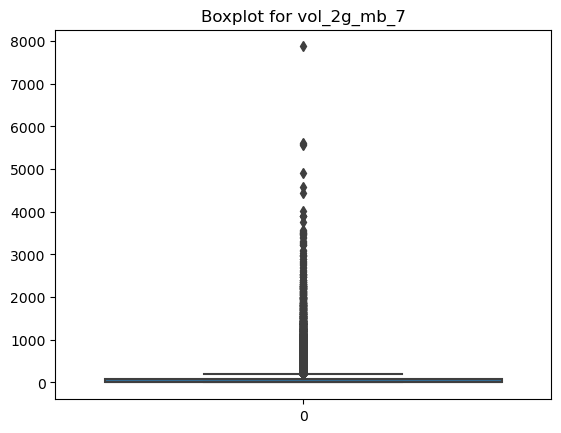

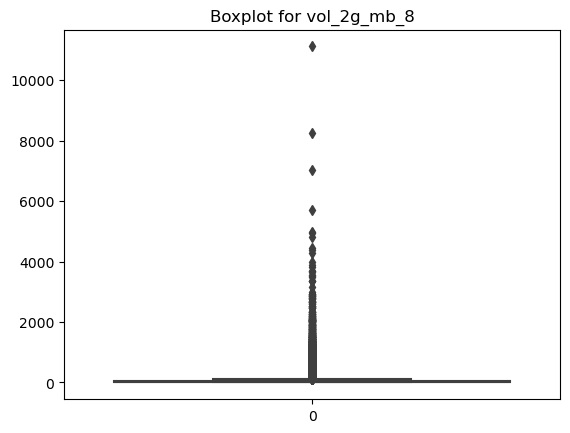

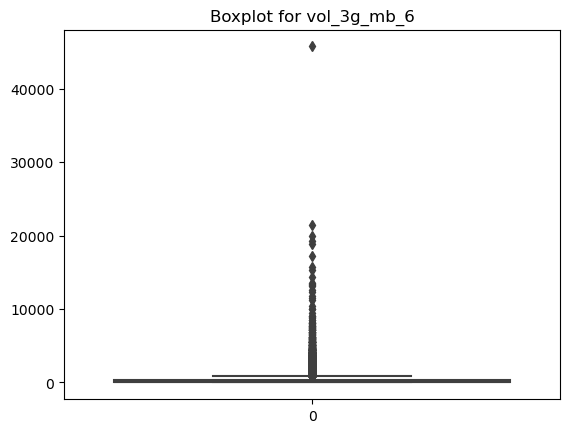

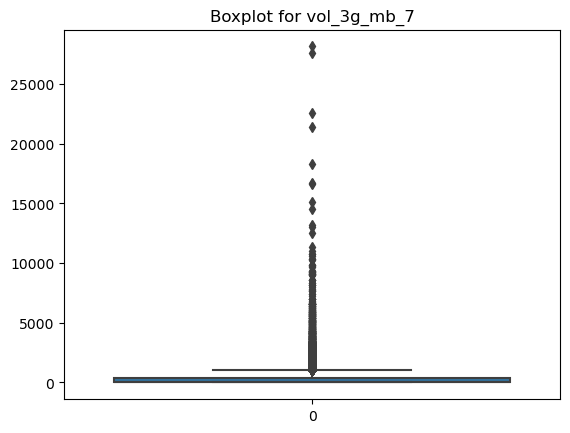

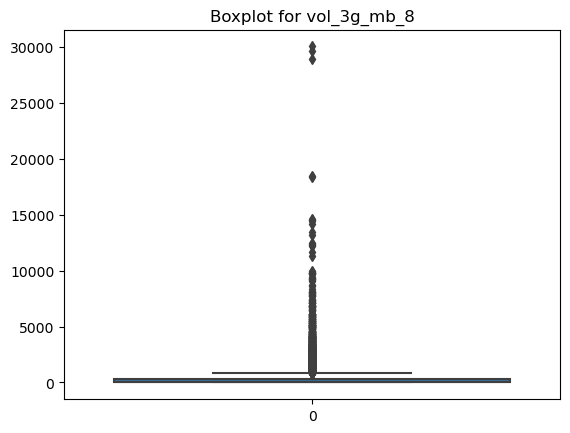

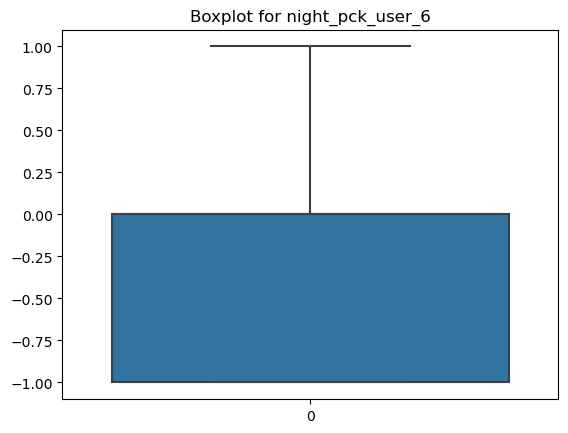

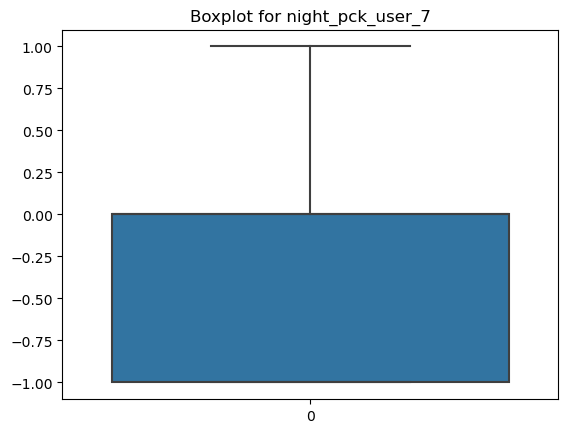

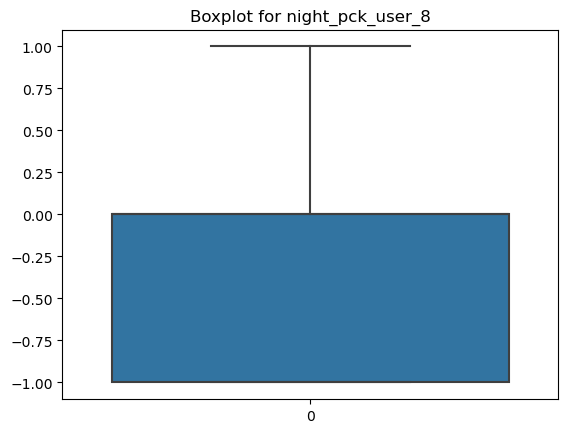

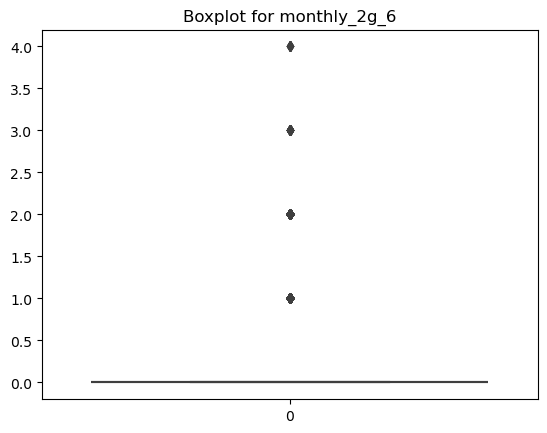

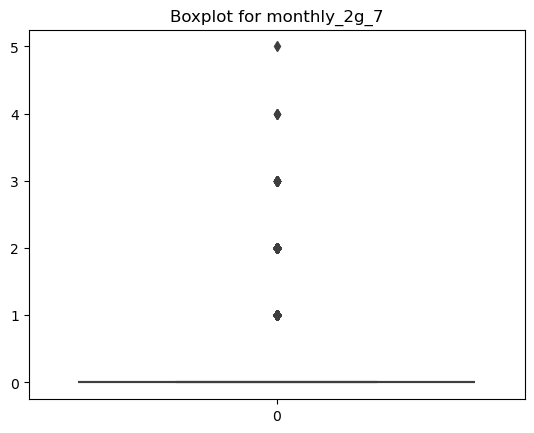

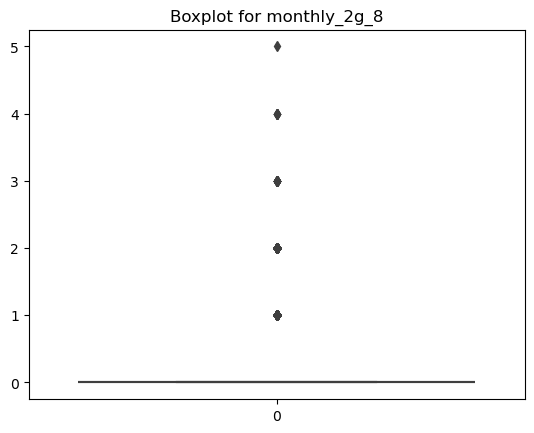

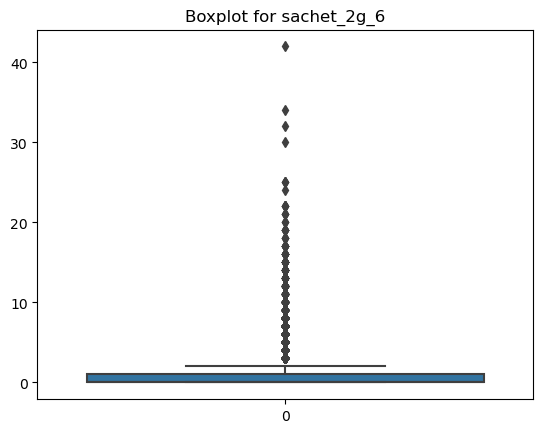

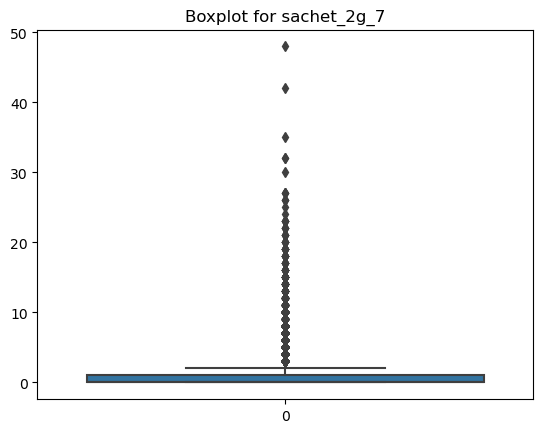

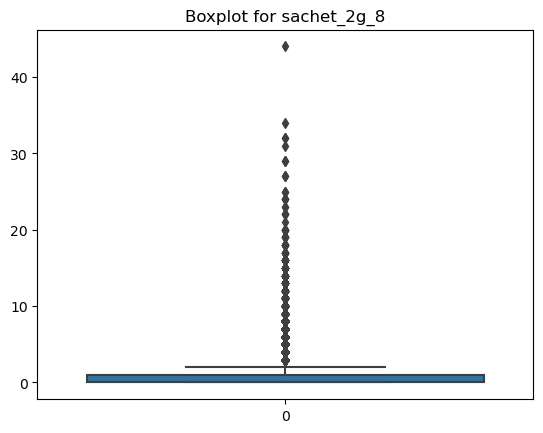

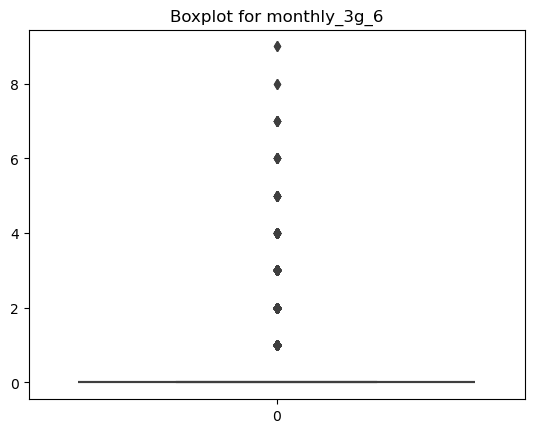

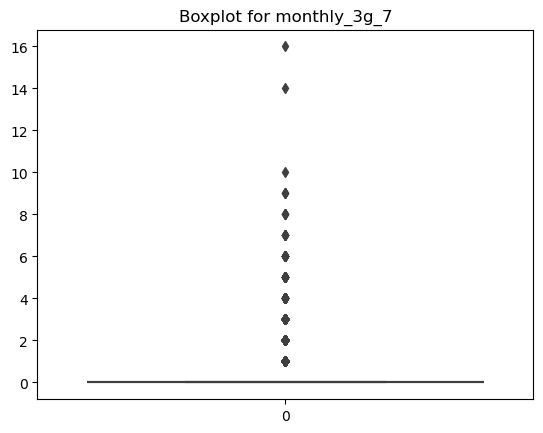

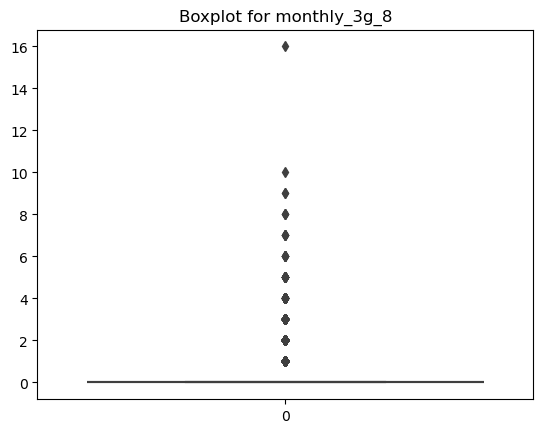

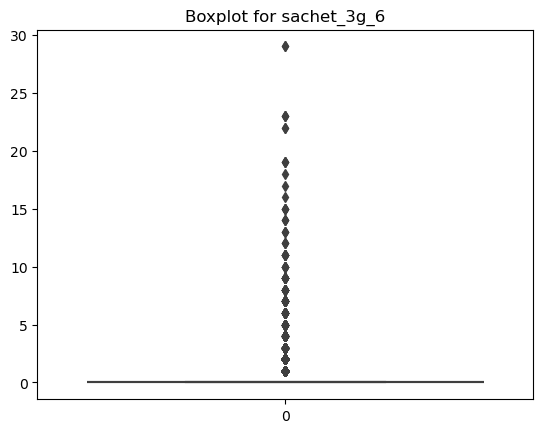

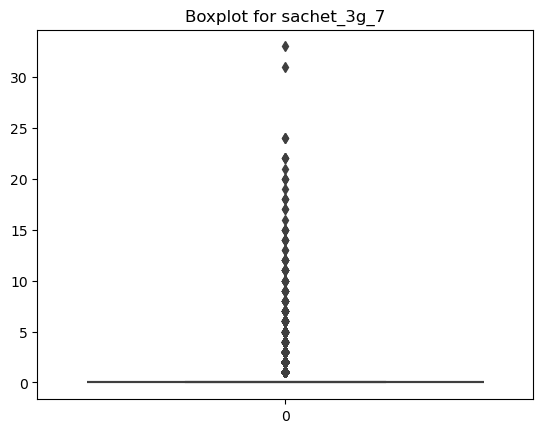

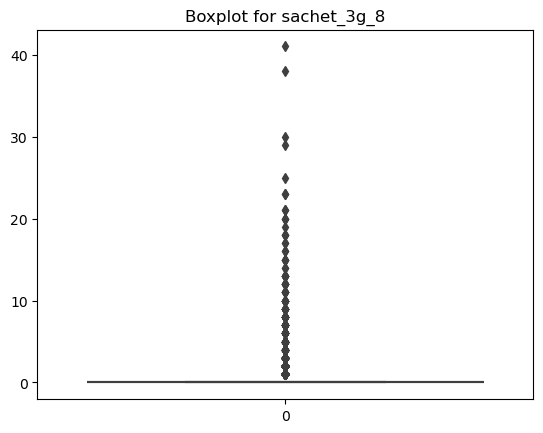

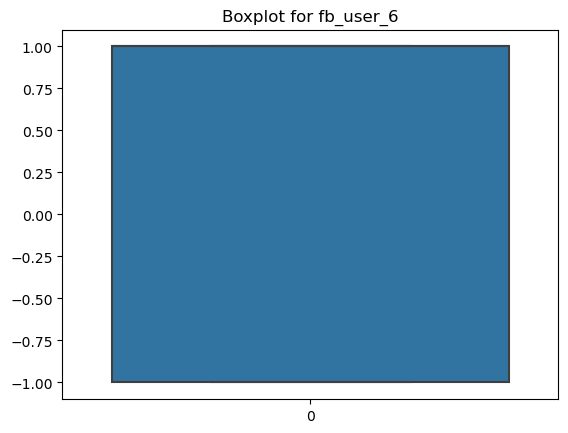

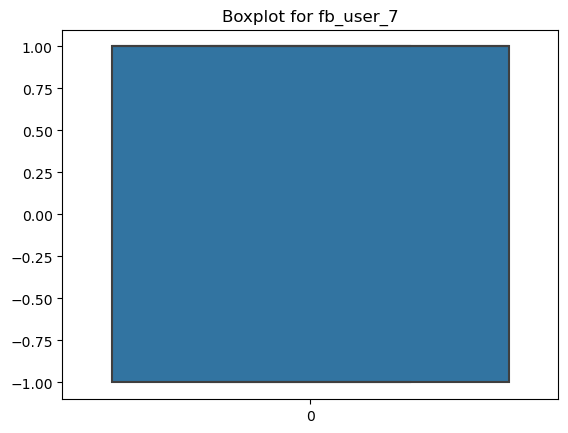

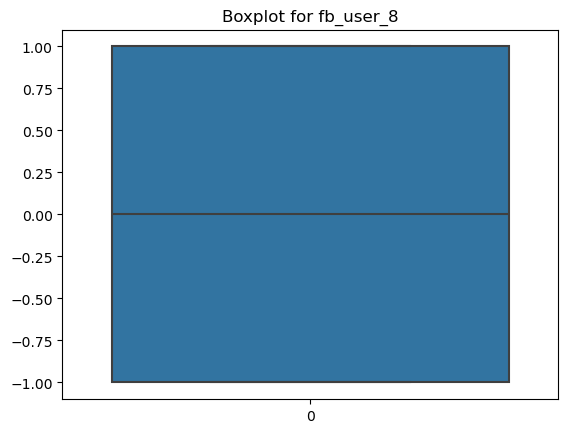

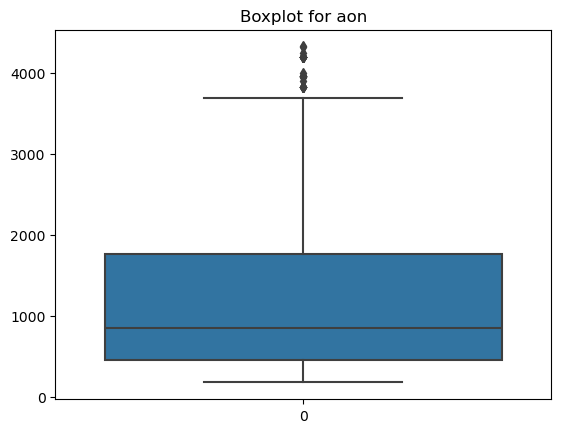

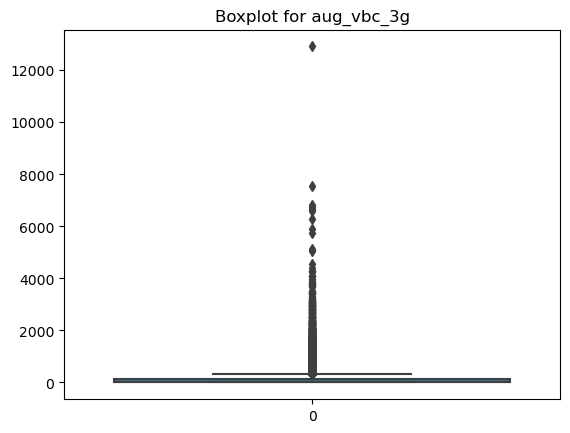

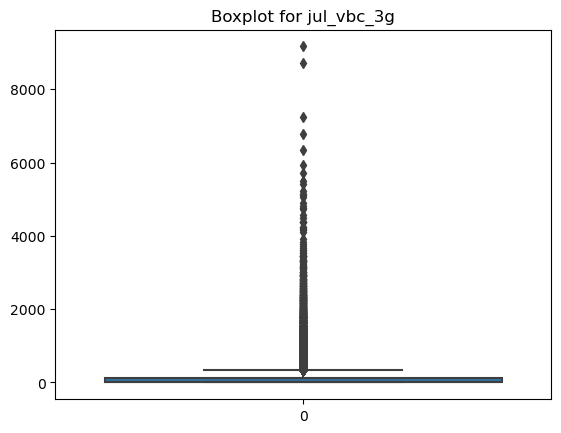

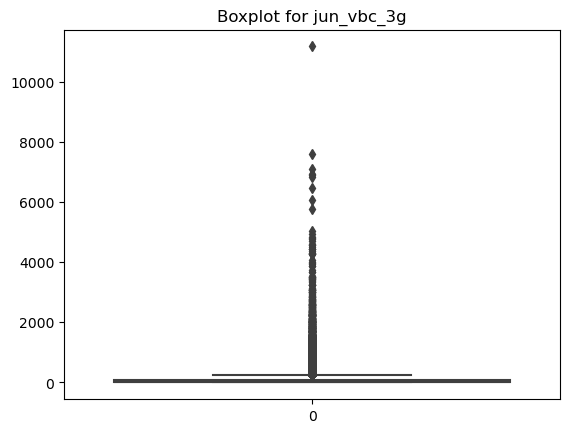

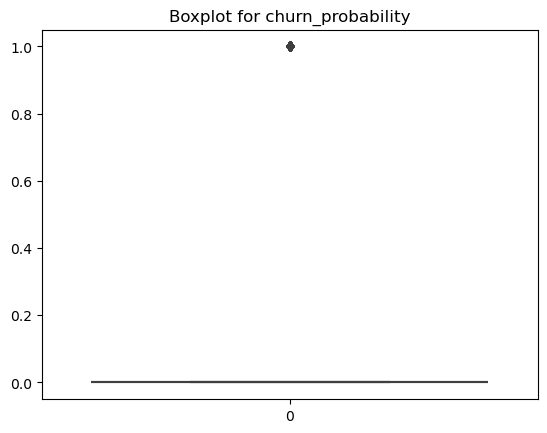

In [36]:
#Visualize outliers in dataset
for i in df.columns:
    sns.boxplot(df[i])
    plt.title("Boxplot for "+i)
    plt.show()

In [37]:
# cap outliers with k-sigma technique
def cap_outliers(arr, k=3):
    upper_lmt = arr.mean() + k*arr.std()
    lower_lmt = arr.mean() - k*arr.std()
    arr[arr<lower_lmt] = lower_lmt
    arr[arr>upper_lmt] = upper_lmt
    return arr

In [38]:
# cap outliers for the numeric columns
dfnew = df.drop('churn_probability', axis=1)
df[dfnew.columns] = df[dfnew.columns].apply(cap_outliers, axis=0)

In [39]:
df.shape

(21013, 140)

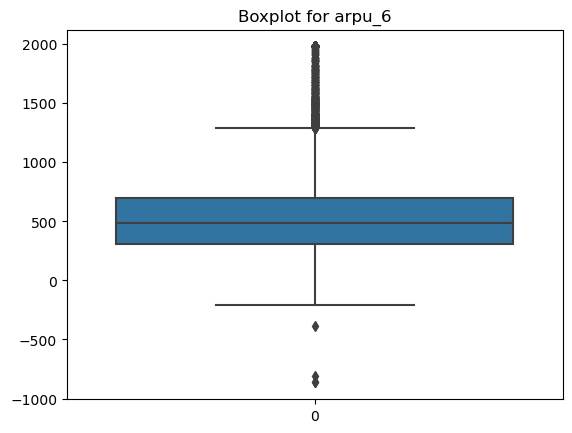

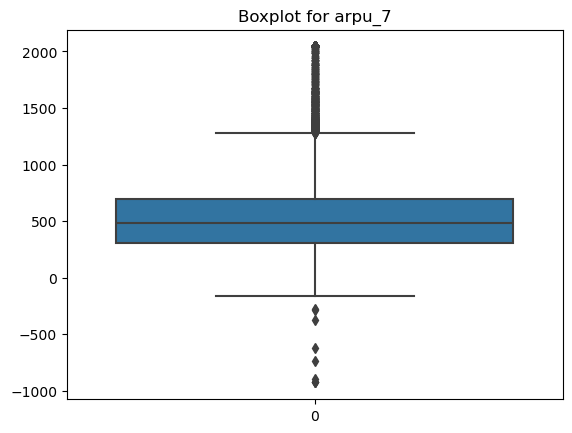

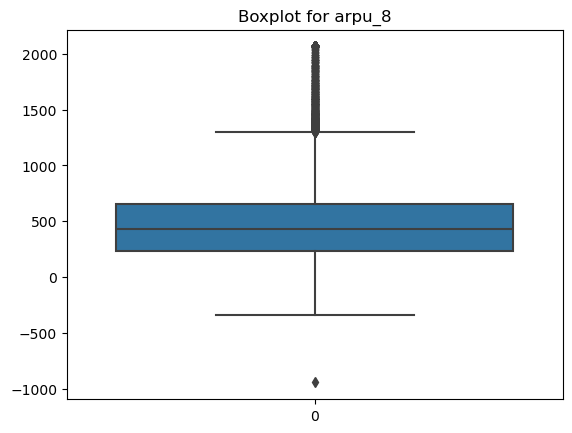

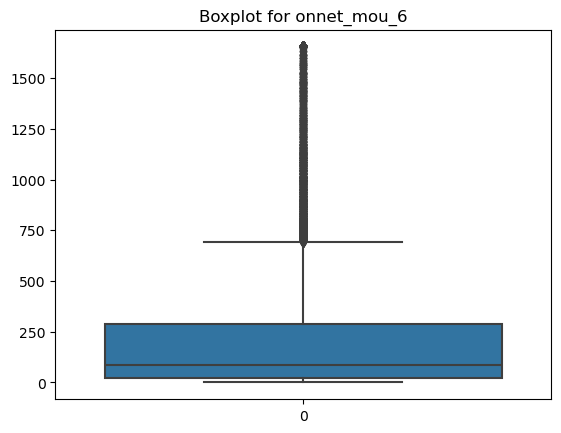

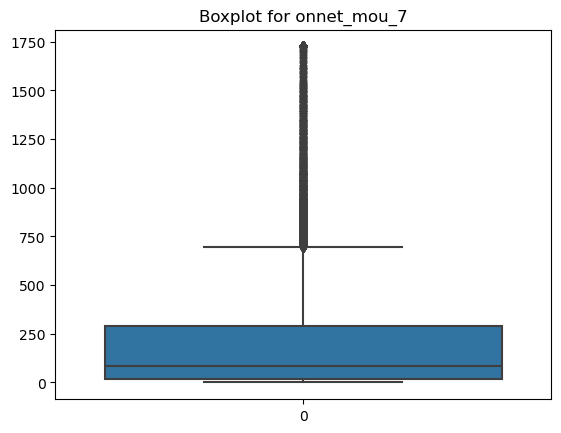

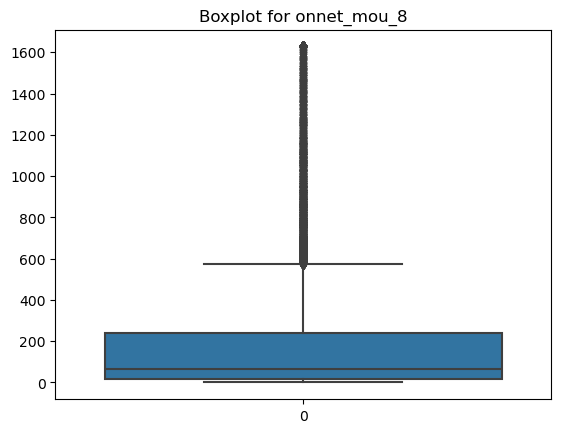

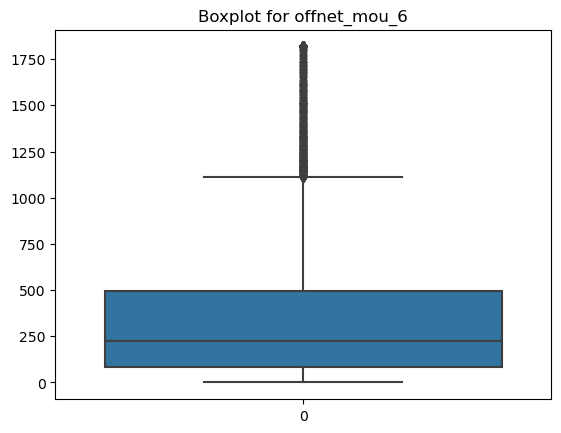

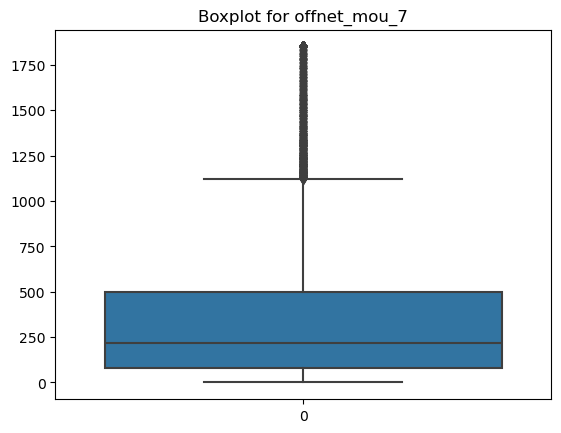

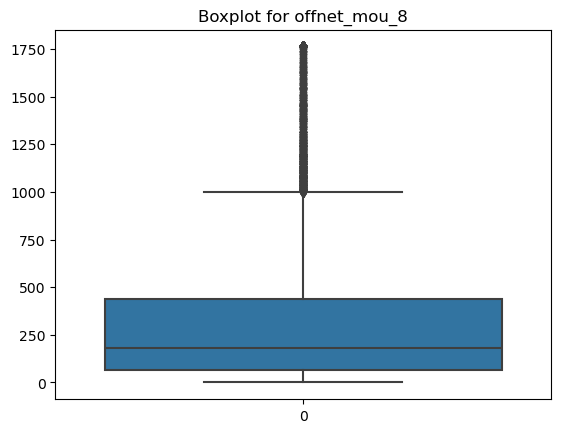

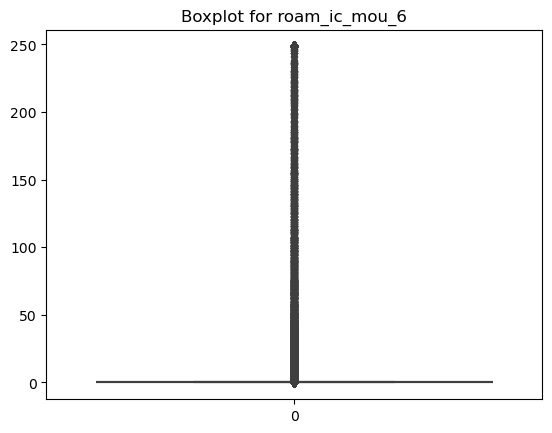

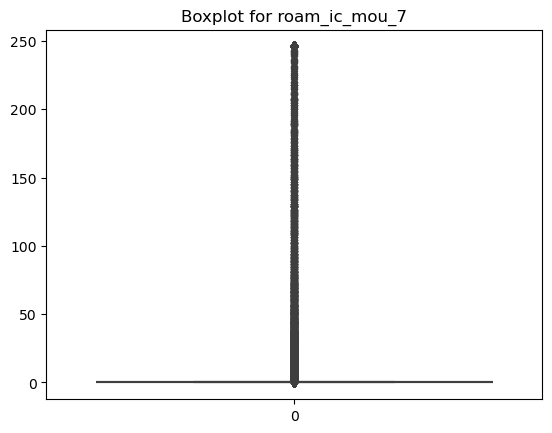

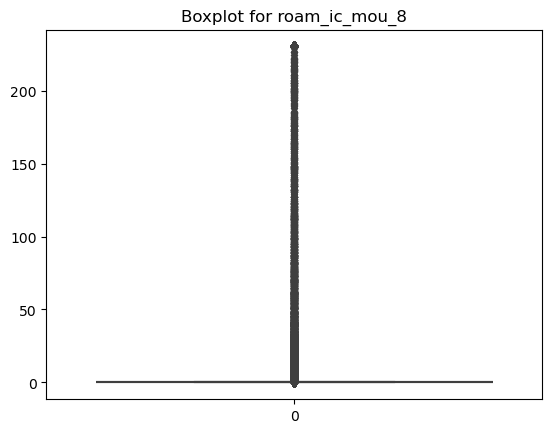

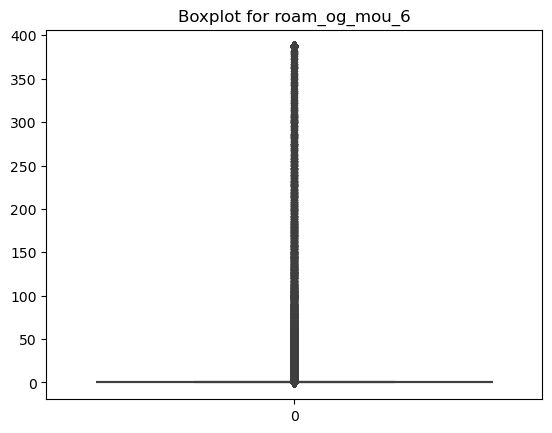

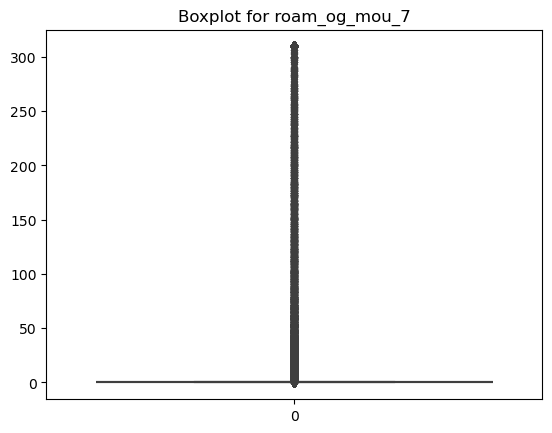

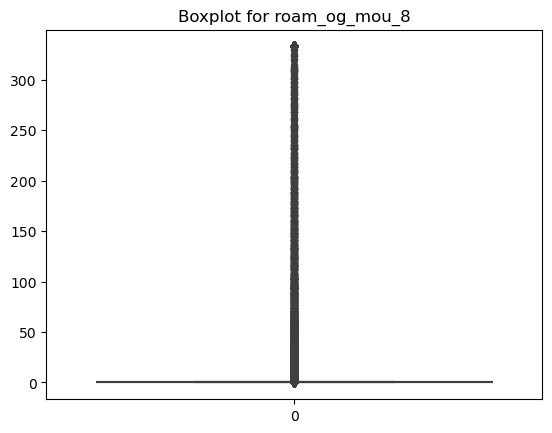

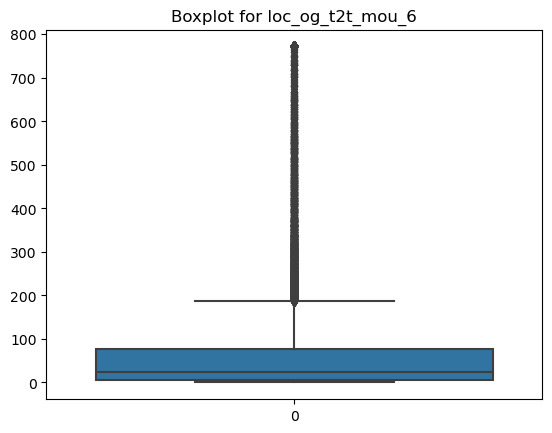

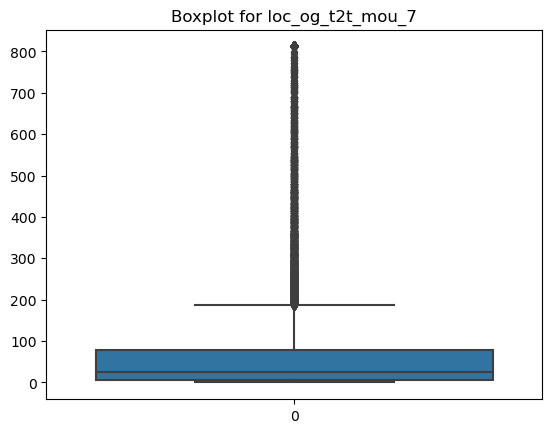

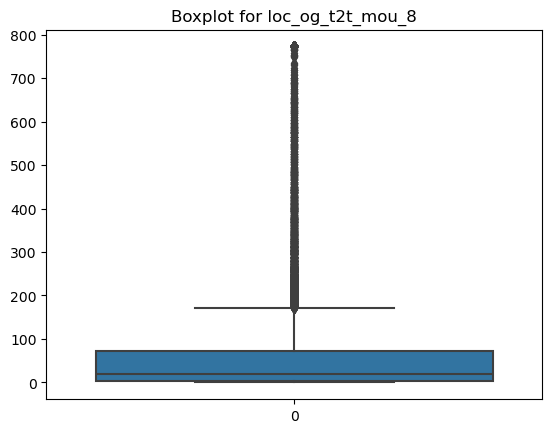

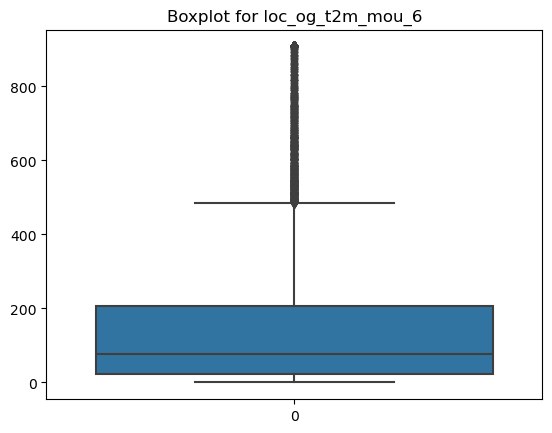

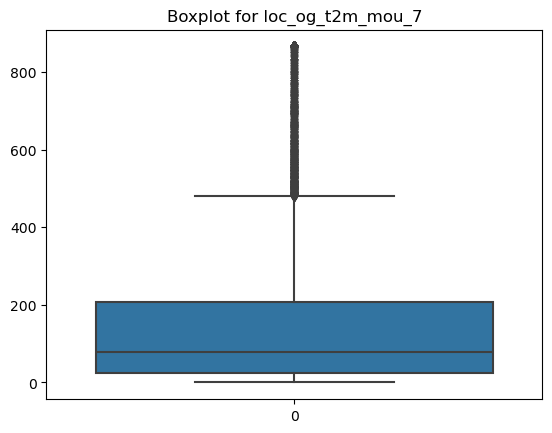

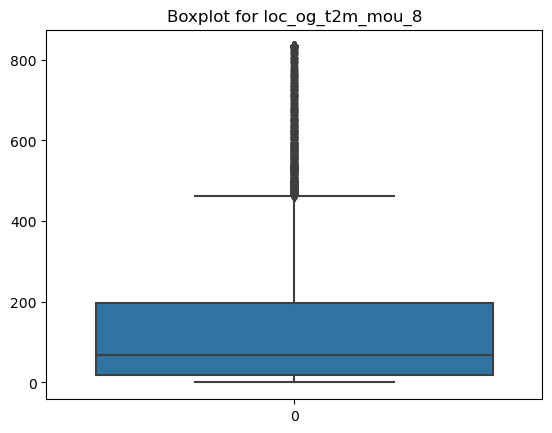

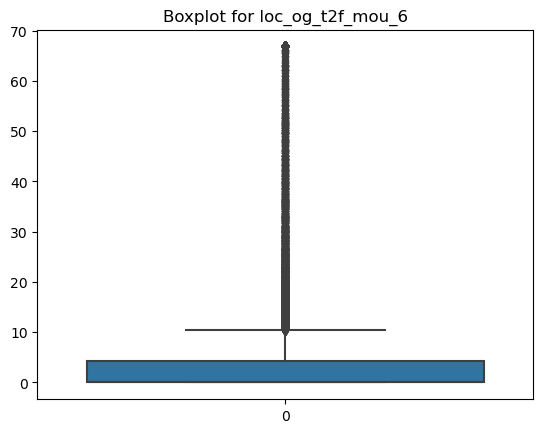

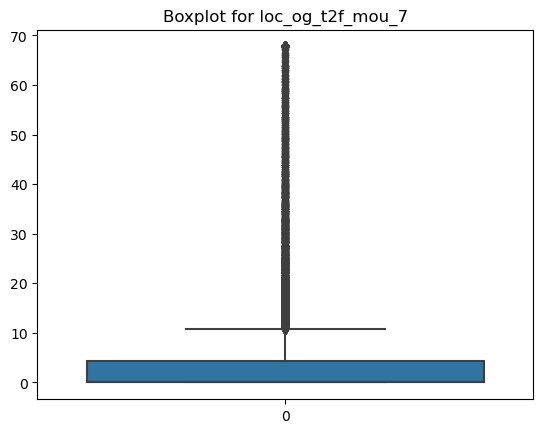

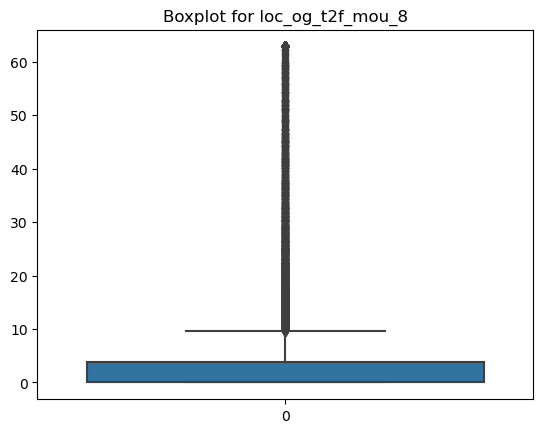

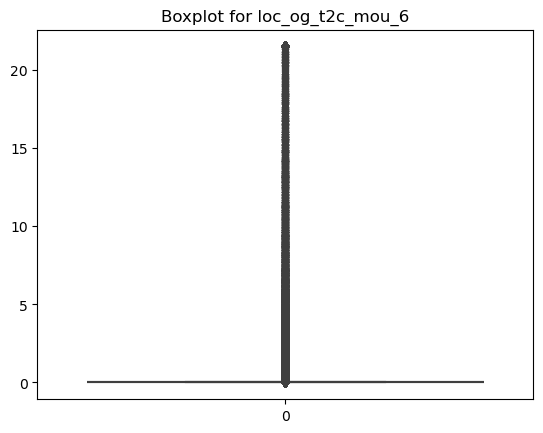

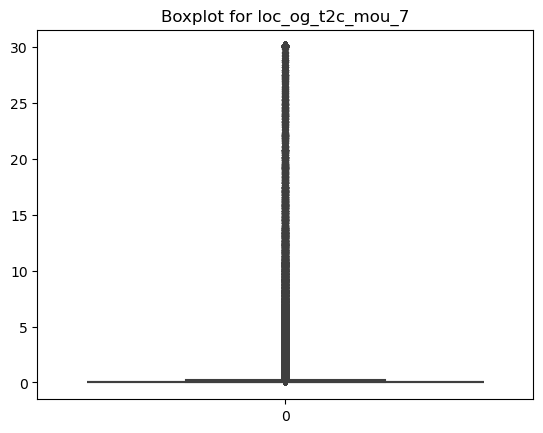

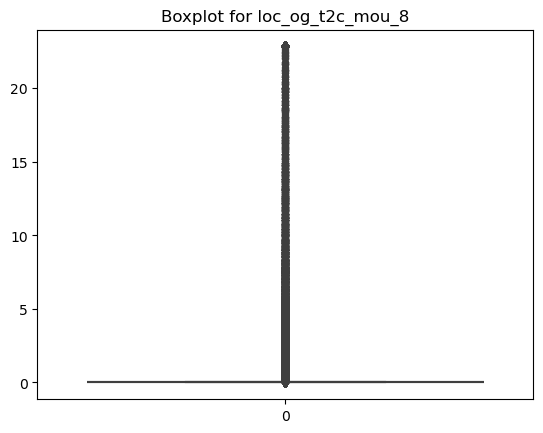

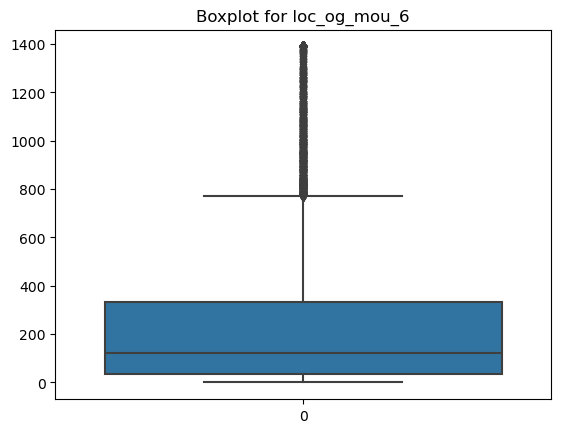

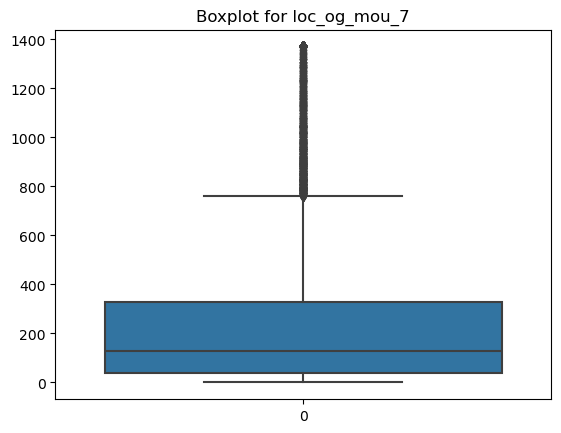

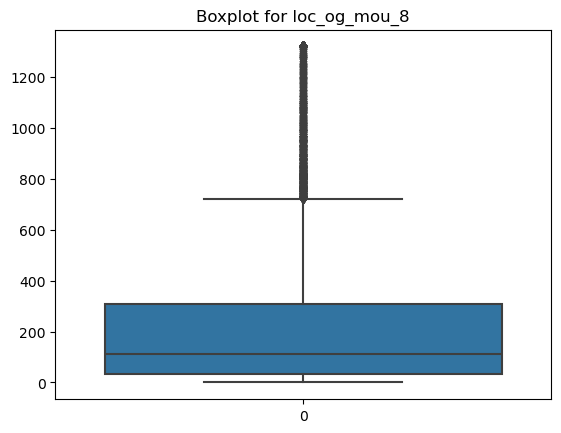

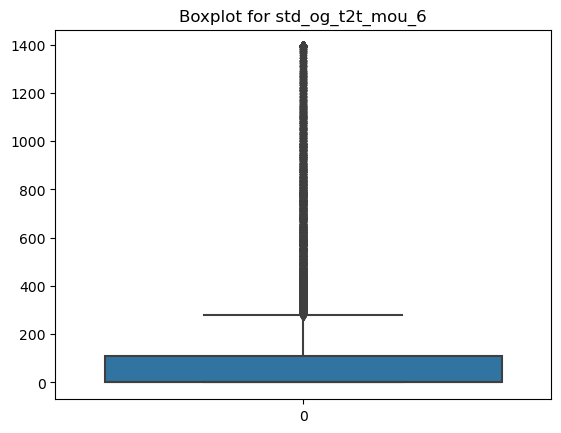

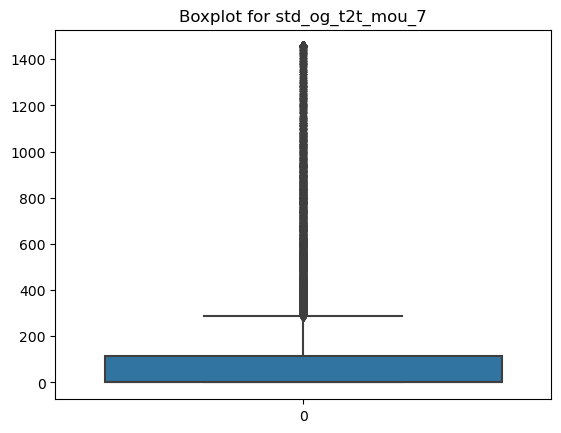

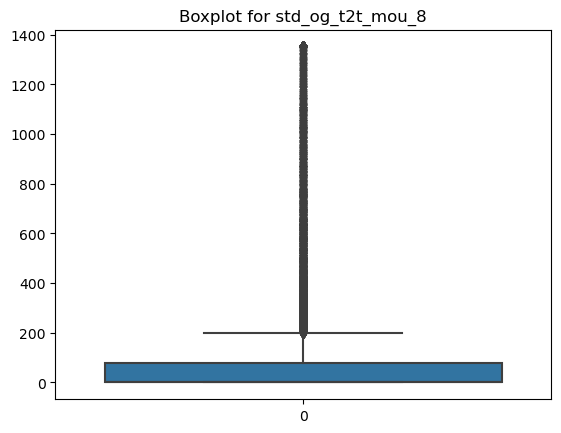

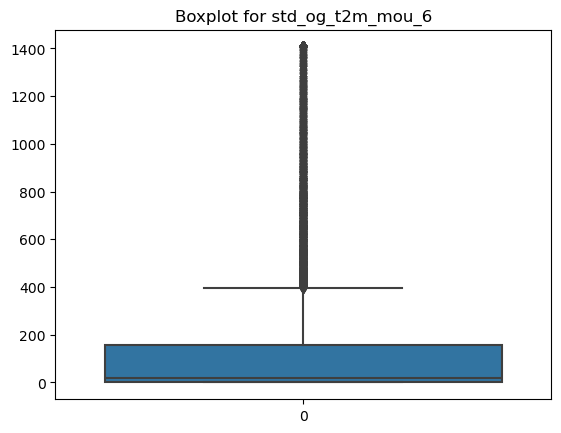

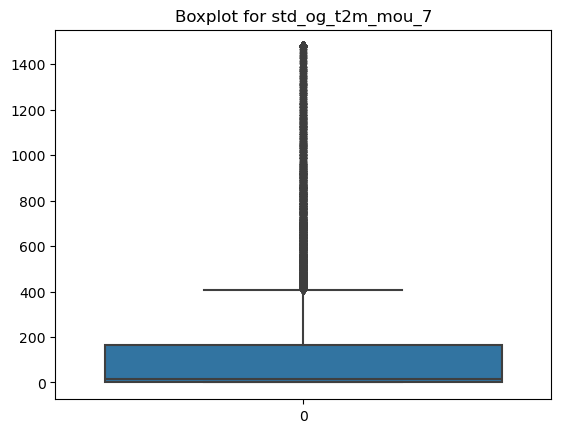

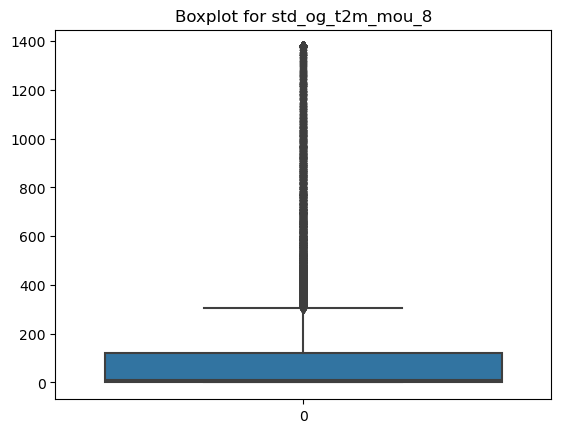

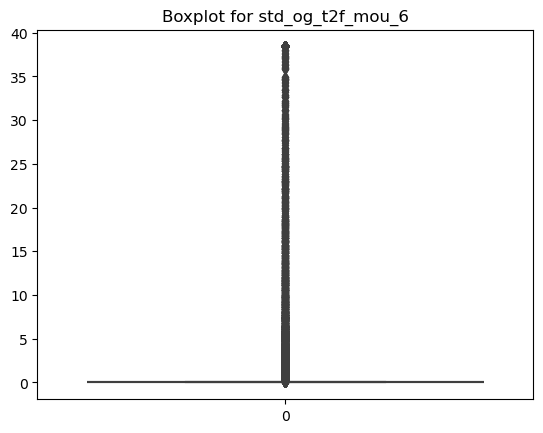

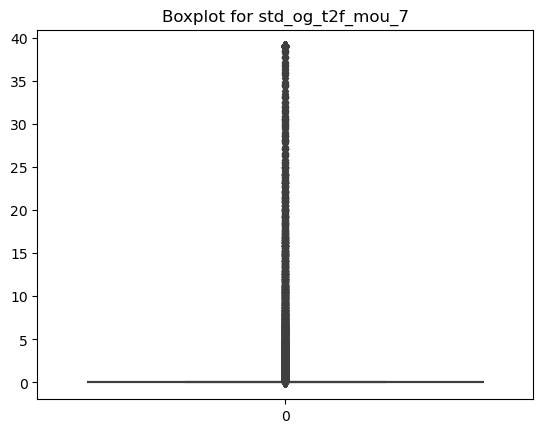

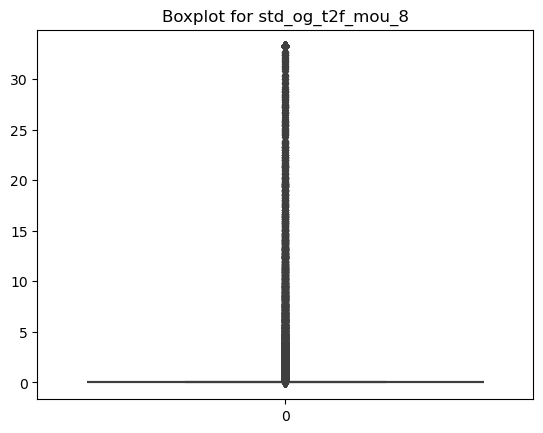

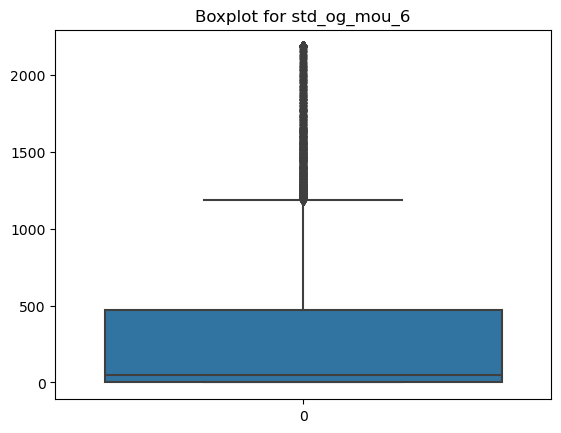

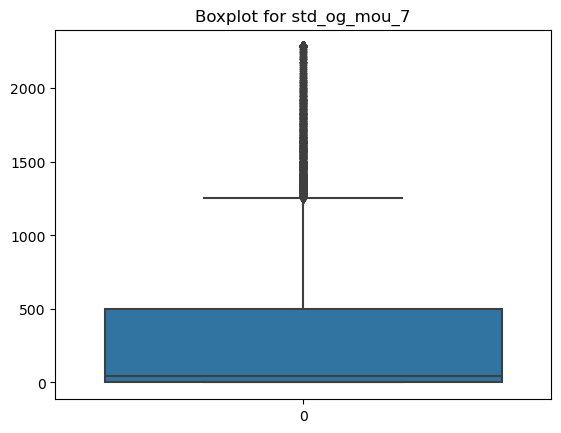

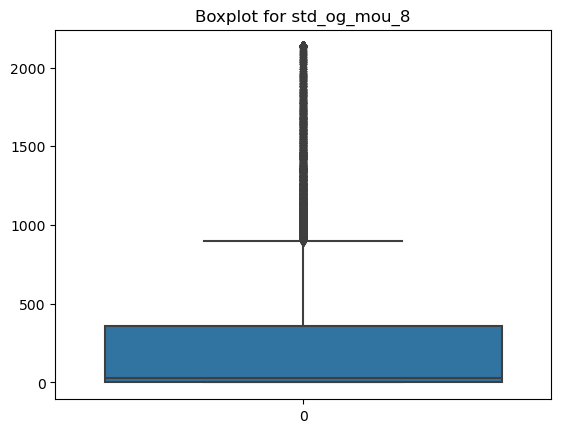

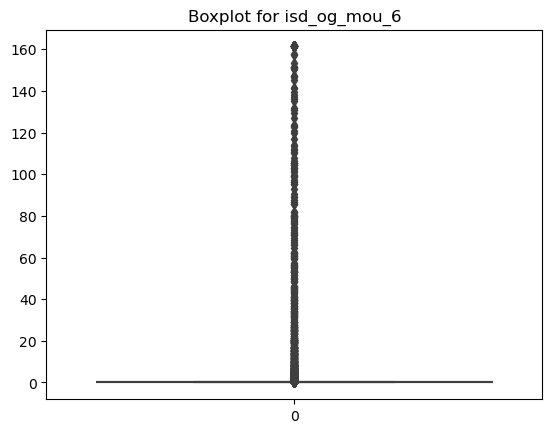

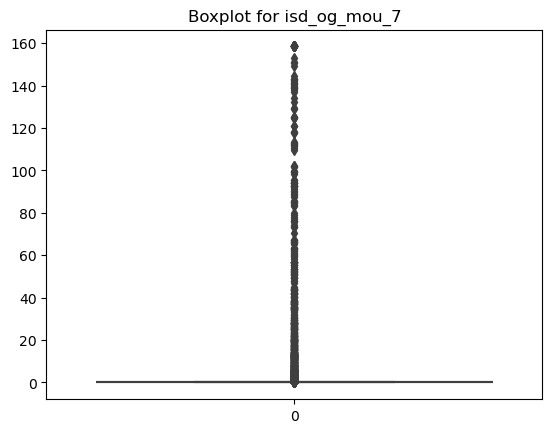

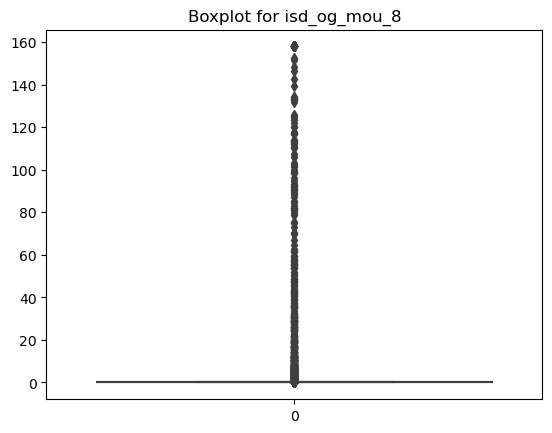

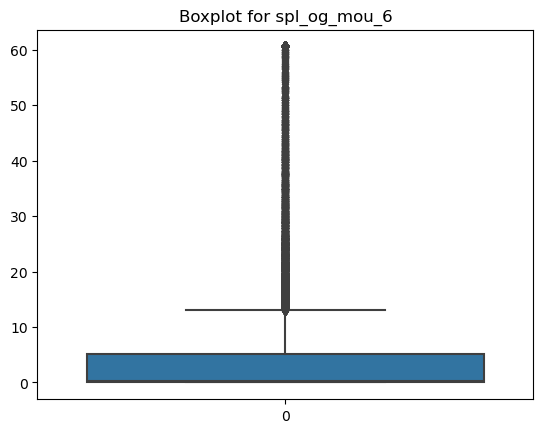

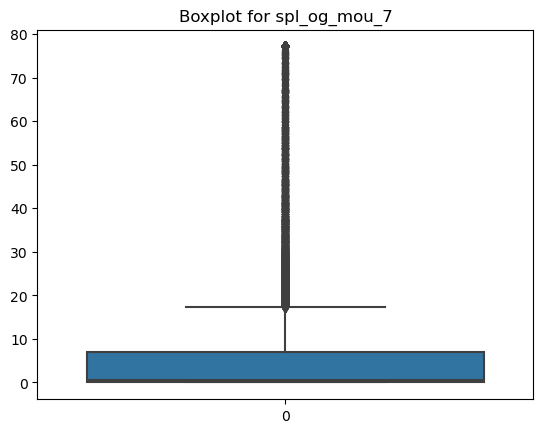

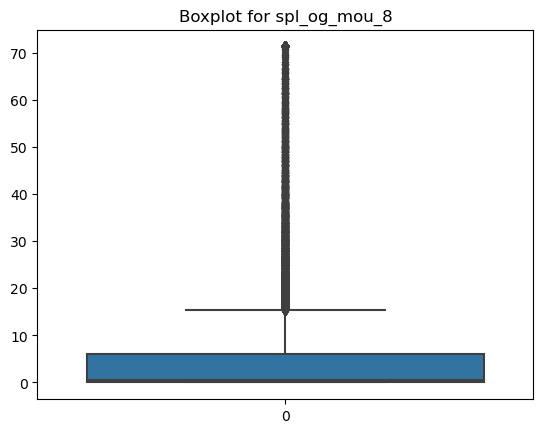

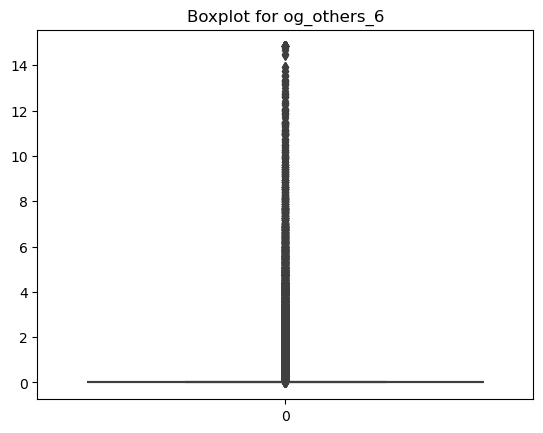

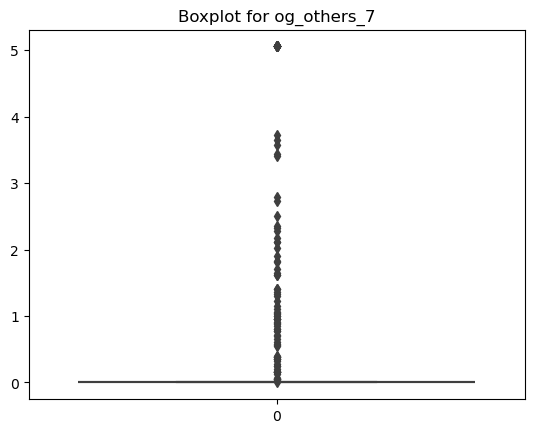

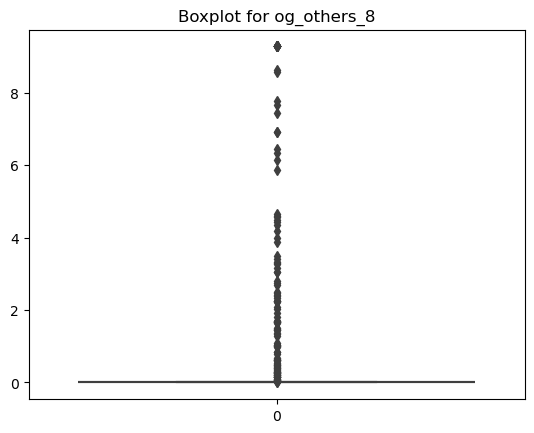

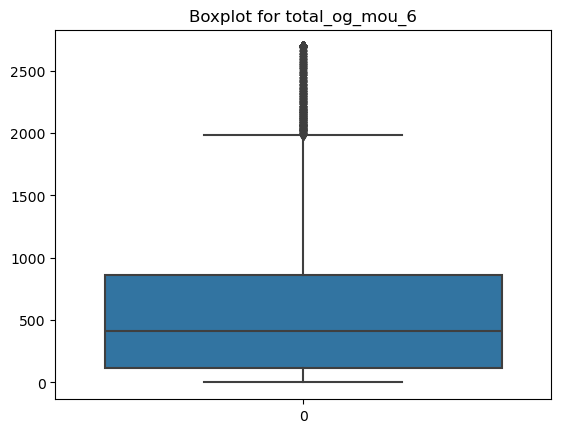

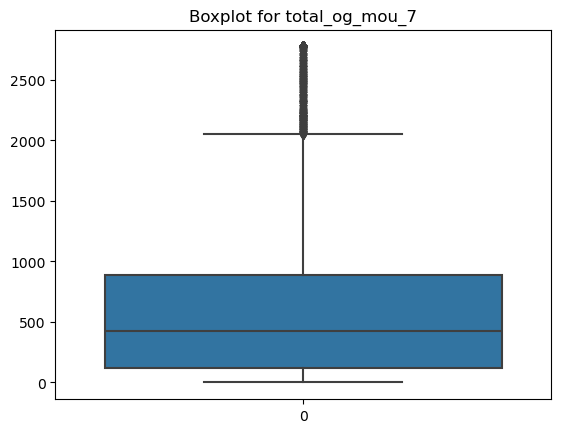

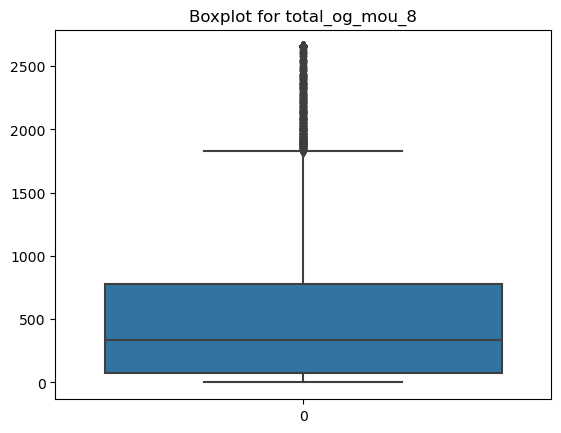

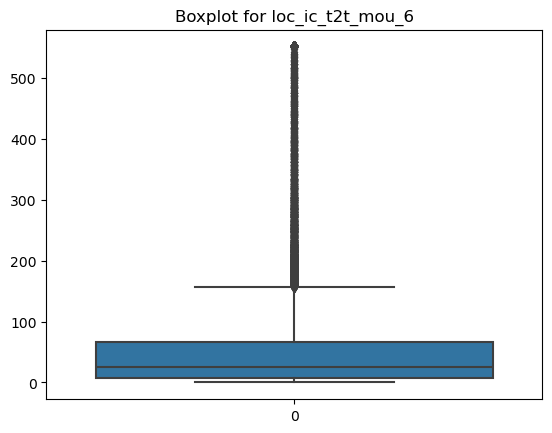

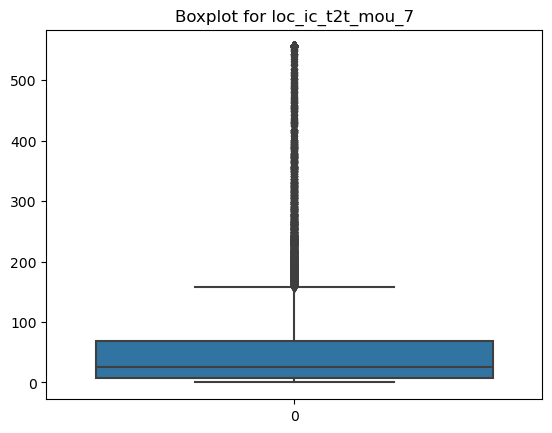

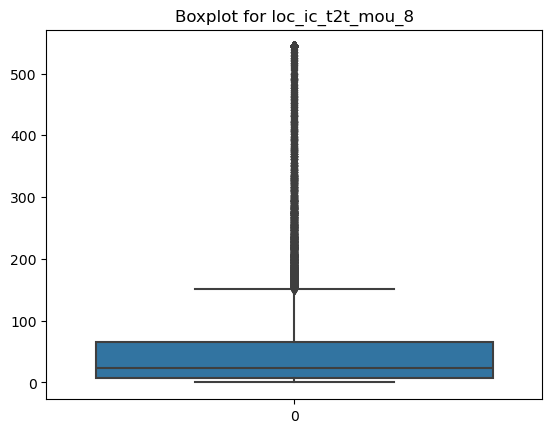

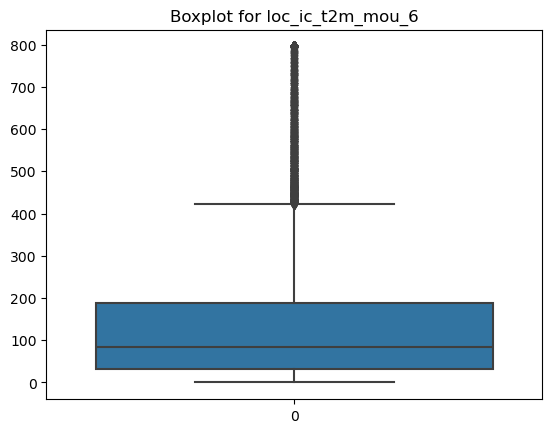

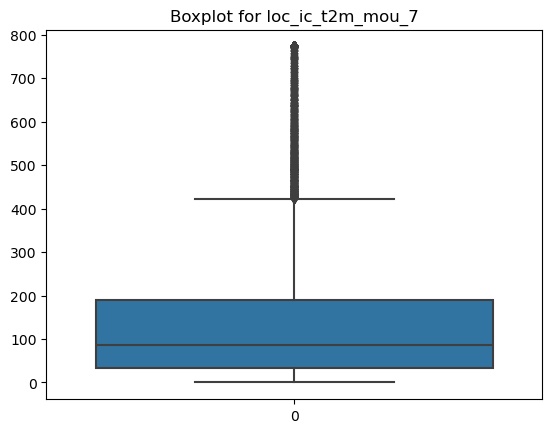

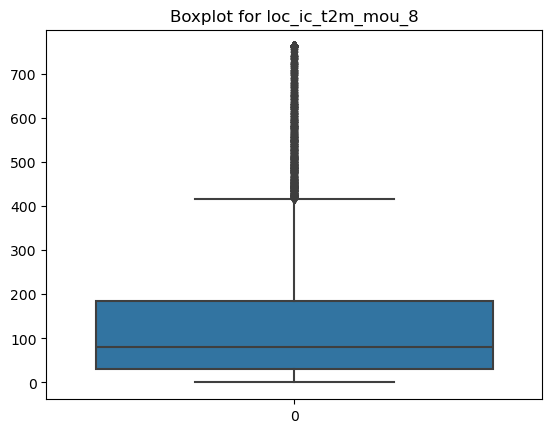

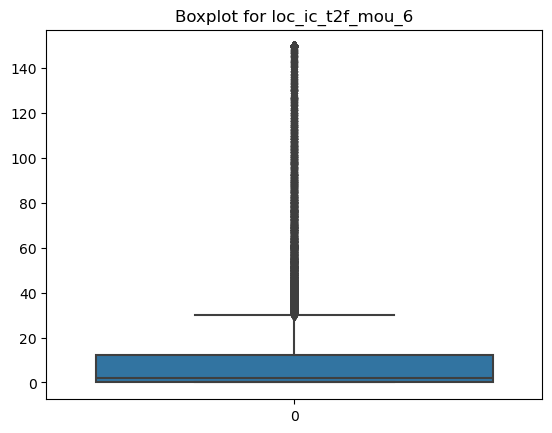

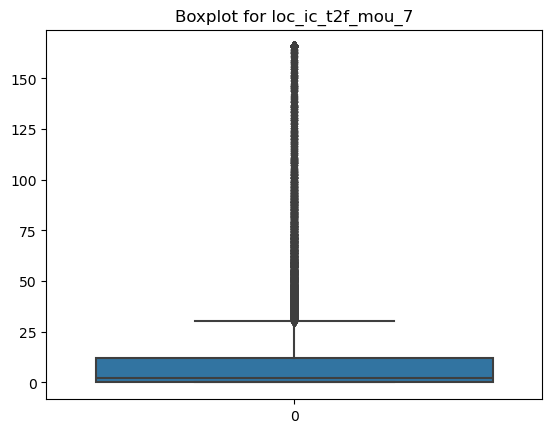

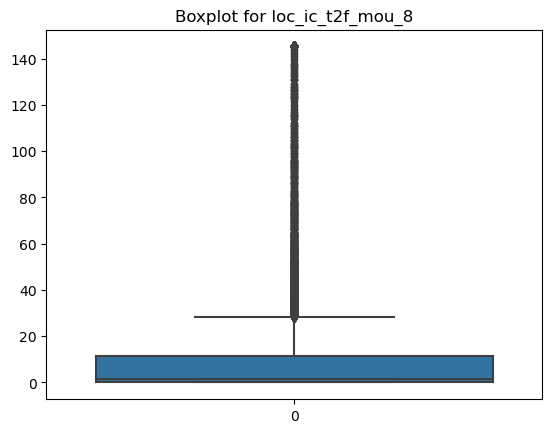

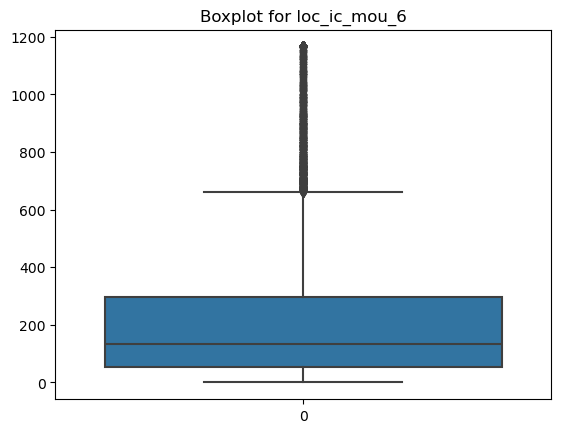

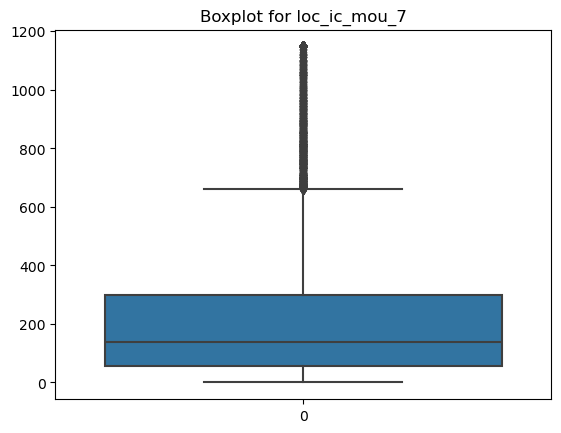

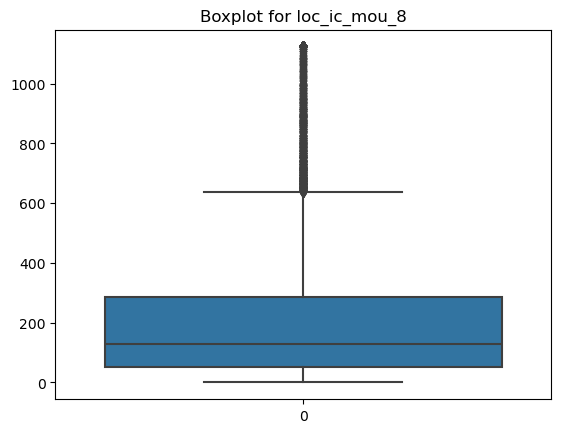

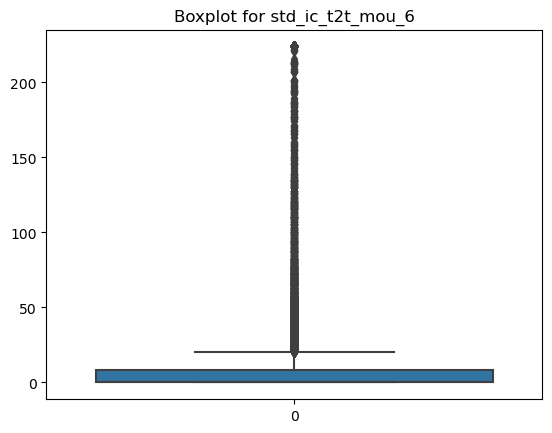

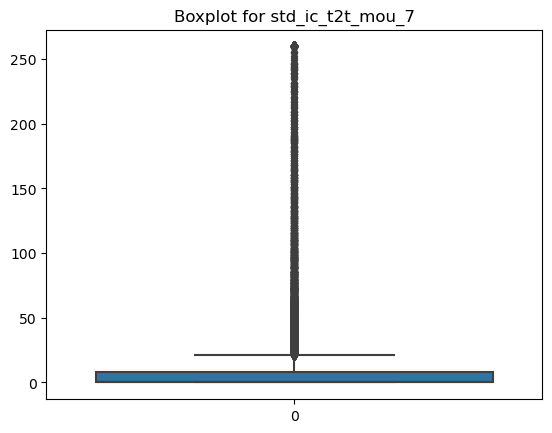

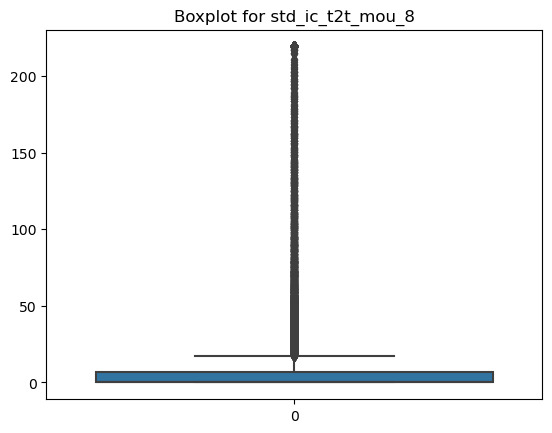

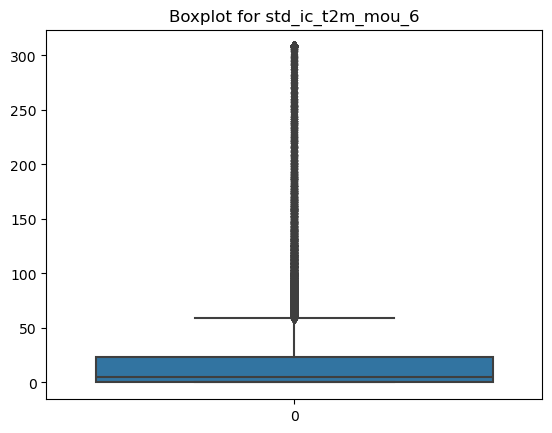

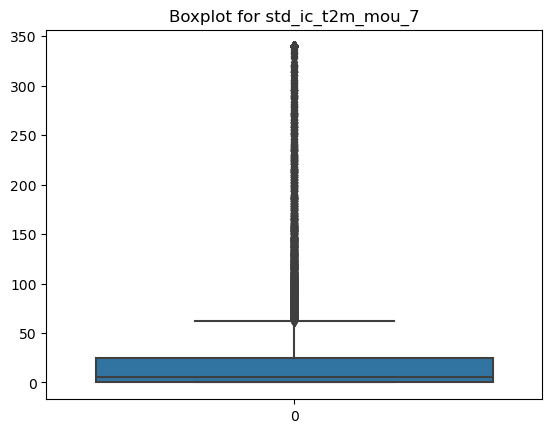

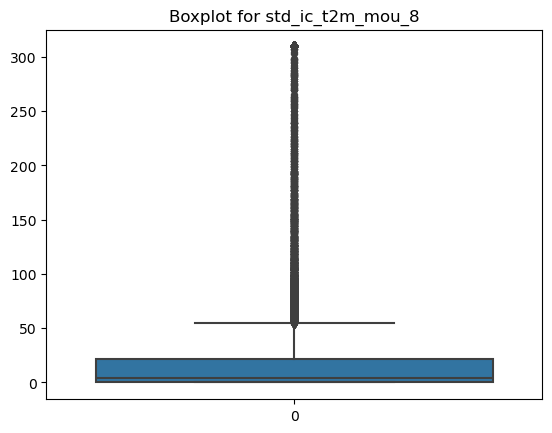

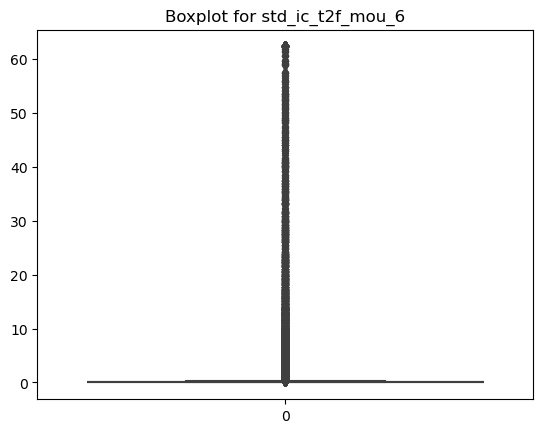

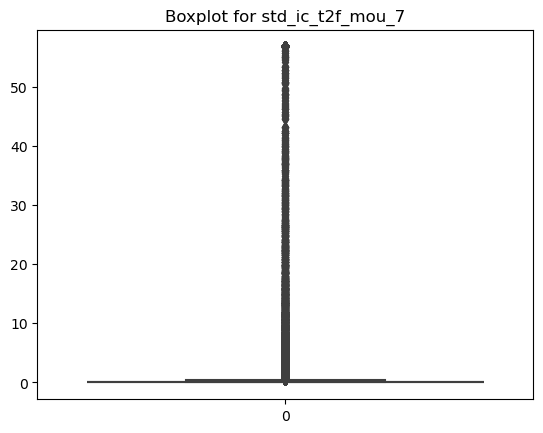

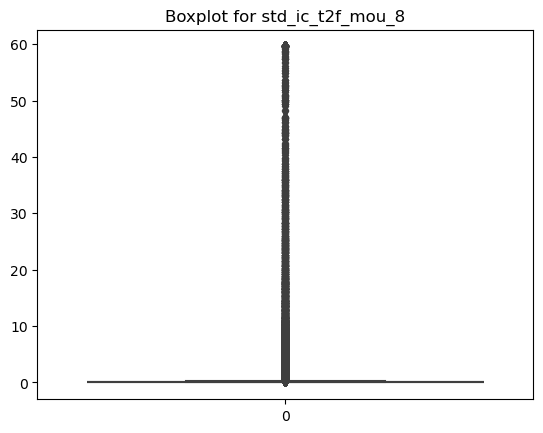

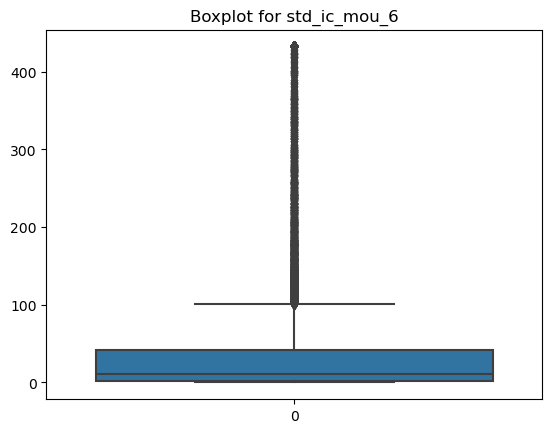

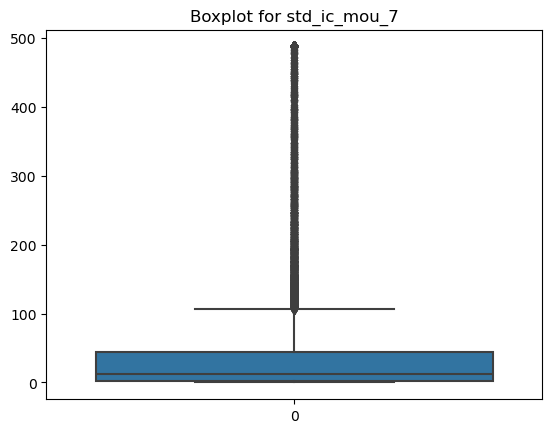

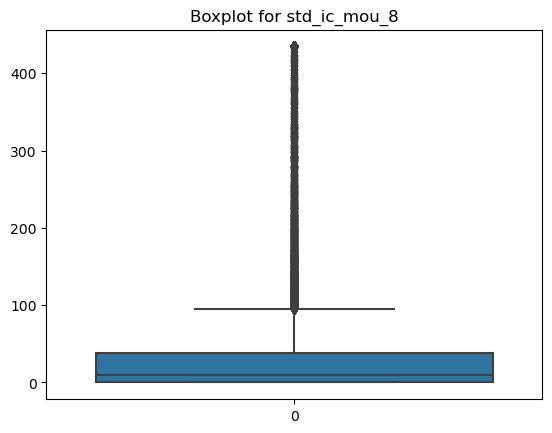

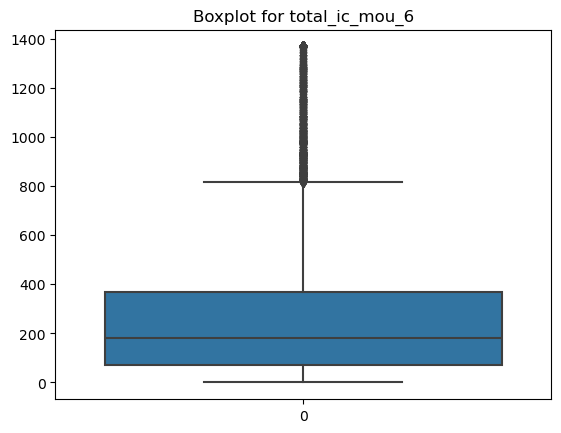

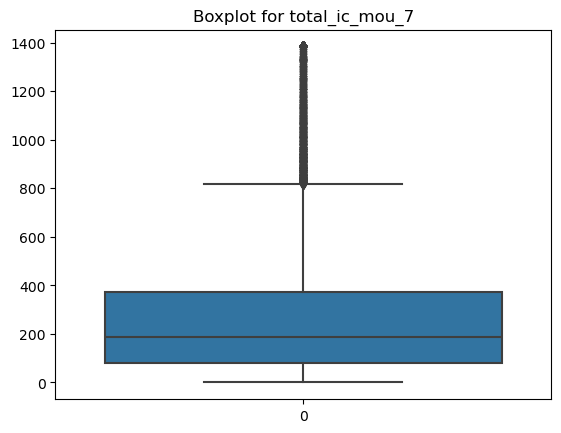

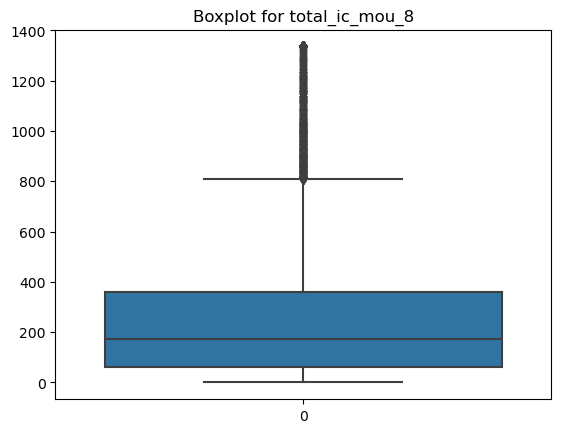

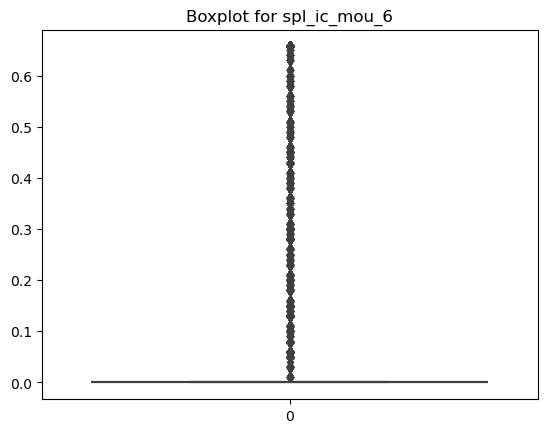

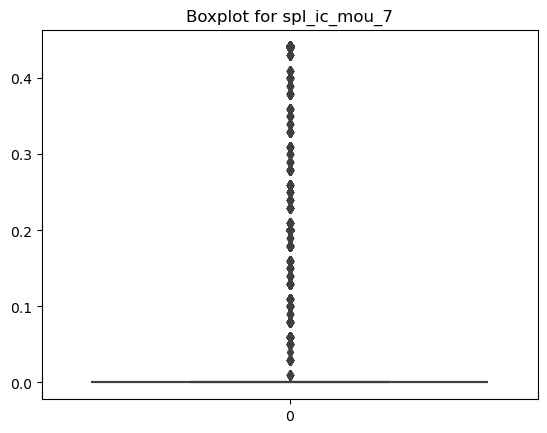

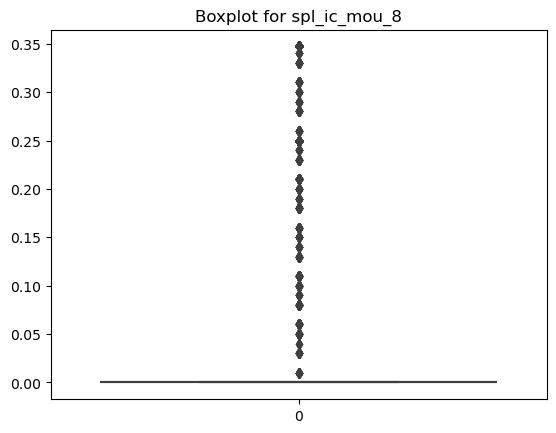

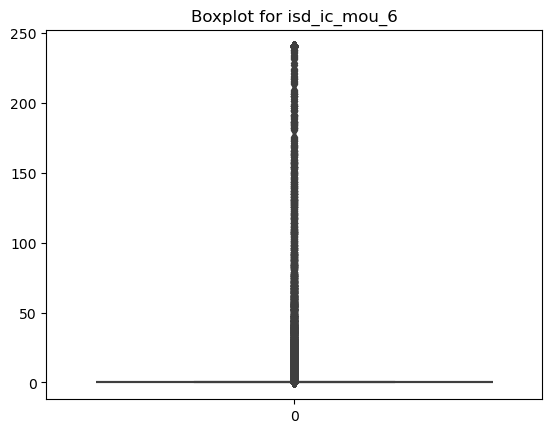

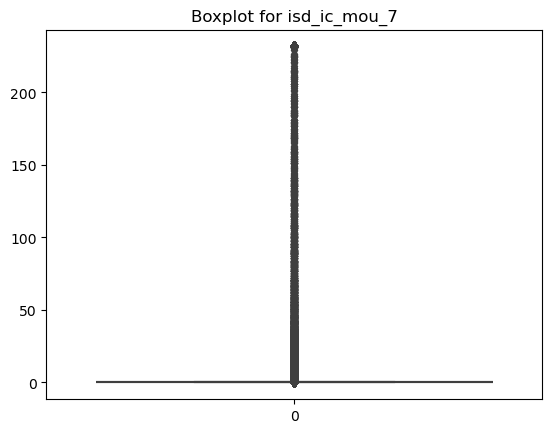

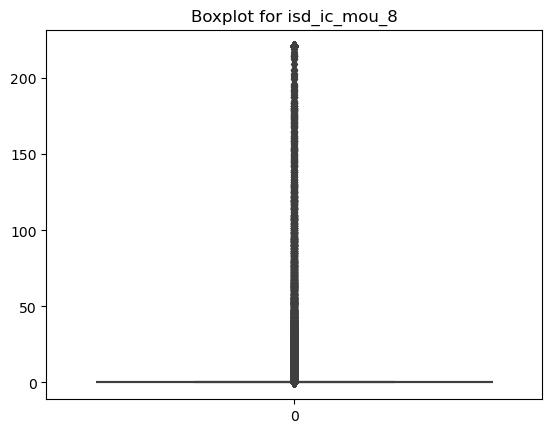

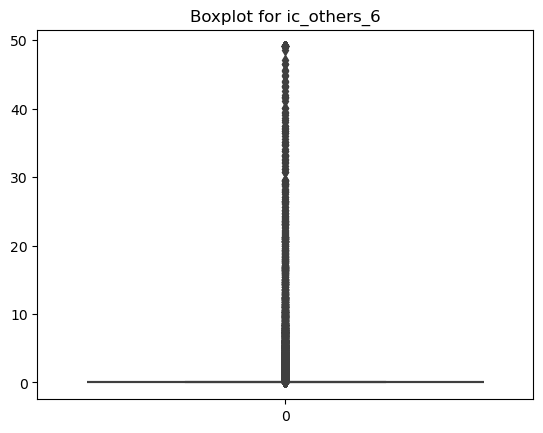

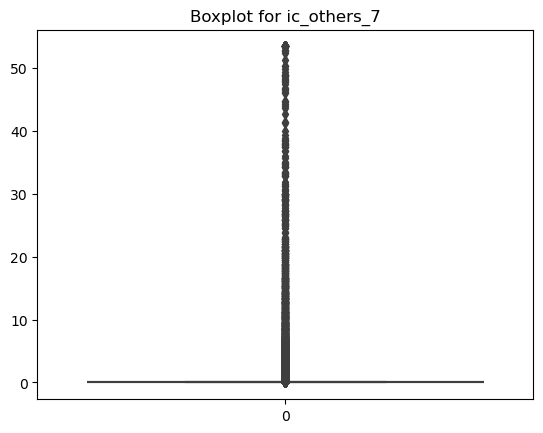

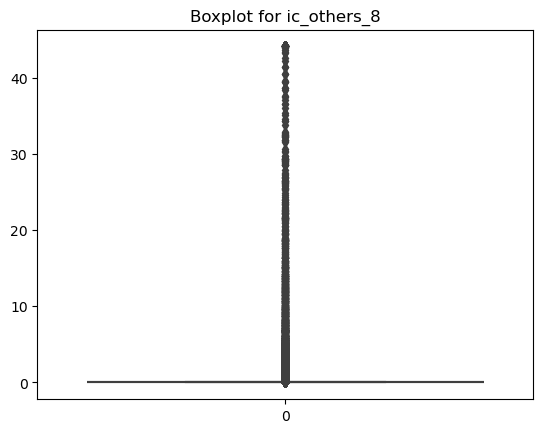

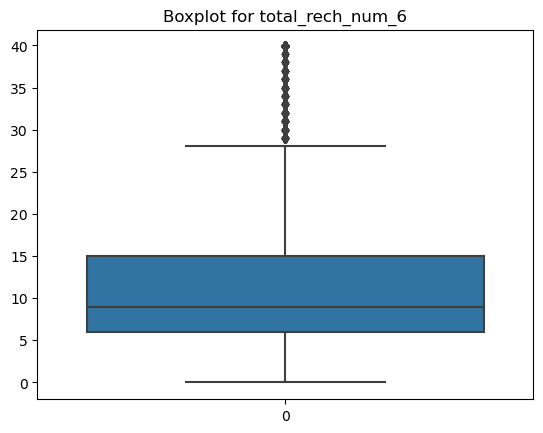

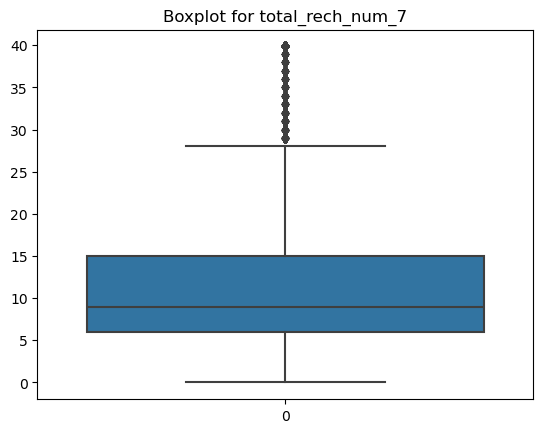

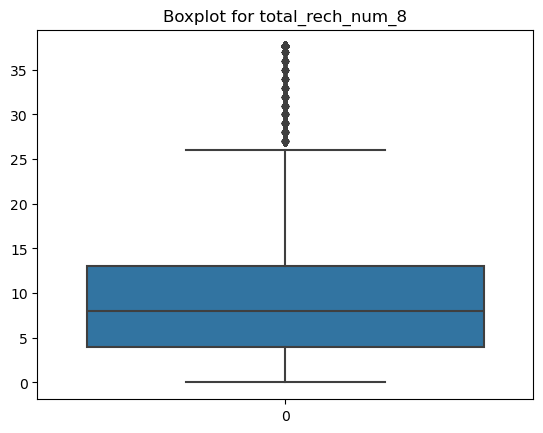

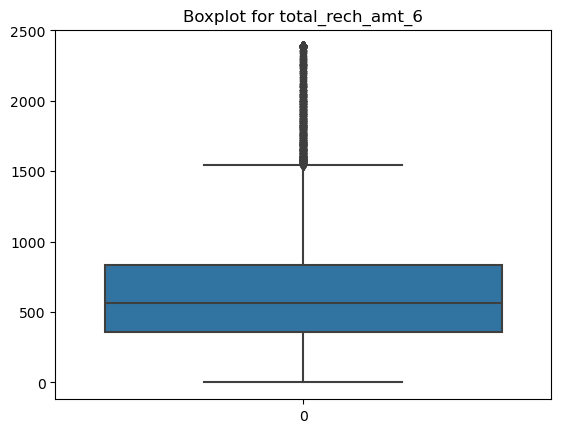

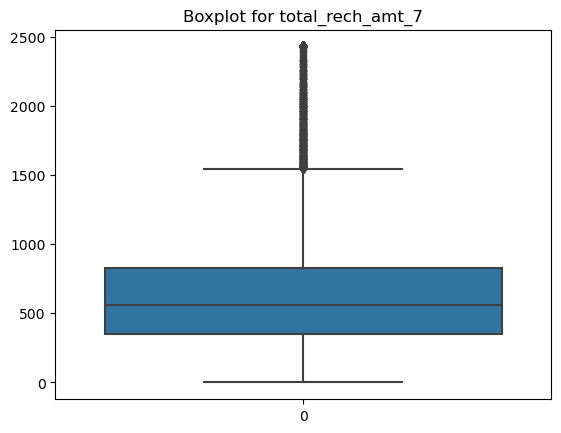

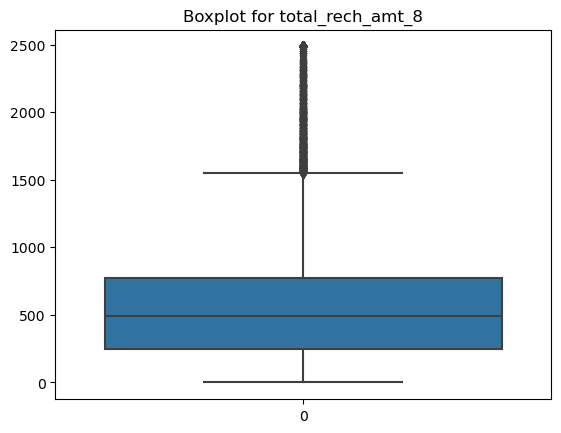

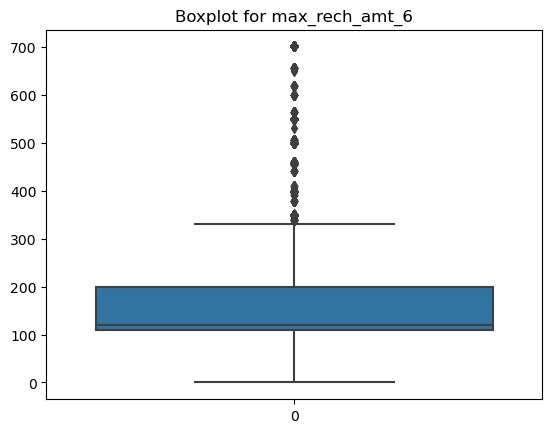

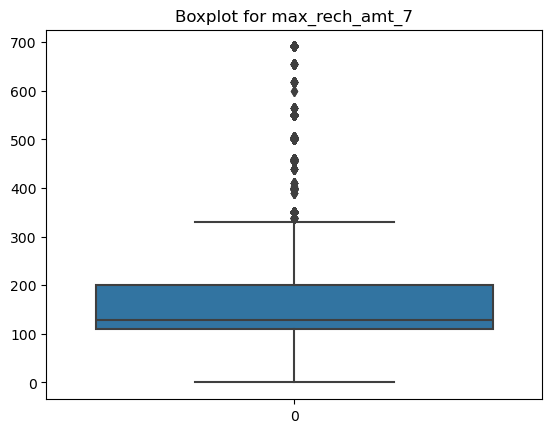

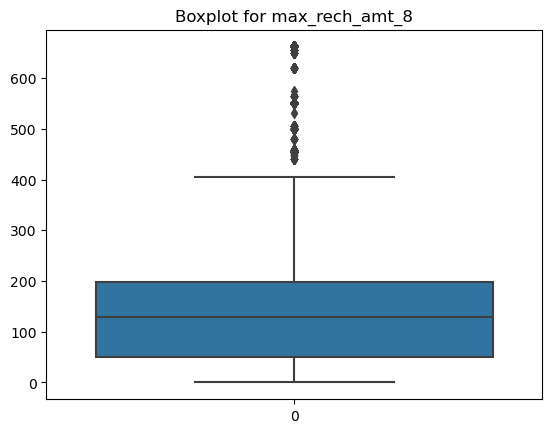

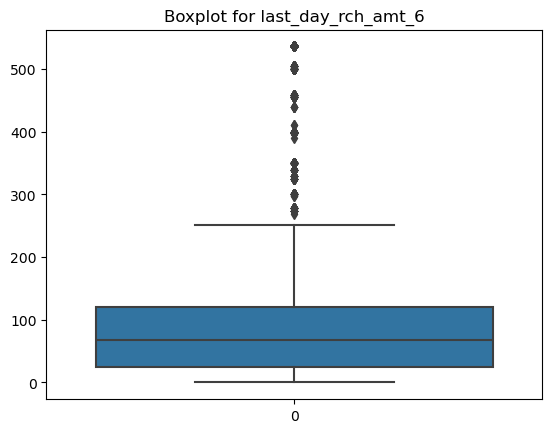

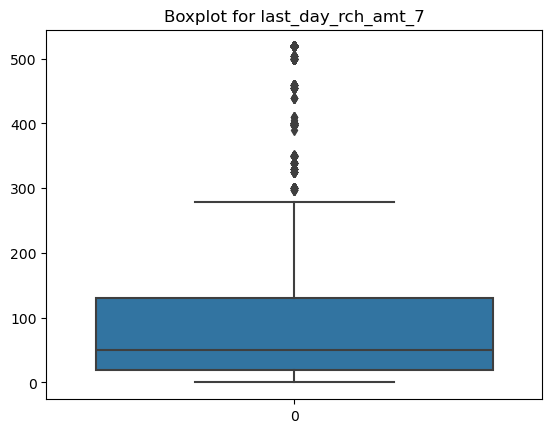

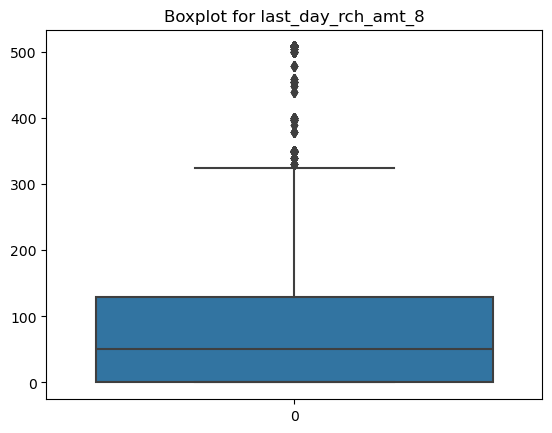

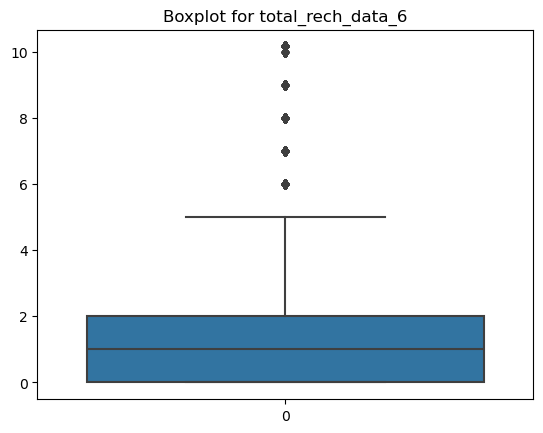

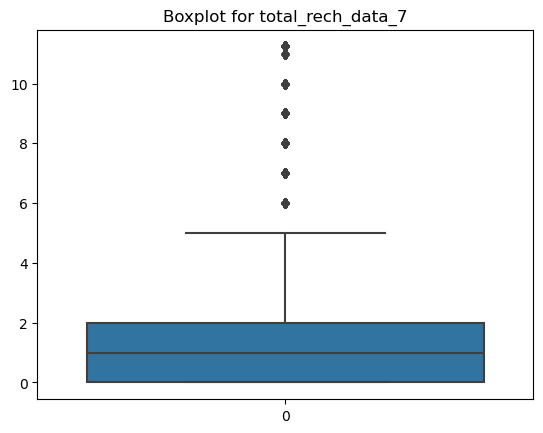

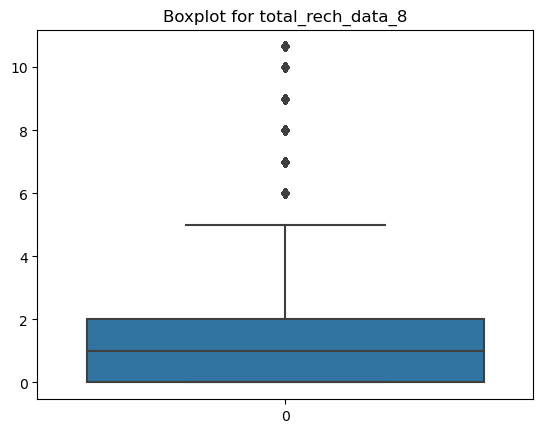

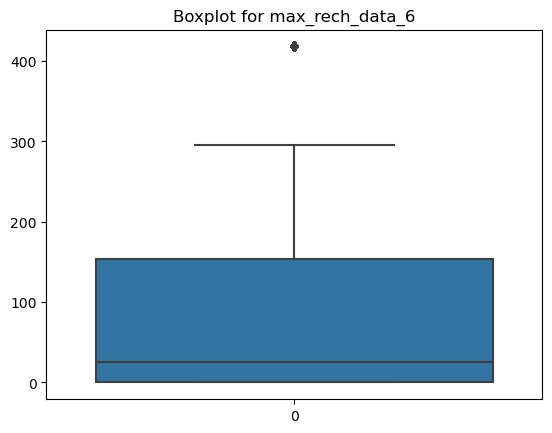

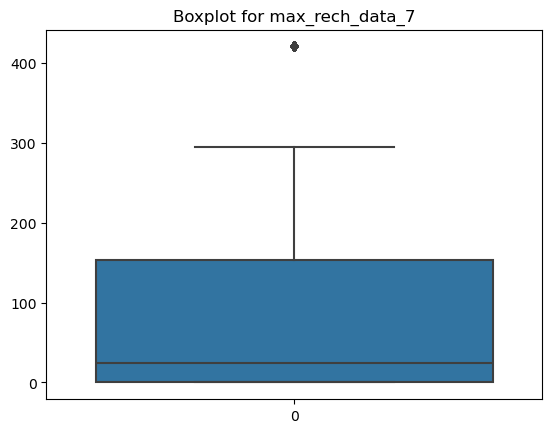

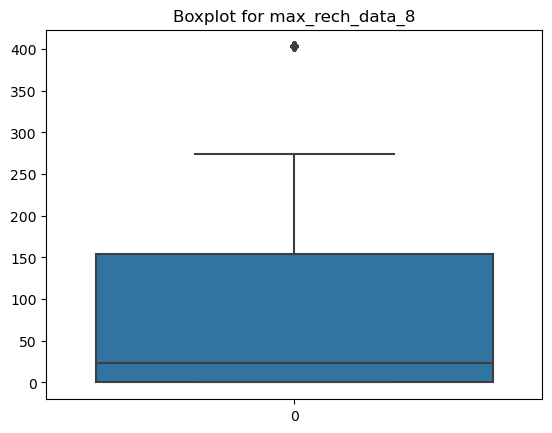

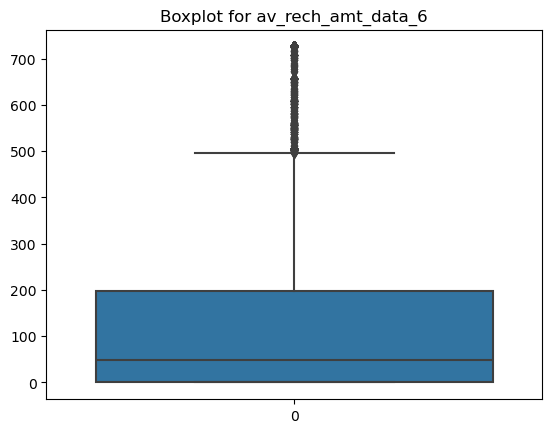

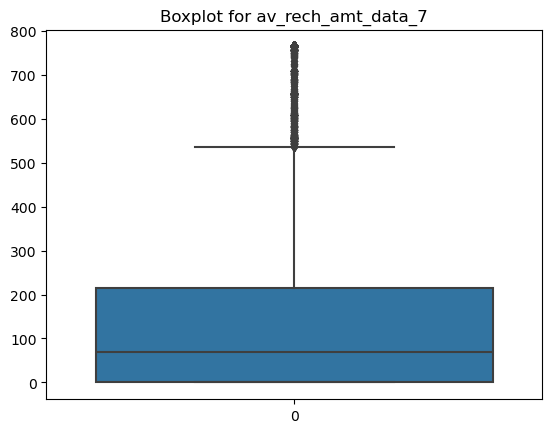

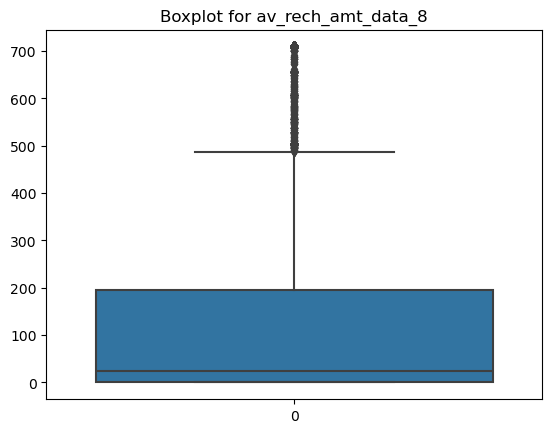

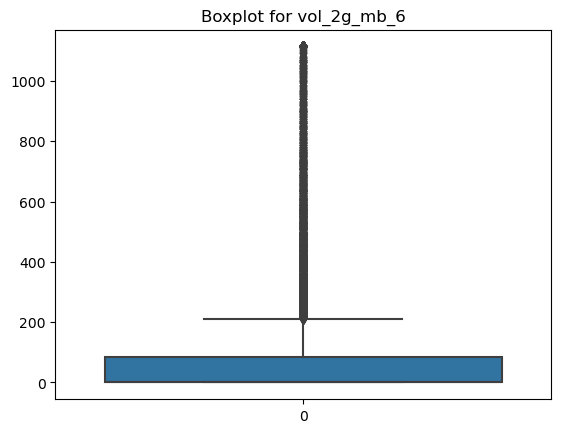

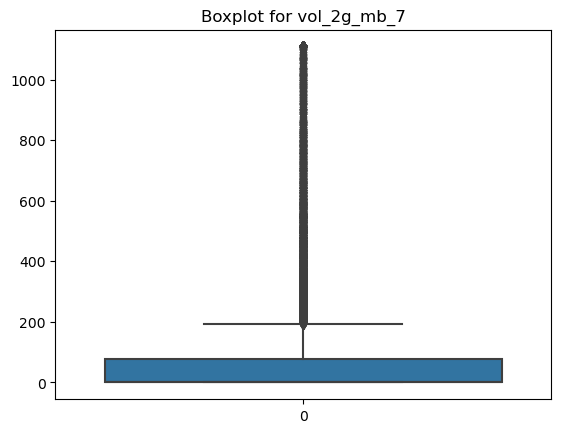

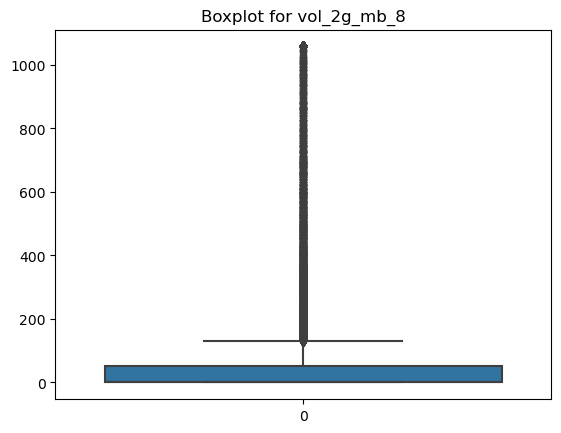

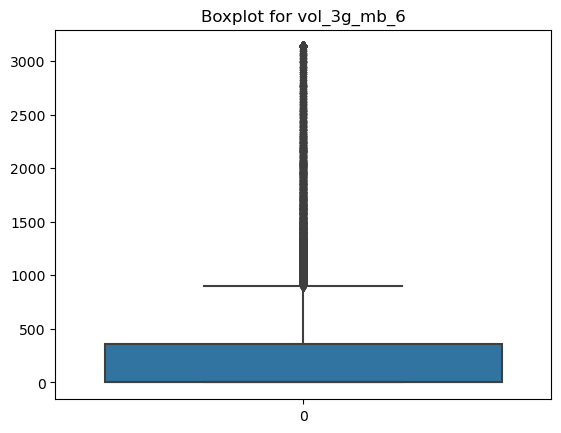

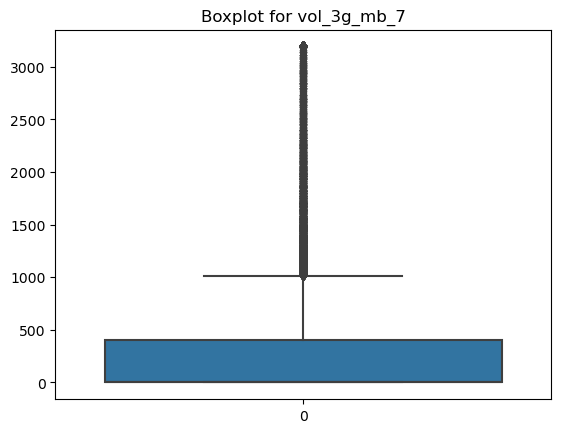

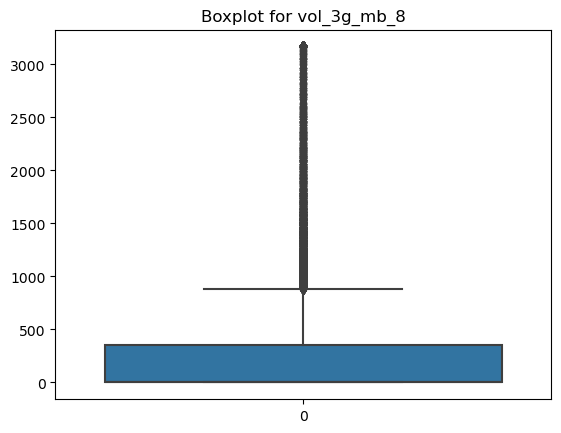

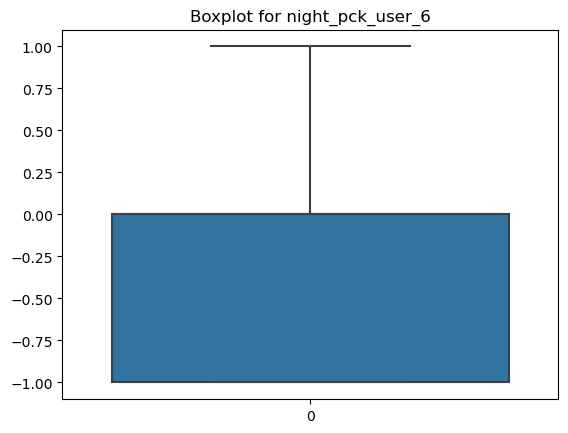

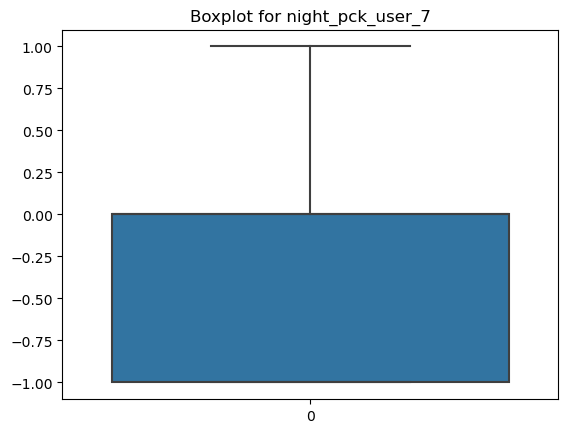

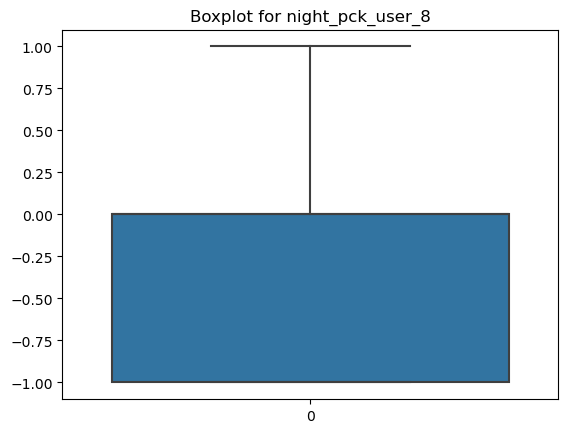

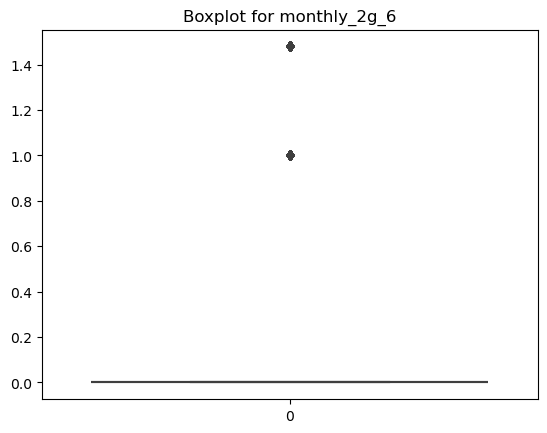

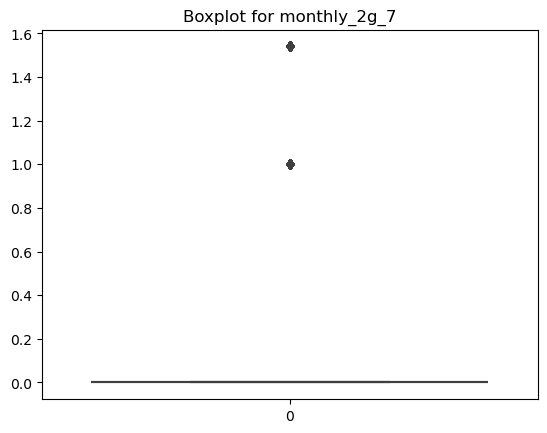

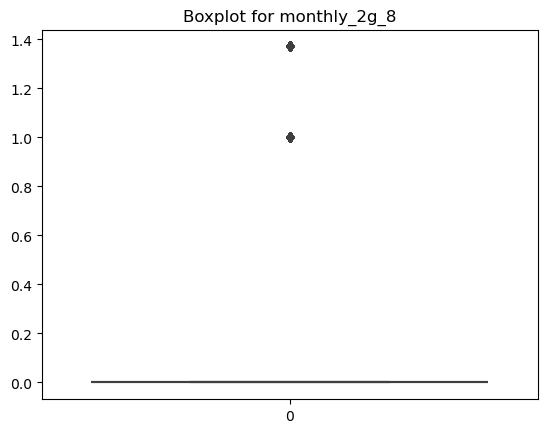

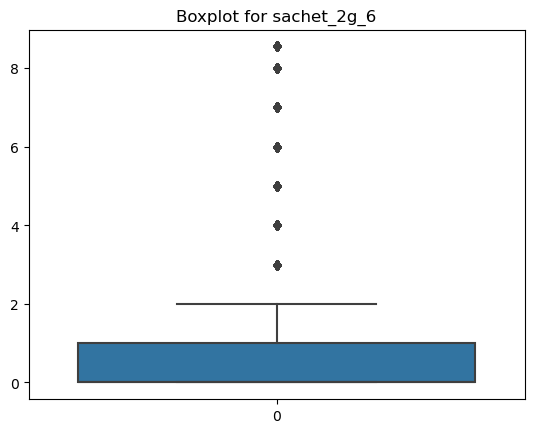

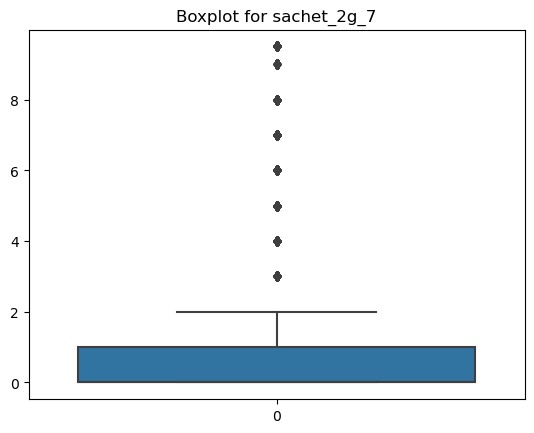

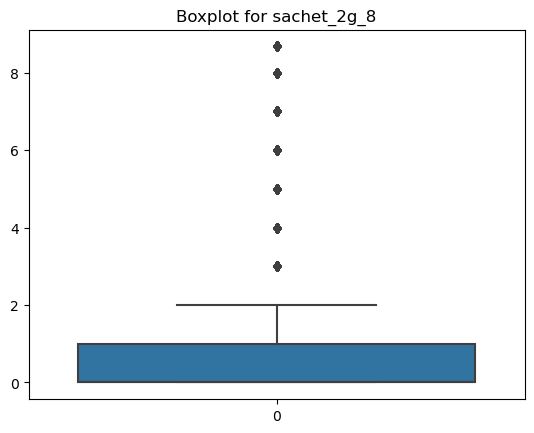

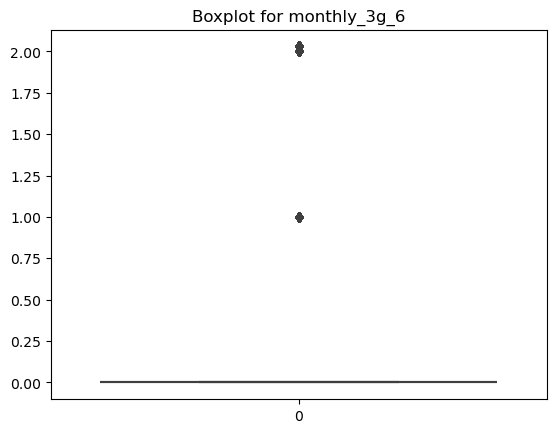

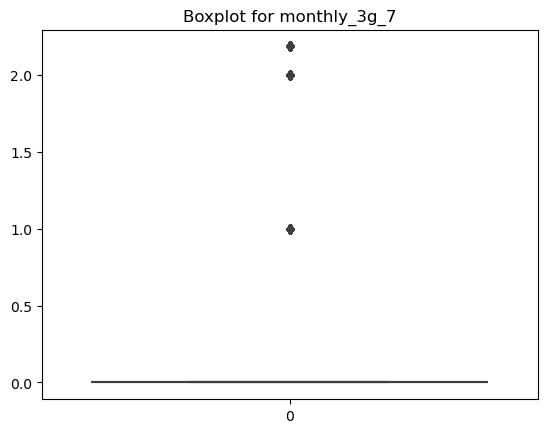

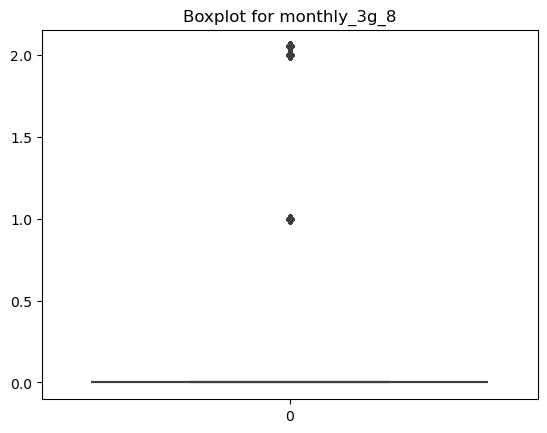

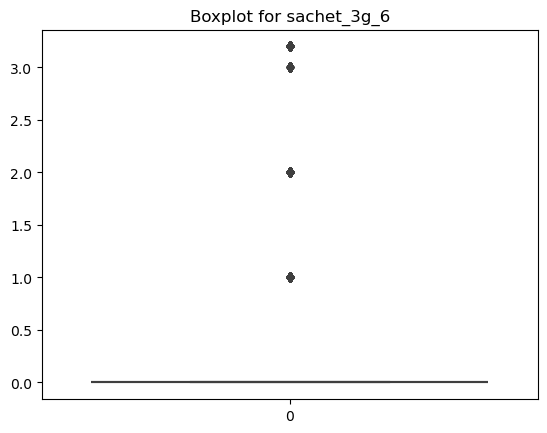

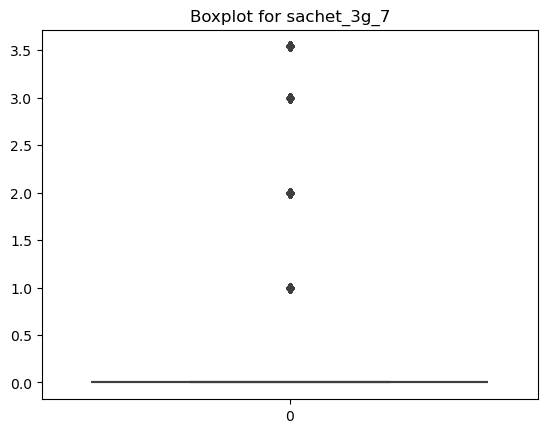

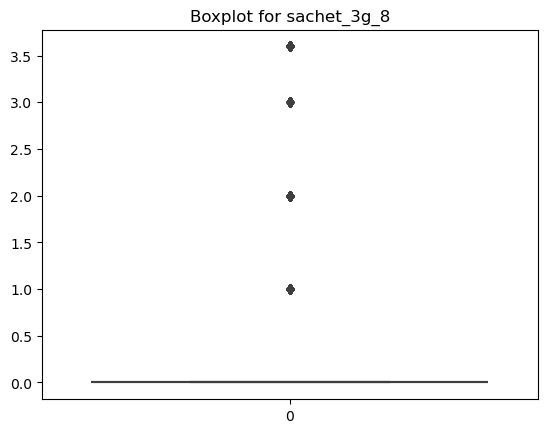

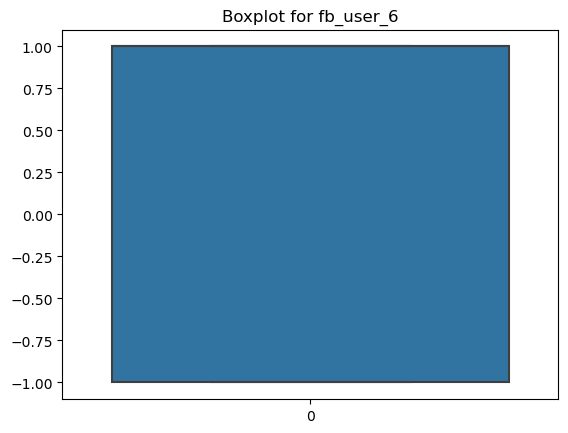

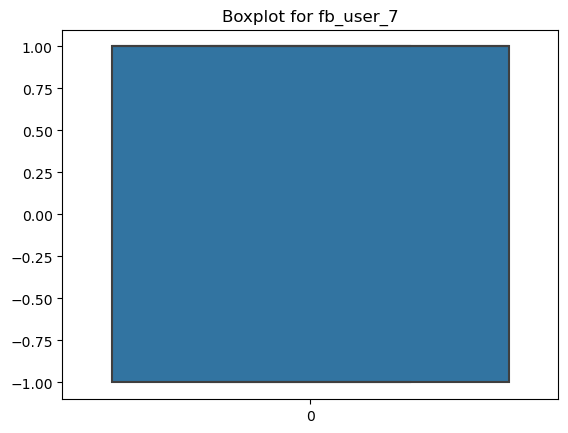

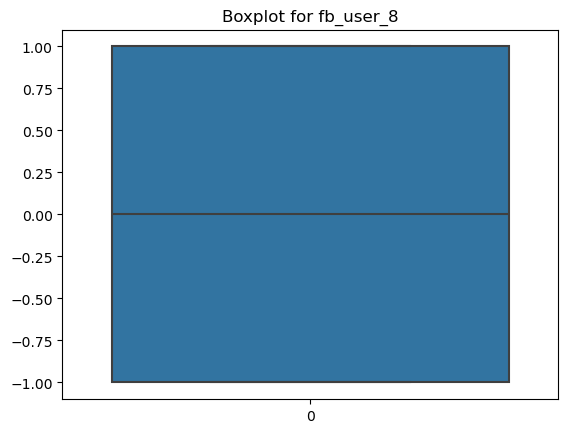

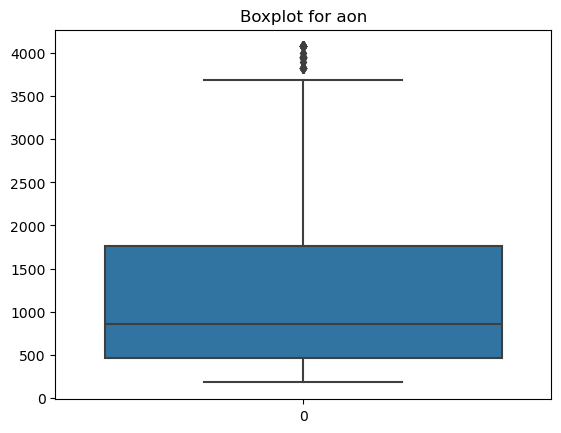

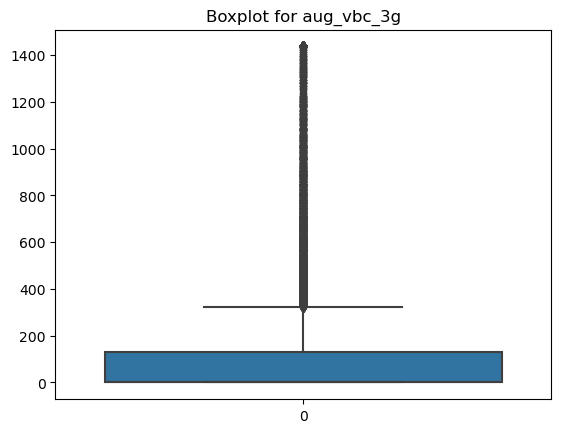

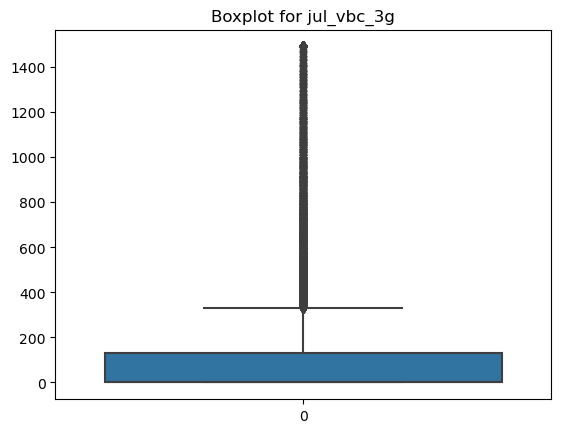

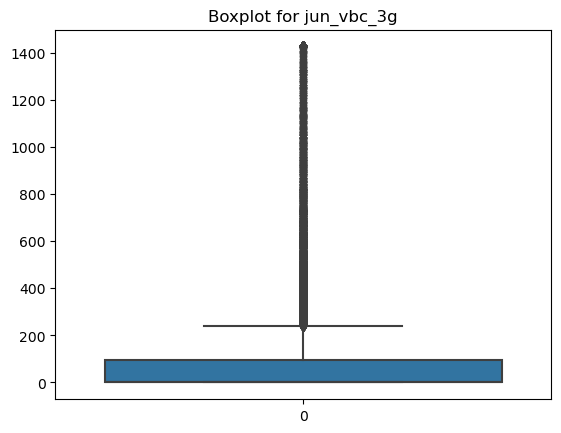

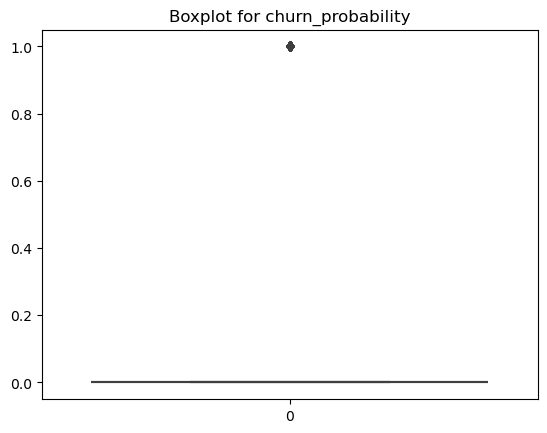

In [40]:
#Verify if there are no outliers in dataset
for i in df.columns:
    sns.boxplot(df[i])
    plt.title("Boxplot for "+i)
    plt.show()

## Data Visualization

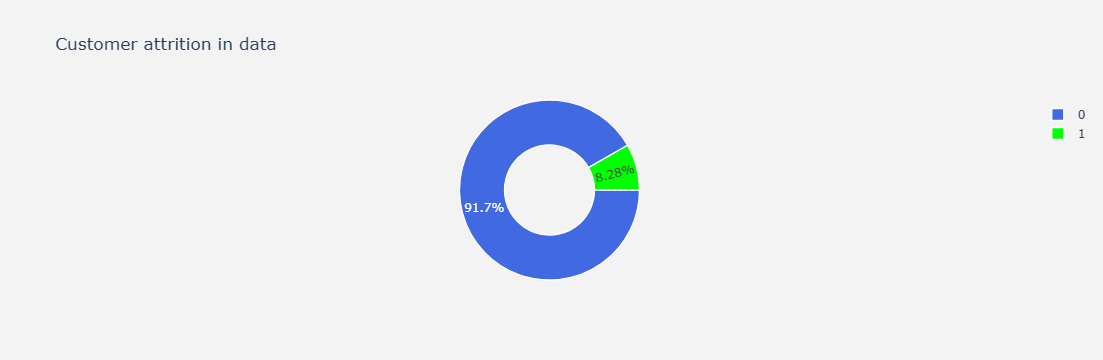

In [41]:
#labels
lab = df["churn_probability"].value_counts().keys().tolist()
#values
val = df["churn_probability"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Customer attrition in data",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

## Insights - 
1. The dataset contains 91.7% of non churn data which is comparatively more than churn data. Hence there is class imbalance 

In [42]:
# Converting numerical values to categorical values - binning for analysis
def calc_max_rech_amt(amt) :
    
    if (amt <= 50):
        return "Amount_lt_50"
    elif (amt > 50) & (amt <= 100):
        return "Amount_50-100"
    elif (amt > 100) & (amt <= 500):
        return "Amount_100-500"
    elif (amt > 500) & (amt <= 1000):
        return "Amount_500-1000"
    elif (amt > 1000):
        return "Amount_gt_1000"
    
df["nmax_rech_amt_8"] = df['max_rech_amt_8'].apply(lambda amt: calc_max_rech_amt(amt))
df["ntotal_rech_amt_8"] = df['total_rech_amt_8'].apply(lambda amt: calc_max_rech_amt(amt))


In [43]:
# Converting numerical values to categorical values - binning for analysis
def calc_max_rech_mou(mou) :
    
    if (mou <= 50):
        return "MOU_lt_50"
    elif (mou > 50) & (mou <= 100):
        return "MOU_50-100"
    elif (mou > 100) & (mou <= 500):
        return "MOU_100-500"
    elif (mou > 500) & (mou <= 1000):
        return "MOU_500-1000"
    elif (mou > 1000):
        return "MOU_gt_1000"
    

df["total_og_mou_8_bin"] = df['total_og_mou_8'].apply(lambda mou: calc_max_rech_mou(mou))
df["loc_ic_mou_8_bin"] = df['loc_ic_mou_8'].apply(lambda mou: calc_max_rech_mou(mou))

In [44]:
cat_cols = ["nmax_rech_amt_8", "ntotal_rech_amt_8", "total_og_mou_8_bin", "loc_ic_mou_8_bin"]

In [45]:
# convert datatype of categorical columns
for i in cat_cols:
    df[i] = df[i].astype('object')

In [46]:
#Separating churn and non churn customers
churn     = df[df["churn_probability"] == 1]
not_churn = df[df["churn_probability"] == 0]

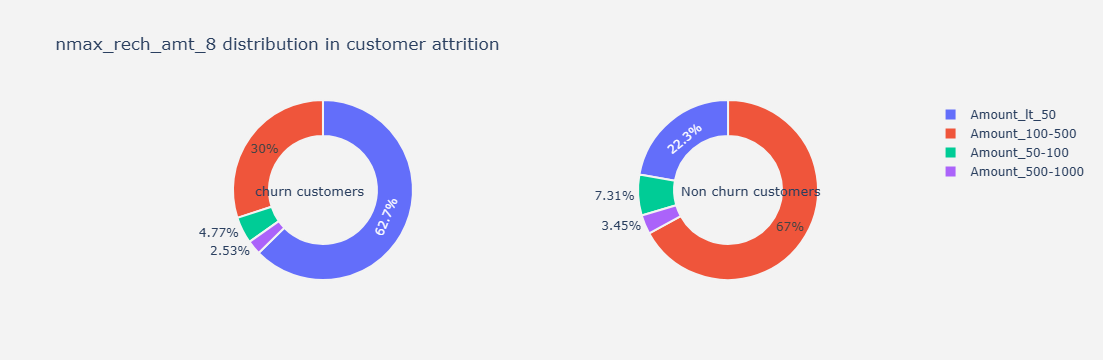

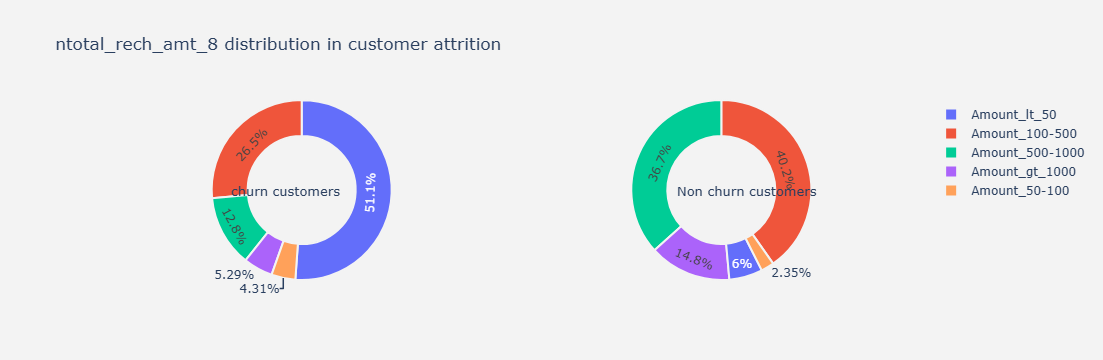

In [47]:
# Pie plot for categorical columns
def plot_pie(column) :
    
    trace1 = go.Pie(values  = churn[column].value_counts().values.tolist(),
                    labels  = churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "Churn Customers",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    hole    = .6
                   )
    trace2 = go.Pie(values  = not_churn[column].value_counts().values.tolist(),
                    labels  = not_churn[column].value_counts().keys().tolist(),
                    hoverinfo = "label+percent+name",
                    marker  = dict(line = dict(width = 2,
                                               color = "rgb(243,243,243)")
                                  ),
                    domain  = dict(x = [.52,1]),
                    hole    = .6,
                    name    = "Non churn customers" 
                   )


    layout = go.Layout(dict(title = column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            annotations = [dict(text = "churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .15, y = .5),
                                           dict(text = "Non churn customers",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .88,y = .5
                                               )
                                          ]
                           )
                      )
    data = [trace1,trace2]
    fig  = go.Figure(data = data,layout = layout)
    py.iplot(fig)


#for all categorical columns plot pie
for i in cat_cols[0:2] :
    plot_pie(i)


## Insights - 
1. Customers doing maximum of 50 Rs recharge are most likely to churn. 
2. Non churn customers mostly do maximum recharge in range of 100 to 500 Rs.

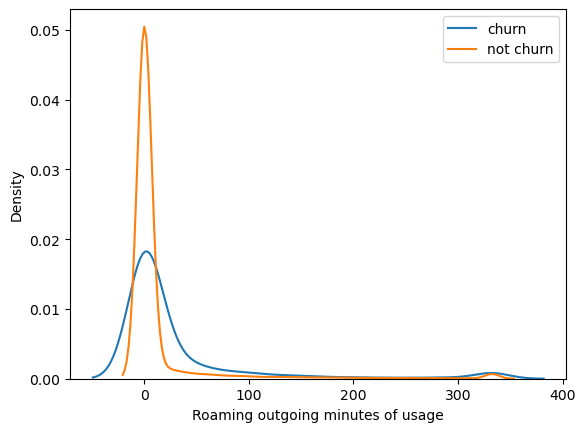

In [48]:
# Distribution plot
ax = sns.distplot(churn['roam_og_mou_8'],label='churn',hist=False)
ax = sns.distplot(not_churn['roam_og_mou_8'],label='not churn',hist=False)
ax.set(xlabel='Roaming outgoing minutes of usage')
ax.legend()

## Insights - 
1. Roaming outgoing minutes of usage is less for churn customers. Higher the minutes of usage, churn probabiity is lesser

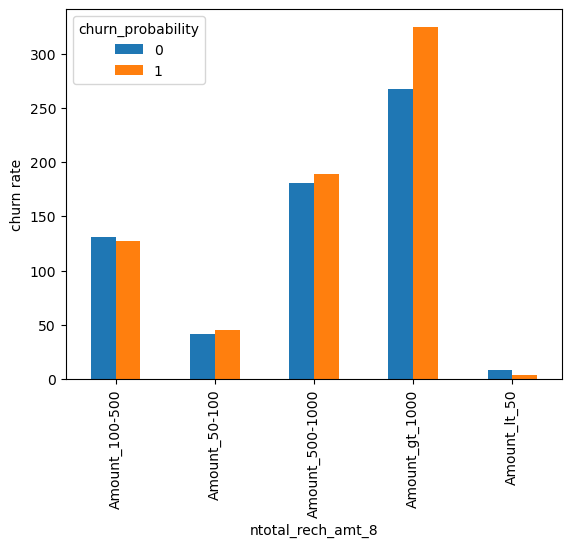

In [49]:
# Create pivot table
df.pivot_table(values='max_rech_amt_8', index='ntotal_rech_amt_8', columns='churn_probability', aggfunc='mean').plot.bar()
plt.ylabel('churn rate')
plt.show()

## Insights - 
1. The proportion of total recharge amount when amount is more than 1000 Rs for non churn customers is more than churn customer.

In [50]:
def histogram(column) :
    trace1 = go.Histogram(x  = churn[column],
                          histnorm= "percent",
                          name = "Churn Customers",
                          marker = dict(line = dict(width = .5,
                                                    color = "black"
                                                    )
                                        ),
                         opacity = .9 
                         ) 
    
    trace2 = go.Histogram(x  = not_churn[column],
                          histnorm = "percent",
                          name = "Non churn customers",
                          marker = dict(line = dict(width = .5,
                                              color = "black"
                                             )
                                 ),
                          opacity = .9
                         )
    
    data = [trace1,trace2]
    layout = go.Layout(dict(title =column + " distribution in customer attrition ",
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = column,
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                             title = "percent",
                                             zerolinewidth=1,
                                             ticklen=5,
                                             gridwidth=2
                                            ),
                           )
                      )
    fig  = go.Figure(data=data,layout=layout)
    
    py.iplot(fig)

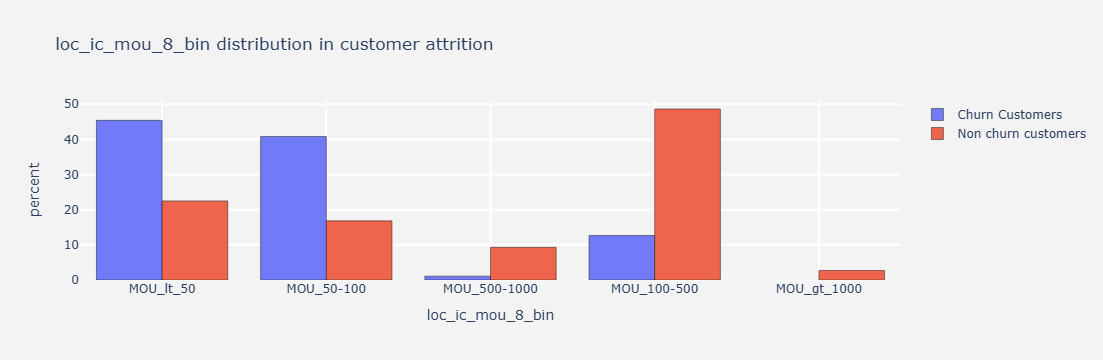

In [51]:
histogram('loc_ic_mou_8_bin')

## Insights - 
1. Customers with local incoming minutes of usage less than 50 tend to churn more
2. The MOU for non churn customers in range 100 to 500 is more

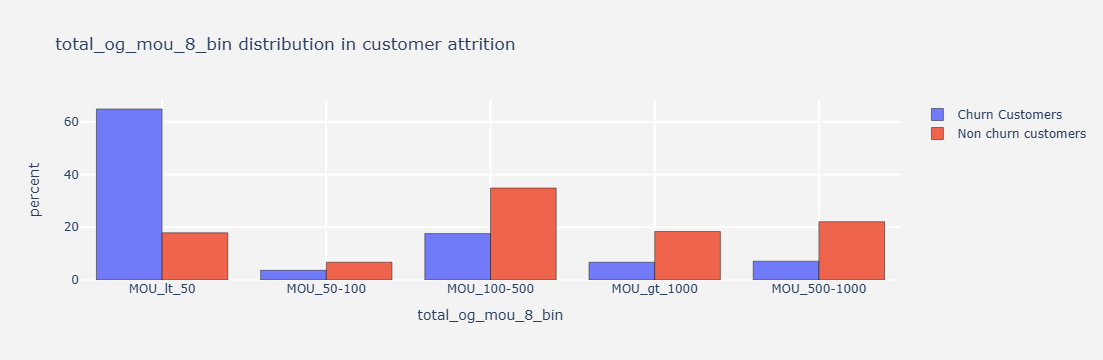

In [52]:
histogram('total_og_mou_8_bin')

## Insights:
1. Customers with total outgoing minutes of usage less than 50 are more likely to churn 
2. The customers are less in range of 50-100 MOU

In [53]:
# Drop columns that were used for visualization
df.drop(cat_cols,axis=1,inplace = True)

## Modelling

In [54]:
# divide dataset into train and test set 
X = df.drop("churn_probability", axis = 1)
y = df.churn_probability
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20, stratify = y)

In [55]:
# Verify no. of rows & columns
X_train.shape

(15759, 139)

In [56]:
# find numerical values by aggregating the categorical variables
train = pd.concat([X_train, y_train], axis=1)

print(train.groupby('night_pck_user_6').churn_probability.mean())
print(train.groupby('night_pck_user_7').churn_probability.mean())
print(train.groupby('night_pck_user_8').churn_probability.mean())
print(train.groupby('fb_user_6').churn_probability.mean())
print(train.groupby('fb_user_7').churn_probability.mean())
print(train.groupby('fb_user_8').churn_probability.mean())

night_pck_user_6
-1.0    0.100396
 0.0    0.066981
 1.0    0.128713
Name: churn_probability, dtype: float64
night_pck_user_7
-1.0    0.117982
 0.0    0.055134
 1.0    0.076531
Name: churn_probability, dtype: float64
night_pck_user_8
-1.0    0.142838
 0.0    0.029257
 1.0    0.034091
Name: churn_probability, dtype: float64
fb_user_6
-1.0    0.100396
 0.0    0.085174
 1.0    0.067097
Name: churn_probability, dtype: float64
fb_user_7
-1.0    0.117982
 0.0    0.069504
 1.0    0.054410
Name: churn_probability, dtype: float64
fb_user_8
-1.0    0.142838
 0.0    0.077703
 1.0    0.023602
Name: churn_probability, dtype: float64


In [57]:
# replace categories with respective aggregate values in column
mapping = {'night_pck_user_6' : {-1:0.100396, 0:0.066981, 1:0.128713},
           'night_pck_user_7' : {-1:0.117982, 0:0.055134, 1:0.076531},
           'night_pck_user_8' : {-1:0.142838, 0:0.029257, 1:0.034091},
           'fb_user_6'        : {-1:0.100396, 0:0.085174, 1:0.067097},
           'fb_user_7'        : {-1:0.117982, 0:0.069504, 1:0.054410},
           'fb_user_8'        : {-1:0.142838, 0:0.077703, 1:0.023602}
          }
           
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [58]:
# verify data type of categorical columns is numeric
cat_cols =['night_pck_user_6','night_pck_user_7','night_pck_user_8','fb_user_6','fb_user_7','fb_user_8']
X_train[[col for col in cat_cols if col not in ['churn_probability']]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 15759 entries, 2116 to 4842
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  15759 non-null  float64
 1   night_pck_user_7  15759 non-null  float64
 2   night_pck_user_8  15759 non-null  float64
 3   fb_user_6         15759 non-null  float64
 4   fb_user_7         15759 non-null  float64
 5   fb_user_8         15759 non-null  float64
dtypes: float64(6)
memory usage: 861.8 KB


In [59]:
# Using PCA for feature selection
pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [60]:
# Fit data
pca.fit(X_train)
churn_pca = pca.fit_transform(X_train)

In [61]:
# Extract pca model from pipeline
pca = pca.named_steps['pca']

# Check the explainded variance of PCA components
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       13.44
1       24.43
2       30.68
3       35.56
4       39.85
        ...  
134     99.99
135     99.99
136    100.00
137    100.00
138    100.00
Length: 139, dtype: float64


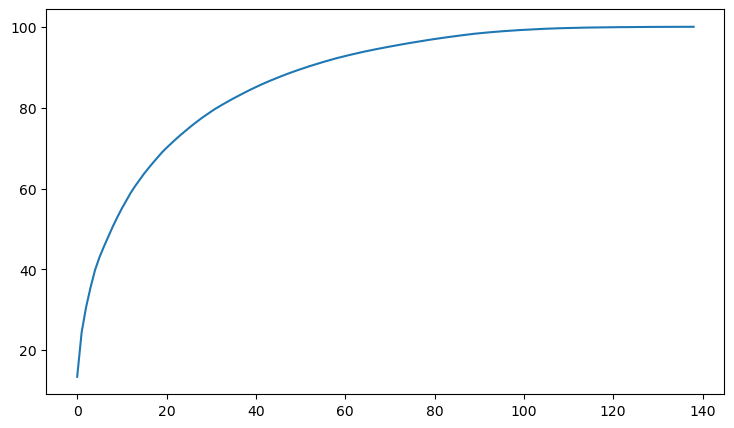

In [62]:
# Visulaize feature variance i.e. no. of features vs cumulative variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20))
plt.plot(cumulative_variance)

In [63]:
# create pipeline with 80 features
PCA_VARS = 80
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight={0: 0.1, 1: 0.9}))
        ]
pipeline = Pipeline(steps)

In [64]:
# fit model
pipeline.fit(X_train,y_train)

# check score for train data
pipeline.score(X_train, y_train)

0.844216003553525

In [65]:
# predict churn on test data
y_pred = pipeline.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4067  752]
 [  80  355]]
AUC:    	 0.89


In [66]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [67]:
# Find sensitivity of logistic regression model
TP / float(TP+FN)

0.8160919540229885

In [68]:
# Find specificity of logistic regression model
TN / float(TN+FP)

0.8439510271840631

In [69]:
# Find accuracy of logistic regression model
(TP+TN )/ float(TN+FP+TP+FN)

0.8416444613627713

In [70]:
# PCA
pca = PCA()

# logistic regression, class weight is used to handle class imbalance 
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline for PCA
pca_logistic = Pipeline(steps)

# hyperparameter space with no. of components for PCA
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds to train
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 15)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [71]:
# fit the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [72]:
# results of cross validation
pd.DataFrame(model.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        1.269962      0.284692         0.000000        0.000000   
1        1.765570      0.458060         0.000000        0.000000   
2        1.706737      0.690498         0.076734        0.045305   
3        1.573478      0.483190         0.137167        0.133322   
4        2.594463      0.656821         0.000000        0.000000   
5        3.605865      0.625490         0.000000        0.000000   
6        4.573408      0.367235         0.213048        0.072802   
7        5.650529      0.752386         0.146209        0.068734   
8        4.076374      0.199146         0.000000        0.000000   
9        3.284355      0.382564         0.000000        0.000000   
10       3.078043      0.456754         0.119505        0.073833   
11       3.251756      0.414483         0.082147        0.044320   
12       2.120714      0.189125         0.000000        0.000000   
13       2.507885      0.123160         0.000000        0.000000   
14       3.009973      0.175519         0.214649        0.060615   
15       3.971872      0.173955         0.134281        0.050090   
16       2.297135      0.200689         0.000000        0.000000   
17       2.245354      0.240046         0.000000        0.000000   
18       3.362084      0.266071         0.103983        0.055596   
19       3.968723      0.708285         0.188481        0.156303   
20       2.536586      0.365696         0.000000        0.000000   
21       2.815386      0.225617         0.000000        0.000000   
22       2.608672      0.281434         0.179447        0.104858   
23       3.906417      0.157594         0.113564        0.068244   
24       1.802211      0.364228         0.000000        0.000000   
25       1.994974      0.387484         0.000000        0.000000   
26       2.465182      0.230656         0.110229        0.041531   
27       3.048927      0.265766         0.299735        0.198795   
28       2.893406      0.252224         0.000000        0.000000   
29       2.311904      0.398767         0.000000        0.000000   
30       2.367865      0.250667         0.078131        0.022256   
31       2.602161      0.361867         0.063818        0.023729   

   param_logistic__C param_logistic__penalty param_pca__n_components  \
0                0.1                      l1                      60   
1                0.1                      l1                      80   
2                0.1                      l2                      60   
3                0.1                      l2                      80   
4                0.5                      l1                      60   
5                0.5                      l1                      80   
6                0.5                      l2                      60   
7                0.5                      l2                      80   
8                  1                      l1                      60   
9                  1                      l1                      80   
10                 1                      l2                      60   
11                 1                      l2                      80   
12                 2                      l1                      60   
13                 2                      l1                      80   
14                 2                      l2                      60   
15                 2                      l2                      80   
16                 3                      l1                      60   
17                 3                      l1                      80   
18                 3                      l2                      60   
19                 3                      l2                      80   
20                 4                      l1                      60   
21                 4                      l1                      80   
22                 4                      l2                      60   
23                 4           

In [73]:
# print best hyperparameters given by model
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8866352959982416
Best hyperparameters:  {'logistic__C': 0.1, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [74]:
# predict churn on test data
y_pred = model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4071  748]
 [  80  355]]
AUC:    	 0.89


In [75]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [76]:
# Find sensitivity of our logistic regression model
TP / float(TP+FN)

0.8160919540229885

In [77]:
# Find specificity of our logistic regression model
TN / float(TN+FP)

0.8447810749118074

In [78]:
# Find accuracy of logistic regression model
(TP+TN )/ float(TN+FP+TP+FN)

0.8424057860677578

### The accuracy, specificity & sensitivity of model is almost similar so the model is stable

## Training data using Random Forest

In [79]:
# random forest, class weight is used to handle class imbalance 
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space with criteria specified
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds for train
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 15)

# create gridsearch object
model1 = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

# fit the model
model1.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=15, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

In [80]:
# print best hyperparameters given by model
print("Best AUC: ", model1.best_score_)
print("Best hyperparameters: ", model1.best_params_)

Best AUC:  0.9257452200559824
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [81]:
# predict churn on test data
y_pred = model1.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model1.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[4730   89]
 [ 222  213]]
AUC:    	 0.93


In [82]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [83]:
# Find the sensitivity of Random Forest model
TP / float(TP+FN)

0.4896551724137931

In [84]:
# Find the specificity of Random Forest model
TN / float(TN+FP)

0.9815314380576883

In [85]:
# Find the accuracy of Random Forest model
(TP+TN )/ float(TN+FP+TP+FN)

0.9408070041872859

### The sensitivity of model is very less. So PCA + logistic model is stable.

## Prediction on test dataset

In [86]:
# Import test.csv to predict whether customer has churn or not
df1 = pd.read_csv('test.csv')

In [87]:
# Drop date columns & id column from test data
df1.drop(date_cols, axis=1, inplace=True)
df1.drop('id', axis=1, inplace=True)

In [88]:
date_cols

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [89]:
df1.columns

Index(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou',
       'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8',
       ...
       'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'fb_user_6', 'fb_user_7',
       'fb_user_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object', length=161)

In [90]:
# Impute values in test data for categorical & related columns
df1[related_cols] = df1[related_cols].apply(lambda x: x.fillna(0))
cat_cols = ['night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7','fb_user_8']
df1[cat_cols] = df1[cat_cols].apply(lambda x: x.fillna(-1))

In [91]:
#Find columns having missing values greater than 70%
missing_values_list = []
for i in df1.columns:
    if (100 * df1[i].isnull().mean()) > 70:
        missing_values_list.append(i)
missing_values_list

['count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8']

In [92]:
# Drop columns with missing values greater than 70%
df1.drop(missing_values_list, axis=1, inplace=True)

# Drop columns with single value
df1.drop(singleval, axis=1, inplace=True)
df1.shape

(30000, 139)

In [93]:
#Find columns having missing values greater than 0
missing_values_list = []
for i in df1.columns:
    if (100 * df1[i].isnull().mean()) > 0:
        missing_values_list.append(i)
len(missing_values_list)

81

In [94]:
# Impute the null values with median value
for i in missing_values_list:
    df1[[i]]=df1[[i]].fillna(df1[[i]].median())

In [95]:
# replace categories with respective aggregate values in column
mapping = {'night_pck_user_6' : {-1:0.100396, 0:0.066981, 1:0.128713},
           'night_pck_user_7' : {-1:0.117982, 0:0.055134, 1:0.076531},
           'night_pck_user_8' : {-1:0.142838, 0:0.029257, 1:0.034091},
           'fb_user_6'        : {-1:0.100396, 0:0.085174, 1:0.067097},
           'fb_user_7'        : {-1:0.117982, 0:0.069504, 1:0.054410},
           'fb_user_8'        : {-1:0.142838, 0:0.077703, 1:0.023602}
          }
           
df1.replace(mapping, inplace = True)
df1.replace(mapping, inplace = True)

In [96]:
# cap outliers 
df1[df1.columns] = df1[df1.columns].apply(cap_outliers, axis=0)


In [97]:
y_pred = model.predict(df1)

In [98]:
# Create dataframe with id & churn_probability column & convert to csv
df1=pd.read_csv('test.csv')
submission = pd.DataFrame({'id': df1['id'],'churn_probability': y_pred})
filename = 'submission_test_v4.csv'
submission.to_csv(filename, index=False)
print('Submission file generated:' + filename)

Submission file generated:submission_test_v4.csv


In [99]:
## Choosing best features

In [100]:
# Use Random Forest model on train dataset, calculate max features to split on
max_features = int(round(np.sqrt(X_train.shape[1])))    # number of variables to consider to split each node
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

12


In [101]:
# fit the model
rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.9s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       oob_score=True, random_state=4, verbose=1)

In [102]:
# Check OOB score
rf_model.oob_score_

0.9410495589821689

In [103]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[4752   67]
 [ 234  201]]
ROC:    	 0.92


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [104]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [105]:
# Find sensitivity of Random Forest model
TP / float(TP+FN)

0.46206896551724136

In [106]:
# Find specificity of Random Forest model
TN / float(TN+FP)

0.9860967005602822

In [107]:
# Find accuracy of Random Forest model
(TP+TN )/ float(TN+FP+TP+FN)

0.9427103159497525

## Feature Importance

In [108]:
# extract features by dropping target variable
features = df.drop('churn_probability', axis=1).columns

# find important features using feature_importances
importance = rf_model.feature_importances_

# create a dataframe with variable name & importance percentage
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort the dataframe
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


variables  importance_percentage
0        total_ic_mou_8               6.651201
1        total_og_mou_8               5.338126
2      total_rech_amt_8               4.065550
3    last_day_rch_amt_8               3.888626
4          loc_ic_mou_8               3.177916
..                  ...                    ...
134        monthly_2g_6               0.052203
135        monthly_3g_8               0.026250
136        monthly_2g_8               0.022950
137         og_others_8               0.012230
138         og_others_7               0.000972

[139 rows x 2 columns]

In [109]:
# extract top 30 features from dataframe
top_n = 30
top_features = feature_importance.variables[0:top_n]

<Axes: >

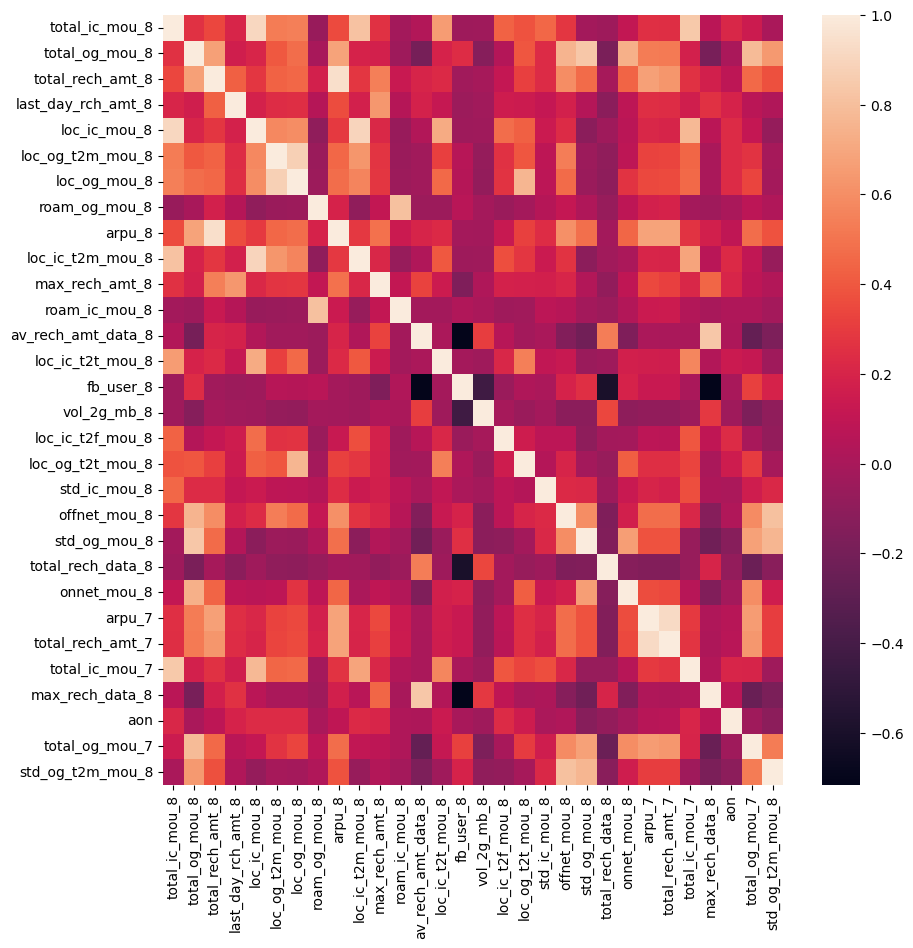

In [110]:
# plot feature correlation for top 30 features
import seaborn as sns
plt.rcParams["figure.figsize"] =(10,10)
sns.heatmap(data=X_train[top_features].corr())


In [111]:
# Find train & test dataset with important features given by Random Forest
top_features = ['total_ic_mou_8','total_og_mou_8','total_rech_amt_8', 'last_day_rch_amt_8', 'loc_ic_mou_8', 'loc_og_t2m_mou_8', 'loc_og_mou_8', 'roam_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [112]:
# Build logistic regression model on filtered dataset
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# Build pipeline
logistic = Pipeline(steps)

# hyperparameter space 
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds on train
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [113]:
# fit the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

In [114]:
# print best hyperparameters given by model
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8566308924624865
Best hyperparameters:  {'logistic__C': 4, 'logistic__penalty': 'l2'}


In [115]:
# predict churn on test data
y_pred = model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[3763 1056]
 [  79  356]]
ROC:    	 0.87


In [116]:
TP = cm[1,1] # true positive 
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [117]:
# Find sensitivity of logistic regression model
TP / float(TP+FN)

0.8183908045977012

In [118]:
# Find specificity of logistic regression model
TN / float(TN+FP)

0.7808673998754928

In [119]:
# Find accuracy of logistic regression model
(TP+TN )/ float(TN+FP+TP+FN)

0.7839741149600304

In [120]:
# Find intercept and the coefficients from the logistic model
logistic_model = model.best_estimator_.named_steps['logistic']

In [121]:
# intercept from the logistic model 
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

In [122]:
# coefficients from the logistic model
coefficients = logistic_model.coef_.reshape((8, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [123]:
# concatenate dataframes of intercept & coefficients
coefficients = pd.concat([intercept_df, coefficients_df], axis=1)
coefficients

intercept  total_ic_mou_8  total_og_mou_8  total_rech_amt_8  \
0  -1.283496       -2.463202        0.172748         -0.627136   

   last_day_rch_amt_8  loc_ic_mou_8  loc_og_t2m_mou_8  loc_og_mou_8  \
0           -0.356089      1.268632         -0.331881      0.011986   

   roam_og_mou_8  
0       0.434617

## Bussiness Insights Derived 

1. Customers who recharge with amount 50 or less than 50 tend to churn more. 
2. There is more chance that the customer is likely to churn if the total incoming minutes of usage is lesser in the month of August than any other month
3. Roaming outgoing minutes of usage is more for churn customers. Higher the minutes of usage, churn probability is higher
4. Customers having decreasing local outgoing minutes of usage for operators T to other operator mobile M for August are more likely to churn.

## Recommendation

1. Customers who recharge with amount 50 or less than 50 tend to churn more. It is suggested to give some attractive offers on the recharge plan.
2. Target the customers, whose minutes of usage of the total incoming calls are less in the action phase i.e. in August
3. It is suggested that more attractive plans should be given to customers in roaming zone
4. Target the customers whose local outgoing minutes of usage for operators T to other operator mobile M are less